In [3]:
import pandas as pd
import numpy as np 
import json
import seaborn as sn
import matplotlib.pyplot as plt
from pylab import * 
import networkx as nx

In [3]:
df = pd.read_json('yelp_bizdata.json', lines=True) # business data 
dfuser = pd.read_json('yelp_userdata.json', lines=True)

In [5]:
dfrev = pd.read_json('yelpreviews.json', lines=True)

In [6]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [7]:
stars = df.iloc[:,8]
review_count = df.iloc[:,9]

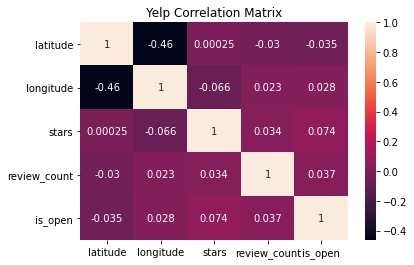

In [8]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Yelp Correlation Matrix')
plt.show()

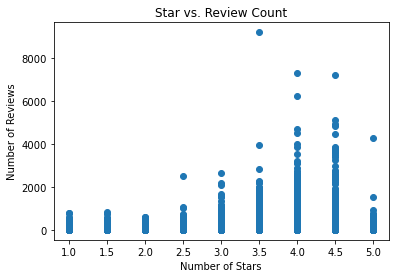

In [9]:
fig = plt.figure()
plt.scatter(stars, review_count)
plt.title('Star vs. Review Count')
plt.xlabel('Number of Stars')
plt.ylabel('Number of Reviews')
fig.savefig('starvrevcount.png')

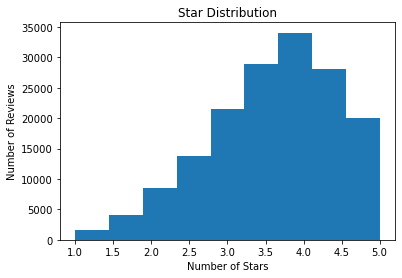

In [10]:
fig = plt.figure()
plt.hist(stars, bins = 9)
plt.title('Star Distribution')
plt.xlabel('Number of Stars')
plt.ylabel('Number of Reviews')
fig.savefig('stardist.png')

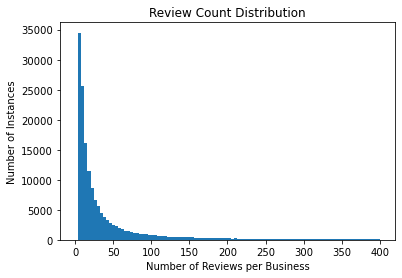

In [11]:
fig = plt.figure()
plt.hist(review_count, bins = 100, range=[0, 400])
plt.title('Review Count Distribution')
plt.xlabel('Number of Reviews per Business')
plt.ylabel('Number of Instances')
fig.savefig('revcountdist100bins.png')

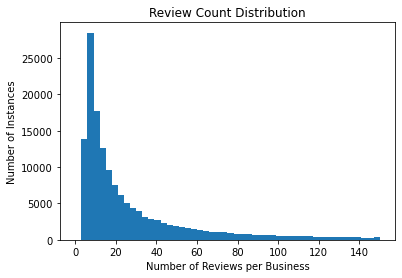

In [12]:
fig = plt.figure()
plt.hist(review_count, bins = 50, range=[0, 150])
plt.title('Review Count Distribution')
plt.xlabel('Number of Reviews per Business')
plt.ylabel('Number of Instances')
fig.savefig('revcountdist50bins.png')

In [13]:
df.groupby('state').count()

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
state,,,,,,,,,,,,,
ABE,1,1,1,1,1,1,1,1,1,1,1,1,1
AL,1,1,1,1,1,1,1,1,1,1,1,1,1
AZ,2,2,2,2,2,2,2,2,2,2,2,2,2
BC,17298,17298,17298,17298,17298,17298,17298,17298,17298,17298,15409,17294,13857
CA,13,13,13,13,13,13,13,13,13,13,12,13,12
CO,3198,3198,3198,3198,3198,3198,3198,3198,3198,3198,2926,3197,2748
DC,1,1,1,1,1,1,1,1,1,1,1,1,1
DE,1,1,1,1,1,1,1,1,1,1,1,1,1
FL,21907,21907,21907,21907,21907,21907,21907,21907,21907,21907,19984,21900,18423


In [14]:
states = ['BC', 'CO', 'FL', 'GA', 'MA', 'OH','OR', 'TX', 'WA']

In [15]:
# get stars per state 
by_state = df.groupby('state')
avg_stats = []
for state in states:
    avg_star = sum(by_state.get_group(state)['stars'])/len(by_state.get_group(state)['stars'])
    avg_review = sum(by_state.get_group(state)['review_count'])/len(by_state.get_group(state)['review_count'])
    num_businesses = by_state.get_group(state)['name'].count()
    # something wrong here 
    num_reviews = len(by_state.get_group(state)['review_count'])
    avg_stats.append([avg_star,  avg_review, num_businesses, num_reviews ])
df_stats = pd.DataFrame(avg_stats, index= states, columns=['Avg Stars', 'Reviews / Business', 'Businesses', 'Reviews'])
df_stats

,Avg Stars,Reviews / Business,Businesses,Reviews
BC,3.512574,34.818650,17298,17298
CO,3.774703,43.085679,3198,3198
FL,3.554343,49.979276,21907,21907
GA,3.507822,61.505583,18090,18090
MA,3.618211,55.909058,36012,36012
OH,3.533043,36.802363,11258,11258
OR,3.863873,55.580457,25175,25175
TX,3.846314,59.398285,24485,24485
WA,3.660205,36.870234,3121,3121


In [16]:
avg_stats = np.array(avg_stats)

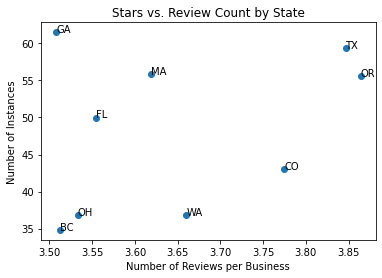

In [17]:
fig, ax = plt.subplots()
ax.scatter(avg_stats[:,0],avg_stats[:,1])
for i, txt in enumerate(states):
    plt.annotate(txt, (avg_stats[i,0],avg_stats[i,1]))
plt.title('Stars vs. Review Count by State')
plt.xlabel('Average Stars')
plt.ylabel('Average Review Count')
plt.xlabel('Number of Reviews per Business')
plt.ylabel('Number of Instances')
fig.savefig('star_count_bystate.png')

In [18]:
#df = pd.read_csv('yelp_csv.csv')
##Graphtype = nx.Graph()
#G = nx.from_pandas_edgelist(df, create_using=Graphtype)

## Working with user data

In [19]:
dfuser.head(10)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1220,2005-03-14 20:26:35,15038,10030,11291,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,190,361,147,1212,5691,2541,2541,815,323
1,dIIKEfOgo0KqUfGQvGikPg,Gabi,2136,2007-08-10 19:01:51,21272,10289,18046,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2...","XPzYf9_mwG2eXYP2BAGSTA, 2LooM5dcIk2o01nftYdPIg...",1025,...,87,94,232,96,1187,3293,2205,2205,472,294
2,D6ErcUnFALnCQN4b1W_TlA,Jason,119,2007-02-07 15:47:53,188,128,130,"2010,2011","GfB6sC4NJQvSI2ewbQrDNA, jhZtzZNNZJOU2YSZ6jPlXQ...",16,...,1,3,0,0,5,20,31,31,3,1
3,JnPIjvC0cmooNDfsa9BmXg,Kat,987,2009-02-09 16:14:29,7234,4722,4035,"2009,2010,2011,2012,2013,2014","HQZPQhKMwRAyS6BCselVWQ, kP2U1s_sjQfHO9grxiyDTA...",420,...,129,93,219,90,1120,4510,1566,1566,391,326
4,37Hc8hr3cw0iHLoPzLK6Ow,Christine,495,2008-03-03 04:57:05,1577,727,1124,"2009,2010,2011","-Q88pZUcrfN0BLBDp-bkAQ, etPn4Pv1Gc4cRZjRgB_BOw...",47,...,19,32,16,15,77,131,310,310,98,44
5,n-QwITZYrXlKQRiV30MqNg,Natasha,229,2008-06-25 14:53:17,476,101,140,"2010,2011,2012,2013,2014,2015,2016","2ptwW5l68069vNtW8J-WOg, 4TVFuz8L4TsDtx_ObSin9g...",17,...,4,3,0,0,10,15,24,24,16,2
6,eCJoZqpV1fDKJGAsXmWXqQ,Bridget,51,2009-07-22 16:47:01,53,14,16,,"DlT1HhrcYfDhjJNUyskU5g, C0ly5C7RzTlzh0M55YspDw...",1,...,0,0,0,0,3,1,2,2,1,0
7,cojecOwQJpsYDxnjtgzteQ,Steven,51,2010-07-04 17:18:40,136,47,44,"2010,2011","_Tpd51CSlnOyvDTpOtgG5w, jVYzrVblDFSuL3GHtt8ZSA...",4,...,5,2,1,0,4,6,12,12,4,2
8,1jXmzuIFKxTnEnR0pxO0Hg,Clara,299,2010-10-01 17:29:36,381,106,121,"2010,2011,2012,2013,2014,2015","VGfzq5na6LZUwxwWO5eVLA, 35uHDsVOEsWbLdEg8Ttobg...",23,...,8,2,6,0,17,47,30,30,4,1
9,-8QoOIfvwwxJ4sY201WP5A,Antoinette,288,2007-08-04 20:21:09,752,220,306,"2012,2013,2014,2015,2016,2017,2018","vePby1OhpTiQiX75XrN97A, UG8cewYtZdep2hzSekIqYg...",25,...,4,6,2,0,12,32,24,24,11,2


In [20]:
dfuser.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06
mean,2.169772e+01,3.805667e+01,1.539468e+01,2.047354e+01,1.379219e+00,3.653816e+00,1.633913e+00,2.736519e-01,1.628577e-01,1.304570e-01,6.127410e-02,1.235433e+00,2.676413e+00,2.502623e+00,2.502623e+00,9.526750e-01,9.881007e-01
std,7.601255e+01,5.352625e+02,3.532697e+02,4.668296e+02,1.686675e+01,1.153861e+00,6.440827e+01,1.199887e+01,1.418780e+01,1.076745e+01,9.473196e+00,3.982064e+01,1.141425e+02,8.363696e+01,8.363696e+01,2.947058e+01,8.743189e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.880000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.500000e+01,1.300000e+01,3.000000e+00,3.000000e+00,0.000000e+00,4.550000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.568600e+04,2.043800e+05,1.720410e+05,1.984510e+05,1.211600e+04,5.000000e+00,2.530400e+04,1.350100e+04,1.418000e+04,1.365400e+04,1.266900e+04,3.832200e+04,9.085800e+04,4.685800e+04,4.685800e+04,1.544600e+04,8.263000e+04


In [21]:
user_stars = dfuser.iloc[:,10]
user_rev = dfuser.iloc[:,2]

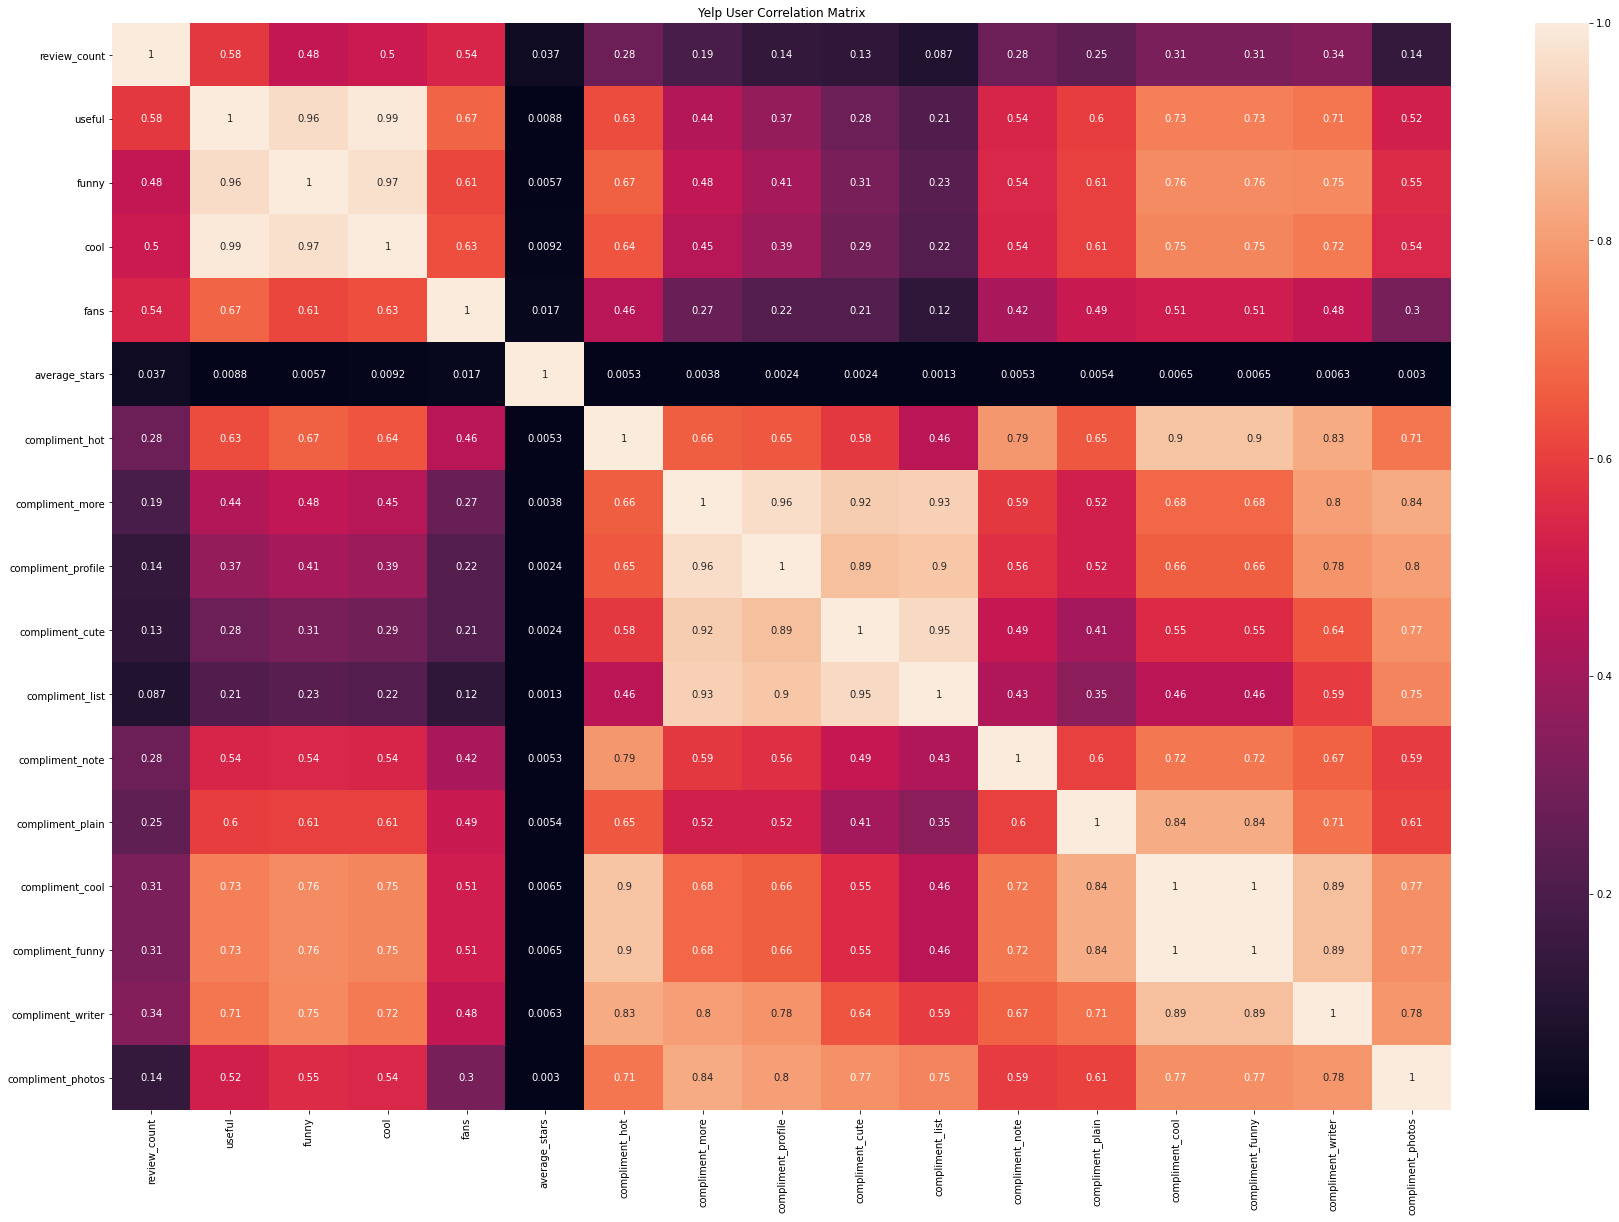

In [22]:
fig = plt.figure()
usercorrMatrix = dfuser.corr()
sn.heatmap(usercorrMatrix, annot=True)
plt.title('Yelp User Correlation Matrix')
fig.set_size_inches(30, 20)
plt.show()
fig.savefig('usercorrmat.png')

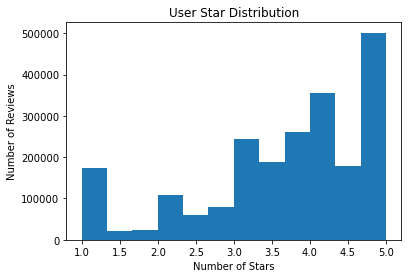

In [23]:
fig = plt.figure()
plt.hist(user_stars, bins = 12)
plt.title('User Star Distribution')
plt.xlabel('Number of Stars')
plt.ylabel('Number of Reviews')
fig.savefig('userstardist.png')

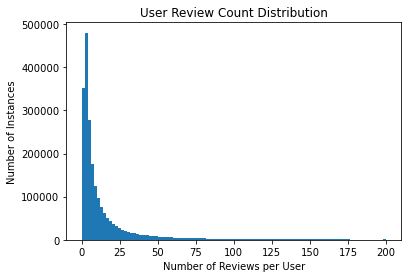

In [24]:
fig = plt.figure()
plt.hist(user_rev, bins = 100, range=[0, 200])
plt.title('User Review Count Distribution')
plt.xlabel('Number of Reviews per User')
plt.ylabel('Number of Instances')
fig.savefig('userrevcountdist100bins.png')

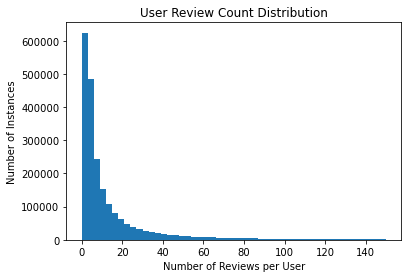

In [25]:
fig = plt.figure()
plt.hist(user_rev, bins = 50, range=[0, 150])
plt.title('User Review Count Distribution')
plt.xlabel('Number of Reviews per User')
plt.ylabel('Number of Instances')
fig.savefig('userrevcountdist50bins.png')

## Review dataset

In [26]:
dfrev.head(10)

,review_id,user_id,business_id,stars,useful,funny,cool,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,2011-07-28 18:05:01
5,J4a2TuhDasjn2k3wWtHZnQ,RNm_RWkcd02Li2mKPRe7Eg,xGXzsc-hzam-VArK6eTvtw,1,2,0,0,2018-01-21 04:41:03
6,28gGfkLs3igtjVy61lh77Q,Q8c91v7luItVB0cMFF_mRA,EXOsmAB1s71WePlQk0WZrA,2,0,0,0,2006-04-16 02:58:44
7,9vqwvFCBG3FBiHGmOHMmiA,XGkAG92TQ3MQUKGX9sLUhw,DbXHNl890xSXNiyRczLWAg,5,0,0,0,2017-12-02 18:16:13
8,2l_TDrQ7p-5tANOyiOlkLQ,LWUnzwK0ILquLLZcHHE1Mw,mD-A9KOWADXvfrZfwDs-jw,4,1,0,0,2012-05-28 15:00:47
9,KKVFopqzcVfcubIBxmIjVA,99RsBrARhhx60UnAC4yDoA,EEHhKSxUvJkoPSzeGKkpVg,5,0,0,0,2014-05-07 18:10:21


In [27]:
dfrev.describe()

,stars,useful,funny,cool
count,2.546949e+06,2.546949e+06,2.546949e+06,2.546949e+06
mean,3.729267e+00,1.248201e+00,4.130208e-01,4.882520e-01
std,1.459158e+00,3.188660e+00,1.783163e+00,2.079237e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,3.980000e+02,5.290000e+02,5.300000e+02


In [28]:
userbiz_revpair = dfrev.iloc[:,0:3] # data to create network

In [29]:
userbiz_revpair

,review_id,user_id,business_id
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA
...,...,...,...
2546944,CNfG18etDobCn-LlyH3TtQ,s6ZuqZLSlKvVZElSEd03Gw,sB9dNoHtrJ6YDU1ynz4lcg
2546945,uxIlS76PxfWxBZt4LgvZFg,caiSZUruSw1fkVOHtlS4kw,U65ez9BbaXyqKrqI1Atviw
2546946,OAG58lQj7cWVT57M81oCDg,Jax59T2jZ5qrMwB4MmxChw,0fWr9Ty_EGvimZ4h6Rw2yg
2546947,mdk2z1NasChYZf3ztlnwFA,_vpRHhJxPnse-xEt7tKb3A,U2KZI_ELoyvlBq_RVR7t2Q


In [30]:
dfrev.iloc[:,2]

0          buF9druCkbuXLX526sGELQ
1          RA4V8pr014UyUbDvI-LW2A
2          _sS2LBIGNT5NQb6PD1Vtjw
3          0AzLzHfOJgL7ROwhdww2ew
4          8zehGz9jnxPqXtOc7KaJxA
                    ...          
2546944    sB9dNoHtrJ6YDU1ynz4lcg
2546945    U65ez9BbaXyqKrqI1Atviw
2546946    0fWr9Ty_EGvimZ4h6Rw2yg
2546947    U2KZI_ELoyvlBq_RVR7t2Q
2546948    pWEvUo4JWXohCVurC6U_Mw
Name: business_id, Length: 2546949, dtype: object

In [31]:
len(userbiz_revpair)

2546949

In [32]:
userbiz_revpair = np.array(userbiz_revpair)

In [33]:
userbiz_revpair[0,1]

'ak0TdVmGKo4pwqdJSTLwWw'

In [34]:
unique(dfrev.iloc[0:5,1])

array(['0kA0PAJ8QFMeveQWHFqz2A', 'SFQ1jcnGguO0LYWnbbftAA',
       'YoVfDbnISlW0f7abNQACIg', 'ak0TdVmGKo4pwqdJSTLwWw',
       'eC5evKn1TWDyHCyQAwguUw'], dtype=object)

In [35]:
unique_users = dfrev.iloc[:,1].unique()
unique_businesses = dfrev.iloc[:,2].unique()

unique_all = np.concatenate((unique_users, unique_businesses), axis = None)

print(len(unique_users))
print(len(unique_businesses))
print(len(unique_all))
len(unique_users)+len(unique_businesses)

ids = np.zeros(len(unique_all))

for i in range(0,len(unique_users)):
    ids[i] = 1

1058925
48176
1107101


In [36]:
carac = pd.DataFrame({'node': unique_all,
                     'id': ids})

G = nx.from_pandas_edgelist(userbiz_revpair, 'user_id', 'business_id', create_using=nx.Graph())

carac = carac.set_index('node')
#carac = carac.reindex(G.nodes())

carac['id'] = pd.Categorical(carac['id'])
carac['id'].cat.codes

cmap = matplotlib.colors.ListedColormap(['C0', 'darkorange'])

nx.draw(G, with_labels=False, node_color=carac['id'].cat.codes, cmap=cmap)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
graph = nx.Graph()
for i in range(0, 3):
    graph.add_edges_from([(userbiz_revpair[i,1], userbiz_revpair[i,2])])

nx.draw(graph, with_labels=False)

In [37]:
carac = pd.DataFrame({'node': unique_all,
                     'id': ids})

G = nx.from_pandas_edgelist(userbiz_revpair, 'user_id', 'business_id', create_using=nx.Graph())

carac = carac.set_index('node')
#carac = carac.reindex(G.nodes())

carac['id'] = pd.Categorical(carac['id'])
carac['id'].cat.codes

cmap = matplotlib.colors.ListedColormap(['C0', 'darkorange'])

nx.draw(G, with_labels=False, node_color=carac['id'].cat.codes, cmap=cmap)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## Denver, CO

In [38]:
denver_bis = df.loc[df['state'] == 'CO']

In [39]:
denver_bis

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
10,rYs_1pNB_RMtn5WQh55QDA,Chautauqua General Store,100 Clematis Dr,Boulder,CO,80302,39.998449,-105.281006,3.5,5,1,"{'BikeParking': 'True', 'RestaurantsTakeOut': ...","Food, Shopping, Convenience Stores, Souvenir S...","{'Monday': '8:0-20:0', 'Tuesday': '8:0-20:0', ..."
52,Of6xu3pY3eHe2yhiyz2dvg,Taco Bell,3255 28th Street,Boulder,CO,80301,40.033678,-105.259103,1.5,44,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Tex-Mex, Tacos, Fast Food, Breakf...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W..."
69,QkLMGBIP5Pp040l0Y9L0iA,Valley Chrysler-Dodge,2100 30th St,Boulder,CO,80301,40.021816,-105.252803,2.5,13,0,None,"Car Dealers, Auto Repair, Automotive","{'Monday': '9:0-21:0', 'Tuesday': '9:0-18:0', ..."
158,_8Hejg5Q-_izIhLvq2ocnw,Sancho's Authentic Mexican Restaurant,"6545 Gunpark Dr, Ste 280",Boulder,CO,80301,40.070694,-105.200376,4.0,220,1,"{'BikeParking': 'True', 'GoodForMeal': '{'dess...","Restaurants, Mexican","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160354,3U_cYt7w_iH0UIX92ivZWQ,Colorado Clinic,"3000 Center Green Dr, Ste 120",Boulder,CO,80301,40.029617,-105.246268,2.5,5,0,"{'ByAppointmentOnly': 'True', 'AcceptsInsuranc...","Pain Management, Doctors, Anesthesiologists, S...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
160360,nBq1_lN63fAIaeKR9mobCA,Tutti Frutti Frozen Yogurt,"300 Center Dr, Ste B1F",Superior,CO,80027,39.955584,-105.168126,3.0,19,0,"{'BusinessParking': '{'garage': False, 'street...","Ice Cream & Frozen Yogurt, Food","{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'..."
160449,lMuRFZtw-AEEpWbpkM8S8w,Charming Charlie,"1685 29th St, Ste 1268",Boulder,CO,80301,40.016828,-105.256532,4.5,7,0,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Jewelry, Fashion, Shopping, Watches",None
160504,_MumgpliQR5othcemTy27Q,Gerber Collision & Glass,4700 Pearl St,Boulder,CO,80301,40.024836,-105.243599,3.5,19,1,{'BusinessAcceptsCreditCards': 'True'},"Body Shops, Auto Repair, Automotive, Windshiel...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."


In [40]:
denver_bis_ids = denver_bis[0:]['business_id']
denver_bis_ids = pd.DataFrame(denver_bis_ids).to_numpy()
denver_bis_ids

array([['6iYb2HFDywm3zjuRg0shjw'],
       ['rYs_1pNB_RMtn5WQh55QDA'],
       ['Of6xu3pY3eHe2yhiyz2dvg'],
       ...,
       ['lMuRFZtw-AEEpWbpkM8S8w'],
       ['_MumgpliQR5othcemTy27Q'],
       ['sSBY50EJ52eYW9uOZ6dRUw']], dtype=object)

In [44]:
userbiz_revpair = pd.DataFrame(userbiz_revpair)

## don't run this again

In [45]:
## don't run this again, filter for denver
denver_reviews = []
denvrev_column = []
for i in denver_bis_ids:
    bis = userbiz_revpair.loc[userbiz_revpair[0:][2] == i[0]]
    bis = pd.DataFrame(bis).to_numpy()
    denver_reviews.append(bis)
   

## ------------------------------------------- *********** --------------------------- ----------------------

In [46]:
test

In [1]:
import csv

d = len(denver_reviews)

with open('denver_rev.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    for i in range(0,d):
        mywriter.writerows(denver_reviews[i])

NameError: name 'denver_reviews' is not defined

In [58]:
len(denver_reviews)

3198

## Hubs and Authorities for Colorado

In [4]:
dfcol = pd.read_csv('denver_rev.csv')
print(len(dfcol))
dfcol = dfcol[dfcol.User != '#NAME?'] # remove anonymous reviews
print(len(dfcol))
dfcol = dfcol[dfcol.Business != '#NAME?'] # remove anonymous reviews
print(len(dfcol))

40230
39758
39075


In [5]:
# business total reviews 
denver_biz_ids = dfcol.Business.unique()
biz_stats = []
by_biz = dfcol.groupby('Business')

for i in range(0,len(denver_biz_ids)):
    biz = denver_biz_ids[i]
    total_rev = len(by_biz.get_group(biz))
    biz_stats.append([biz,total_rev])
df_biztotalrev = pd.DataFrame(biz_stats, columns = ['Business ID', 'Number of Reviews Received'])
df_biztotalrev

,Business ID,Number of Reviews Received
0,6iYb2HFDywm3zjuRg0shjw,83
1,rYs_1pNB_RMtn5WQh55QDA,5
2,Of6xu3pY3eHe2yhiyz2dvg,45
3,QkLMGBIP5Pp040l0Y9L0iA,13
4,_8Hejg5Q-_izIhLvq2ocnw,227
...,...,...
938,id_weW1L_9kekhtDKypltA,4
939,qrHTP3Ghb2UTRInofITg9w,11
940,ClhLZ5QiDN6TSCipdr-vwg,33
941,Hx6h2T9lXf0UKv0zEMXgFA,5


In [7]:
# individual total reviews 
denver_ind_id = dfcol.User.unique()
ind_stats = []
by_ind = dfcol.groupby('User')

for i in range(0,len(denver_ind_id)):
    ind = denver_ind_id[i]
    total_rev = len(by_ind.get_group(ind)['Review'])
    ind_stats.append([ind,total_rev])
df_indtotalrev = pd.DataFrame(ind_stats, columns = ['User ID', 'Number of Reviews Given'])
df_indtotalrev

,User ID,Number of Reviews Given
0,93z0yh-sUpGZS-cSKu6xxA,1
1,Q_CZIvnsDHjpls-EPzzG7Q,1
2,rqxTSFFj5fZNmabY1fmTlw,1
3,vNPxlt5f50q0e2nVAScW3Q,1
4,eXRC79iX60xwA1UuGRuWNg,35
...,...,...
23833,Xqtint5bLTSb-zabz89uDw,1
23834,rF4FAwcY1lBlwck6bug_gw,1
23835,qOGTMFbNJ0aqvRMyCXXogQ,1
23836,MT2ASeWyaaWFsgMEBoA2OQ,1


In [8]:
biz = denver_biz_ids[0]
biz_users = by_biz.get_group(biz)['User']
biz_users 

0     93z0yh-sUpGZS-cSKu6xxA
1     Q_CZIvnsDHjpls-EPzzG7Q
2     rqxTSFFj5fZNmabY1fmTlw
3     vNPxlt5f50q0e2nVAScW3Q
4     eXRC79iX60xwA1UuGRuWNg
               ...          
81    b9AWdZKry6pAHcMyErr2dw
82    w1ZxfCfjujPDmAT1XzhLHg
83    yAdzLzExYQx91aWPUGccgA
84    wlYUNxUwEpVDFI33ZvnGmg
85    ww02k7jyRE9QzxI6tKCuXg
Name: User, Length: 83, dtype: object

In [9]:
# set up for hubs and authorities
denver_hubs = df_indtotalrev.rename(columns={'Number of Reviews Given': 'Hub Score', 'User ID':'User'})
denver_auth = df_biztotalrev.rename(columns={'Number of Reviews': 'Auth Score', 'Business ID': 'Business'})
denver_ind_id = denver_hubs.User.unique()
denver_biz_id = denver_auth.Business.unique()
len(denver_auth)
denver_auth

,Business,Number of Reviews Received
0,6iYb2HFDywm3zjuRg0shjw,83
1,rYs_1pNB_RMtn5WQh55QDA,5
2,Of6xu3pY3eHe2yhiyz2dvg,45
3,QkLMGBIP5Pp040l0Y9L0iA,13
4,_8Hejg5Q-_izIhLvq2ocnw,227
...,...,...
938,id_weW1L_9kekhtDKypltA,4
939,qrHTP3Ghb2UTRInofITg9w,11
940,ClhLZ5QiDN6TSCipdr-vwg,33
941,Hx6h2T9lXf0UKv0zEMXgFA,5


In [10]:
def h_and_a(k, hubs, auth, citypairs):
    ind_ids = hubs.User.unique()
    biz_ids = auth.Business.unique()
    
    by_ind = citypairs.groupby('User')
    by_biz = citypairs.groupby('Business')
    
    for a in range(0,k):
        # one round update authority scores
        for j in range(0,len(biz_ids)):
            biz = biz_ids[j] # finds business j
            biz_users = np.asarray(by_biz.get_group(biz)['User']) # forms array with user id of all users who have reviewed business j
            authscore = 0 # restarts authority score
            for i in range(0,len(biz_users)):
                ind = biz_users[i] # for every user i that has reviewed business j
                authscore = authscore + int(hubs.loc[hubs['User']== ind]['Hub Score'])
            auth.at[j,'Auth Score'] = authscore
            
        # one round update hub scores
        for i in range(0,len(ind_ids)):
            ind = ind_ids[i] # finds ind i 
            ind_busi = np.asarray(by_ind.get_group(ind)['Business']) # forms array with business id of all businesses reviewed by ind
            hubscore = 0 # restarts hub score
            for j in range(0,len(ind_busi)):
                biz = ind_busi[j] 
                hubscore = hubscore + int(auth.loc[auth['Business']== biz]['Auth Score'])
            hubs.at[i,'Hub Score'] = hubscore
        
        return hubs, auth

In [22]:
den_hubs, den_auth = h_and_a(2, denver_hubs, denver_auth, dfcol)
print(den_hubs)
print(den_auth)

                         User  Hub Score
0      93z0yh-sUpGZS-cSKu6xxA     204446
1      Q_CZIvnsDHjpls-EPzzG7Q     204446
2      rqxTSFFj5fZNmabY1fmTlw     204446
3      vNPxlt5f50q0e2nVAScW3Q     204446
4      eXRC79iX60xwA1UuGRuWNg   26806387
...                       ...        ...
23833  Xqtint5bLTSb-zabz89uDw       4637
23834  rF4FAwcY1lBlwck6bug_gw     287025
23835  qOGTMFbNJ0aqvRMyCXXogQ     287025
23836  MT2ASeWyaaWFsgMEBoA2OQ     287025
23837  hmu0NBC5qc9meU4Egs677g     287025

[23838 rows x 2 columns]
                   Business  Number of Reviews Received  Auth Score
0    6iYb2HFDywm3zjuRg0shjw                          83    204446.0
1    rYs_1pNB_RMtn5WQh55QDA                           5    125567.0
2    Of6xu3pY3eHe2yhiyz2dvg                          45    135584.0
3    QkLMGBIP5Pp040l0Y9L0iA                          13     11579.0
4    _8Hejg5Q-_izIhLvq2ocnw                         227   1029215.0
..                      ...                         ...         ...
938  i

In [45]:
len(denver_ind_id)

23838

In [23]:
den_hubs = den_hubs.sort_values(by='Hub Score', ascending=False)
den_hubs

,User,Hub Score
85,Rnt-n1e42Yl15Pui_upWBw,132890210
916,FLMRT4tDE4VlM1wyDK5QGg,107889617
401,Sizp7DaB_NNuV6IF6_JKgA,89318435
655,7K3QGYDSgT0SPOdwtbOc2Q,86331193
626,uh0u3E7mbYz6dr2z9RdF5w,80797188
...,...,...
17828,SbfexVATBWp8BxGpkNAjYg,9
17830,iMHeUlGRv1EutE9PERgKRQ,9
17829,r8lDvdXVCmBL3Hbwbh8zWw,9
21276,WSBz0vdT5w96jq45z3QQ1w,4


In [24]:
den_auth = den_auth.sort_values(by='Auth Score', ascending=False)
den_auth

,Business,Number of Reviews Received,Auth Score
637,SFlAWPKHOJEsTttBLUj8Hw,1507,9642086.0
77,8zehGz9jnxPqXtOc7KaJxA,992,8060602.0
11,or-Kyw7kmNin1pWbu2RLJw,629,4736317.0
525,5sg-7zNry9NVs-S6zJj1dg,602,4315107.0
831,guTsOdWQ-YWUHSJ3ubk8PQ,502,3411613.0
...,...,...,...
834,_CVdQgAU4s8WluWD7cxq9g,4,16.0
643,sUAQl_yxSRtMOmqGEL_3qQ,4,16.0
801,i810EDeZjEyZU92wwY9bgQ,4,16.0
681,4c6BrNzSoxgD_SnNY6Hbew,3,9.0


In [25]:
den_auth['Business'][0]

'6iYb2HFDywm3zjuRg0shjw'

## filter user + business data - don't run again 

In [235]:
dfbizrate = df.iloc[:,np.r_[0:2, 8]]
dfbizrate

,business_id,name,stars
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,4.0
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4.5
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,3.0
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,4.0
...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,Eleven Oaks Realty,4.0
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,4.5
160582,wvFZ06nmPmQ2-IVoPqVYLA,Painting with a Twist,5.0
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,4.0


In [240]:
dfuserrate = dfuser.iloc[:,np.r_[0:1, 4, 10]]
dfuserrate

,user_id,useful,average_stars
0,q_QQ5kBBwlCcbL1s4NVK3g,15038,3.85
1,dIIKEfOgo0KqUfGQvGikPg,21272,4.09
2,D6ErcUnFALnCQN4b1W_TlA,188,3.76
3,JnPIjvC0cmooNDfsa9BmXg,7234,3.77
4,37Hc8hr3cw0iHLoPzLK6Ow,1577,3.72
...,...,...,...
2189452,OrXXOTSQG2hLEoZ4sw03Gg,0,1.00
2189453,pYZ4Dyx5I92u5gDfGiVTpQ,0,4.33
2189454,DhrXTJRTLhnvI9UI1q63mg,3,4.20
2189455,ka06dBaC9tvKhc7DJ9_7wQ,4,3.89


In [249]:
denver_bizrating = []
for i in denver_biz_ids:
    biz = dfbizrate.loc[dfbizrate[0:]['business_id'] == i]
    biz = pd.DataFrame(biz).to_numpy()
    denver_bizrating.append(biz)
denver_bizrating

[array([['6iYb2HFDywm3zjuRg0shjw', 'Oskar Blues Taproom', 4.0]],
       dtype=object),
 array([['rYs_1pNB_RMtn5WQh55QDA', 'Chautauqua General Store', 3.5]],
       dtype=object),
 array([['Of6xu3pY3eHe2yhiyz2dvg', 'Taco Bell', 1.5]], dtype=object),
 array([['QkLMGBIP5Pp040l0Y9L0iA', 'Valley Chrysler-Dodge', 2.5]],
       dtype=object),
 array([['_8Hejg5Q-_izIhLvq2ocnw',
         "Sancho's Authentic Mexican Restaurant", 4.0]], dtype=object),
 array([['RprHV88rD26v53TaTSVqgg', 'Murray Family Dentistry', 4.5]],
       dtype=object),
 array([['hfoHYhD4uzqsHQDxKMFnQw', 'Pickled Lemon', 4.5]], dtype=object),
 array([['Ziix5uzW9hJu5nYDxCmm1Q', 'Ristorante L', 3.0]], dtype=object),
 array([['Zsg1qVQZENOyuCbWAnY04Q', 'Boulder Nail', 3.0]], dtype=object),
 array([['S0j-zDUb1uSB6SPPVB8olw', 'Urban Studio Hair Design', 2.0]],
       dtype=object),
 array([['u1at3Wrovnm0628ziAGGDw', 'Zeal Optics', 4.5]], dtype=object),
 array([['or-Kyw7kmNin1pWbu2RLJw', "Lucile's Creole Cafe", 4.0]],
       dtype=o

In [250]:
d = len(denver_bizrating)

with open('denver_bizrate.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    for i in range(0,d):
        mywriter.writerows(denver_bizrating[i])

In [274]:
denver_userrate = []
for i in denver_ind_id:
    ind = dfuserrate.loc[dfuserrate[0:]['user_id'] == i]
    if (ind.empty != True):
        ind = pd.DataFrame(ind).to_numpy()
        print(ind)
        denver_userrate.append(ind)
denver_userrate

[['93z0yh-sUpGZS-cSKu6xxA' 3 5.0]]
[['Q_CZIvnsDHjpls-EPzzG7Q' 73 3.26]]
[['rqxTSFFj5fZNmabY1fmTlw' 1 5.0]]
[['vNPxlt5f50q0e2nVAScW3Q' 12 3.76]]
[['eXRC79iX60xwA1UuGRuWNg' 302 4.29]]
[['KWfCQBcKrCaXn4tekg_xzA' 2 4.5]]
[['W4BsqdIQUGCogRBE_Hf8OQ' 18 3.43]]
[['scorlJp8YMJdBUcLGcMuaw' 29 3.91]]
[['Y3e5gyyiWlo0I47A9aIMfw' 355 3.8]]
[['XHmpu1NsPx06bqnJ61HX2g' 0 3.4]]
[['Ys_Z4SBt9z0W2SBToyVzIQ' 5 4.24]]
[['wP3lu1-_irXB7OqXTX-awg' 17 3.07]]
[['TU1n0vy2S8v_ATn3Ux6pvg' 161 3.71]]
[['8PVEmbVNL1v2ccL3eoGY5g' 9 4.44]]
[['G-hkH1pn3hnua1xV4LEr0Q' 14 4.26]]
[['f1eUhIzluYveIZtSalya5Q' 30 4.62]]
[['46j1gVNFNB274n9Abrn_7Q' 4 4.33]]
[['lKskBmmuBGRJYsZYSrtbnA' 33 3.54]]
[['WZ1UPY_HV7dOnY8o-BTqJQ' 10 3.76]]
[['tOnVnKUankt_ooDLoyz99g' 5 5.0]]
[['KyblkH2rZniIjAOFaQdsPQ' 0 1.0]]
[['zulCoemz1-luG1KcCEtJIQ' 3 4.4]]
[['89CfP3puY0xReISaZJGTGA' 4 4.53]]
[['OQYuLFgBjLBYiPbl5X88wA' 4 5.0]]
[['JbtTrNWbvgOL4zYZAZ7ytQ' 0 3.67]]
[['KFEJFhzU3lKEWowFbu6UEw' 7 4.58]]
[['8TnG2VUnZ7ApjeCBZNSbgw' 5 2.89]]
[['QlFbjnUr38sAALXwu3z

[['u8Jl5zVo9sbMWGNit2bZbQ' 4 2.0]]
[['P9pnMKc3pk15eNoS184m2A' 22 2.96]]
[['g11_5Xumnj-G5JtsSE1aMg' 11 2.56]]
[['TdH_YUxgAbFZJodQPHR1TA' 20 3.26]]
[['UBsLObCOSI5Sb0G2W8nqIg' 1043 3.85]]
[['xFqve_MGL1ACH5wm5LSUsg' 14 4.48]]
[['fwiBIWjUXz-_cwpupfX97Q' 18 3.05]]
[['24L4LAsGqNQgDi6NQmWk1A' 44 2.48]]
[['10xGhQeD0r8QYfT_pwJx2A' 14 4.55]]
[['MwZg2o-dJOmjlIDcfVjfBg' 4 4.54]]
[['B8evd9T-1DPu8Q7X5Ek4rQ' 36 3.48]]
[['GSnJPK7mFajmzBa6vJGeag' 9 2.9]]
[['RPULK-_XoiqKIGzHfnr-5g' 30 4.14]]
[['NJHDYhUYRvoHNzDwu_HT4A' 178 3.49]]
[['xK6_ekFO0fqzX79pVH_h3g' 82 3.48]]
[['157nKlORUwcKiRUMw91GZA' 59 4.11]]
[['u21lte1nPiLrCqMDJhMxCA' 380 3.64]]
[['wMOc7AiJXXKbtvVe8JQo7Q' 18 4.2]]
[['vee2Zh8MNsu230yLfYUerQ' 19 3.24]]
[['choa-xTk3R4KIdwvg_IYOw' 18 3.7199999999999998]]
[['yZoqj3I1C8qcngbsTPB2vQ' 480 3.9]]
[['0ae7BEPy75Z4pLOOjc01jA' 11 4.19]]
[['EfpzS2sYezgjZRZ_yiCkEQ' 6 4.27]]
[['57iqBryKbSfy7znf_OGhpw' 21 4.43]]
[['dD1_XwgaHM0oxlx2XeYgZw' 1493 3.61]]
[['rEJpak05-immIfgmJWy_ZQ' 122 4.17]]
[['l7H-Sz24HUiSZiWC4L6PN

[['hgK6Akt1AunEDyWTl8HnZg' 46 3.93]]
[['lFW6Uul-xojRowZ69iZMqg' 99 3.86]]
[['GRC4BAkkY9gWw01zxguEDA' 29 3.42]]
[['GLdoq9dB_EKLNFvzqxLpIA' 390 2.88]]
[['bxo-dI-J35oPDqut_V1SYg' 391 3.75]]
[['ONQhvkryJEaeLDZ8uBq2VQ' 688 3.52]]
[['DtPJh100gn2Q11d2D9UbaQ' 8 3.89]]
[['1N7sDMlAySLH0GSPK4pzSQ' 84 3.2]]
[['16VbnHJzYLPUVQ7FBIZx9g' 210 3.69]]
[['ugGd3ctRaKfc19JHxcrgyQ' 1813 4.13]]
[['ij7G9XP__VWCQn6w3IWnSg' 12 2.25]]
[['5hpstpoaZrOFOOQhIzqL4A' 218 4.06]]
[['rP8uWN7SWEdPpw443QpaIQ' 113 4.06]]
[['uol-iDpkqwsYAZr3M_4-6Q' 2 3.0]]
[['InhYoUdGDchBaxQMicDccg' 24 3.95]]
[['QHdiFwk7OnO0JbPEdtdjeg' 3 4.0]]
[['O7SnU_kGlvNW6rp9ow0E9A' 274 3.46]]
[['ENddfEK8TVZ2onAQLYxwtQ' 466 3.42]]
[['94MCMpdUSp6_DLjvsgwGIg' 5 5.0]]
[['wPAcbKKFUE8TLGTrr-N2YQ' 33 4.28]]
[['E5OKbR3MKiawhOq3ofBE6w' 5 3.8]]
[['5TnZwCT-KHxTdowzeF8OBA' 26 3.92]]
[['nB1goRGNQdDXGtjOUr6a7A' 104 3.5700000000000003]]
[['XB0DjpBH1UiY2a52wcT8zA' 25 3.4]]
[['4vckWulaXL134CMudzYDxA' 38 3.63]]
[['zMLbjqeTqp83g0uIAk0SWg' 297 3.8]]
[['YWV2xZA6TLBUT_1eVPHWZ

[['fUvvNNUqpsBsNEdCrbibYw' 210 3.7800000000000002]]
[['xHeQX5DQTxt8eMQapy7dPA' 1 4.14]]
[['84rcpW87vQWeTdItG-EGnA' 20 3.9699999999999998]]
[['Q80scjLeTBuZf1fvHEURgQ' 181 3.91]]
[['YIv-UlutSMbUC_UmNJlueQ' 13 4.63]]
[['MZF_l3Hj4IPddm003R576A' 1 4.4]]
[['T6KxS9FsQeilVEvk-QUzfA' 21 3.8]]
[['29snpxOsSJtFbcgmMIX1FA' 811 4.01]]
[['iJQWLbE4vZBz1gVk0LbJow' 18 2.3]]
[['CRjTVIxlNdP4Iw61Sg7otw' 9 4.33]]
[['moMgADvpLpjcLkkM1jJDBw' 3580 3.91]]
[['pMMSaWbz9wq7CUi081j4JQ' 7 2.4]]
[['TIYXPm5wvZUZnEBgj2Ebgw' 102 4.05]]
[['0C-Sl-6SVyG_x_WSHVu4-g' 2 4.6]]
[['8GBJhMuif5fqJ7fDb0nQtw' 20 3.09]]
[['XzJY1Wnwbl-jxNnsy3QjOQ' 38 3.69]]
[['fg-NiayZ2AX7B82UeoxELg' 82 4.11]]
[['ObQku94q58qAvx0Cx74D1Q' 16 4.38]]
[['LooocSXHXm8VlgrRGv0NHQ' 211 3.87]]
[['iFmi5k09IpJFwFbzQ84gTQ' 485 3.29]]
[['p-PvuUOuw8j9GxPpiY7H1A' 4 3.07]]
[['wVyaKfDO9jpbx_EyYI5snw' 164 4.27]]
[['AtXUMzOWyLUfFCrXDcJRCA' 4 4.8]]
[['O2nKCye-ePvrfmx_El7i0Q' 1 4.77]]
[['T6OFosH9igHMrPkkFi3Cwg' 11 3.67]]
[['z1LPz_wvxPp3wDAhiQpmnA' 4 4.27]]
[['qh_kEaSh6k_V0

[['h4dSn5I5j3LLlnEZTXYm6w' 68 3.62]]
[['EMGB7ZmMKyRn0D6-n_-ecQ' 2 4.75]]
[['Q52JdxuBrST0NKFothBh9g' 31 3.47]]
[['A3XnK61HA4qv4XnTqoCn8w' 9 4.13]]
[['fy4uBqbhvbKFLO9KtpRFlA' 18 3.38]]
[['AtY_kmtYnohI1em3QldW-g' 66 2.13]]
[['mAQcLl7xsn1dPsJIXkdZJQ' 48 3.5]]
[['oQmmmOLdONiU2NYHyqNzsg' 118 3.8]]
[['K0ez3ARiHLHrbazeJAw1rQ' 248 3.95]]
[['5SsW5hoWjDiUlsz40cwI0A' 2 3.67]]
[['TfDzRIFtwtS1gJE1kMyunw' 10 4.11]]
[['epAKaSnyX9LC5tD-Dn7MNw' 1 4.67]]
[['P9Q605p7Ml3YPaoanKWfEg' 571 4.08]]
[['JFnUwdlNYjDlTTEbOHoSqA' 91 3.9699999999999998]]
[['TuIfb1EI-KkNsuJtDE-hCQ' 5 3.73]]
[['ajJR8boBuj9DavD8Wxi7Mg' 11 2.63]]
[['rk1SR-eaZQhl3lufy95WrQ' 13 2.77]]
[['ZqvS3RR9CEK1giwxaYLfWQ' 40 2.87]]
[['MZKiqH-xO3psgaBlq-jEiA' 9 4.23]]
[['kbX2Lxz8soXqG6IOCKh6gA' 2 2.0]]
[['4wnuPg3M1yurc9YPe8erdg' 76 3.91]]
[['nSO4EOw0z0sdvZLvdSu0Bw' 30 4.03]]
[['xHsBthDDgnrCr7wngGcW2Q' 21 4.79]]
[['xgjjidOXjncyCXQPBLEn-w' 249 3.7800000000000002]]
[['ic89d770v_4iqmw-4m2c_g' 56 3.79]]
[['T-ovcsl2MXJDBZIoT9RlPQ' 155 3.98]]
[['piuLO67Ls6yf

[['jahCZZYYiQS2tic5ReGvAA' 5 4.43]]
[['TtwhWwNSqDv64M2EnYZE8g' 4759 3.76]]
[['CAp51YEsSQDJvfN4sAa3QA' 2001 3.23]]
[['tlMOtiDmRbPfI2Qf4Ofeiw' 23 4.48]]
[['Mu9h5qNK9q8WlfaUKqnuQw' 86 3.77]]
[['V56ven0rPypaIW30HYzy6g' 143 4.0]]
[['VczoMwWtYFojvRbJ5OgNhw' 11 3.36]]
[['aQF1FCje-NebQQeQsUNXdA' 26 4.19]]
[['O6omR19KDwUzd0Hwqq5X-Q' 7 4.68]]
[['yctvW1rPEPuCsSxsuYc2yg' 85 4.57]]
[['CGJvAd-JeMntHBOEfOhlug' 31 3.5700000000000003]]
[['DxLiAzATmE6AB7P_IS4fxg' 17 2.67]]
[['DhyxFT0QiOzKJWRD-n6n2A' 1 1.0]]
[['hb2QeW-Sc14qjpBGYrPdGg' 90 4.31]]
[['kzrCASb8zYR9vKoAFGd8jw' 234 3.16]]
[['Gs6KdJaCq7CcTuv3uwCndw' 0 5.0]]
[['oj83-6rRQVJBEP5ADbsFYA' 15 2.0]]
[['ZyGHjIsE50tonqgQ6-2gEg' 13 3.81]]
[['l6HnoioDaBlAsYYeC3ODFw' 26 2.7]]
[['GPh3LZd6RuZFrkhvsn0itw' 6 3.23]]
[['0ijGT1uhxOie6neC7AJZ1g' 1 3.67]]
[['F-dRq6ABl9HqQDVpdA3CPQ' 208 3.17]]
[['ziTXTphDPje7h9ZVRrajIQ' 3 2.4]]
[['KtOdzTyMd4KXNuBDElUCSQ' 25 2.5]]
[['rDMzLI6kn60WgV09HOp0IA' 91 2.92]]
[['FLYOrBQogxFEBFHy3LIULw' 382 3.43]]
[['w4KAYXOPaDA9fatbwSlOsg' 14 

[['7FpC6q3eH4B9iuJq0cEqDQ' 12 4.46]]
[['v4n5YnP_VPnylL7vKctuqQ' 4 2.4]]
[['PHOGxqBqFjKn5PBYfPufXQ' 0 5.0]]
[['Zv-TMUIQQj78Ca6oiGcmhg' 0 5.0]]
[['nBtrIGSIF6bEXwU9TtF4hw' 4 3.4]]
[['tt2W_h8K3sG8x-yG2lRYig' 2 4.0]]
[['ArS8ZifUh6wi2MmSpu8pXA' 24 3.42]]
[['C9COELfAxPRNXsfDhNbv_A' 22 3.83]]
[['YmVrQT9sWDA7eejfu8LU2w' 0 5.0]]
[['NnVslnpw8uGmnJihUd2VyA' 28 4.66]]
[['U5H5CIaHplgM7_fTMKzwDg' 5 4.09]]
[['q8hXvl_ce6bYFn3WMBV_dQ' 4 4.43]]
[['BgZwJBhVWKq1Urs4rKBdiA' 6035 3.51]]
[['Kms88ZTUxqpN2xubUAeAqQ' 5 3.4]]
[['PPYhFpFb969W0S2UD4DP8Q' 21 3.6]]
[['ttsDaSjM2ZsWokiIXYUPOA' 193 4.68]]
[['JcqfpWateBkm_VQmoSwViw' 20 3.33]]
[['vgwdQ0fpDZdoTidJuwYq7w' 1201 3.95]]
[['5_FJ63KkHxrxrSziNZG2ug' 936 4.17]]
[['KL55Sc2l8PUPqPo7h5F05Q' 8 3.21]]
[['uqY0yL_zKk-4CcOdEDJ-Ow' 1343 2.95]]
[['uz-Wka3GnFTHCcEtOgRoVw' 1 5.0]]
[['sRayUe6Y_YSXOK7pKfdlBg' 987 3.85]]
[['6xIeB4QqG9GfOoZQDe1Klw' 41 3.86]]
[['u19SjIGL1AUTdXxLolYddg' 3 2.0]]
[['lTch6_YRLWX_vMVEb9PmFg' 1 3.75]]
[['J_w3mk72ioP2CXDtZ68I1Q' 5 2.33]]
[['2OTFJmjD7F8Lh

[['2R5MbU8qfNtdn31d3l3gew' 3 4.8]]
[['ibt9ankzBJqiW6YPJJDXtw' 2 3.71]]
[['1WI2SyQUFbQf2aJBpOZZmQ' 110 3.98]]
[['qMdUSiyGt3AdL9v0z-OiuA' 27 4.67]]
[['cgM6hPEKFzLxWqldSwAxTw' 1 3.0]]
[['n44Xj2BbXWIJUDhhxI_HIA' 32 4.35]]
[['tSV2koGpNi5F7uc0ldhWrA' 173 3.81]]
[['fziv3lf_m88uwhMdAHQC9w' 48 3.63]]
[['d9_2LdGzYPVdKCA65W2MPQ' 128 3.8200000000000003]]
[['_B92eBOgIYvZijD-FPWXPQ' 10 2.67]]
[['L5EoBp2fAtwTMG2Jo9k-5w' 26 4.0]]
[['duyLChE4VG-ytJKrE5k12Q' 15 4.64]]
[['DNw5ISOYXeNNEs4B2rpO6w' 53 4.11]]
[['InFvvuhMzxsse1ZRH36PVA' 2 1.5]]
[['yfQRz5HAav2RG62YdYfb5w' 25 3.56]]
[['f9Dw5x4lTpGrfEB1_8VNow' 21 1.73]]
[['DiCRceCIYjHCEIOByEeBmg' 584 4.07]]
[['BGxE0trvQrsyGtVp6gkngg' 106 4.42]]
[['HvfrbZQq6caJV7HMmFx-lQ' 103 3.37]]
[['cNjYNqyCdBOvz9MYg72UWQ' 2 4.17]]
[['2o5BKjajp7wqu0jS5mfjFg' 21 4.5]]
[['3rWUVww0VKB8_LC774hhYw' 124 3.13]]
[['RpW2zGw8-EIbY3rMJW1tsg' 23 4.18]]
[['cJIhEPBEdJmH10zRFSBsDA' 1 5.0]]
[['tAxOl4oZcQJp6Do0INOzaA' 1 4.2]]
[['577H8dETTFbhZXT68nzrWg' 24 3.55]]
[['W4bTBguzLT-Kx8BD0yfFXg' 4 3.

[['n6PJsUVZIKoY4xFL9N4EzQ' 12 4.62]]
[['UvJf3CIStWeV4oH8o3dPpw' 79 3.93]]
[['xms8Z59BaUAuBvDScDw1GA' 0 1.0]]
[['8USC843xfJ4peZ75u2KM4g' 21 3.87]]
[['rA6V6CaxJUk7v1yNgSCW2g' 8 3.5]]
[['h9YlNsAHgyPDrX46fXbjzQ' 5 3.62]]
[['Exvm0RACaC-o_2YryOnR4w' 244 4.27]]
[['rHBYFmOCST88p2yXxeSoHg' 124 3.93]]
[['Wc8IEw-dNcU4puID3kO0jw' 1 4.5]]
[['5_dc9KWTLfMuRf9s3yVTKQ' 4 4.69]]
[['KymALv_myBUTxhaANKZlAA' 0 4.6]]
[['bNw-I6fBrTQ4ZtlNWDcxxQ' 55 4.33]]
[['QLecW-87QIdnwBnVH1mDBQ' 248 4.0]]
[['wj10ZmUfV7dbyeyL79gC_Q' 9 4.8]]
[['TWUqzKRzhLcyMT4s62T3WQ' 6 4.31]]
[['wBs4opAqqvxYrvUg0C4hdw' 292 4.3]]
[['hcRr2TfSwmlLNc8ucPnz8Q' 207 4.25]]
[['aafROtz_nJNB0W0mTSFbAA' 30 3.89]]
[['pGsg5mDYXRSHTl2NFeyjWQ' 5 3.1]]
[['knuljxd95G-n40oYBMc05g' 0 5.0]]
[['l3BslZeRpkBjVz1FnYEk6w' 1 2.75]]
[['1E4vVzqtvSmVPBZDIzl3OA' 21 3.0]]
[['usRuCkR5CBaioD7XQxeOmg' 9 2.75]]
[['FxOPKlyb2PHOessG-vN6_g' 25 4.03]]
[['VKyrfSYebpoQiQAvcu0VvQ' 19 4.32]]
[['A2XqPrGeXThd4AyT8bjVig' 9 3.91]]
[['eWl1bJY_bQBGWX14W7xjLQ' 27 4.51]]
[['0PLLl61dEAInm8hc

[['vhlHar93Dz4VpdTST0lfIw' 4 3.0]]
[['z6FdLvRTdtEMAvO_OF4eTg' 59 4.31]]
[['mSD18sq6JkxDJSFvoipbEw' 135 3.92]]
[['lneAndSyLtK02IPfKOGK1w' 0 1.0]]
[['EEkZZfj5RASTJxbM-VYrUg' 9 3.9]]
[['cWHykXqsE48egoAnUCx8kg' 10 3.8]]
[['36FWjJ8EpnxnLF26_fQVVw' 3 4.52]]
[['0dWg01H8lo-R0ad41LGTFA' 19 3.52]]
[['DsK22jivboN_HM4yA7zQhA' 8 3.94]]
[['vnJMb_Jxl9WxSVChosaUJQ' 0 3.0]]
[['BsmoVOeOWLAnbyFx6qoOPg' 0 5.0]]
[['VWOEUStiVTDmREzzoCy4sg' 104 4.34]]
[['ZAiQQSR-zVHj9ccuxUP5ig' 0 5.0]]
[['l_uo8zXUDkR3dieCQ4-7iw' 92 3.42]]
[['6PDLrCIMN7u4tuRJjKqgAQ' 5 4.11]]
[['pc4PtbFHewx9fiEqfA2qcA' 57 3.27]]
[['9DA8Vzw6JtVHE12bSgec9w' 0 5.0]]
[['HrUN4hh0VHK3zmpD_FJKYw' 4 4.09]]
[['pVJN5TOMEz31cBSUa61zGw' 8 4.29]]
[['a0_2Iq1TlQ06g2z1VFp_xw' 29 2.75]]
[['IS_l5olhEHBcTpVYIfoAHg' 2 4.73]]
[['Ba0nffBREM9R5_HkS5T-QA' 47 4.33]]
[['6mTCjozAF65XoErCZgkpoQ' 0 5.0]]
[['sGmYWcVzYAf5Eu6bHGpQRA' 3 4.63]]
[['A7JBQyYKazNPI2RA1Mzc7g' 0 1.5]]
[['k3sMvOKc0fGVbS_3J2gwcg' 0 5.0]]
[['W_kiH8DQIDDSyZ1FYHm2DA' 0 1.67]]
[['9XxIqIsSIEkm18kZ5z24Fg' 0

[['_pVdi_KgEb47_zpI-7NZrw' 4 4.91]]
[['B8YTdlVf8wn5ZrB8Mzcs6g' 10 2.46]]
[['XpJ4BvU3zwkbUsLmX_fPHg' 2 4.86]]
[['Bp8s0Pk8q8CxmBoPy40GCQ' 33 3.0]]
[['T-nay_6E09pTTaku9nXzSQ' 14 3.95]]
[['QwzIS5EWRv21YRqIT-GNaA' 1 4.5]]
[['WU3l8bjg2n8WQCfTtv7uOQ' 329 3.85]]
[['aHsbQb6GzUkxm1-z3GA_JQ' 12 3.2]]
[['D203NblCCpmjSEpw4yr1dQ' 0 5.0]]
[['NNdmoR5Lh2o0GTmlcHfKIg' 1 5.0]]
[['6tqrmIsXSLWDtfecdYJ7Cg' 30 3.39]]
[['DDHxGvuodOffS7DloQ_0Gg' 9 3.43]]
[['twaPbIGsGPVRlv_z-jvrCQ' 141 3.8]]
[['xSiqVdjS6EwsEDBAybhFUw' 69 4.72]]
[['BUgRJOe1vFSIIxa0TMWHcg' 26 4.18]]
[['lcGW4TS1ucLU9M69xyLeow' 7 4.55]]
[['HKW6WV6B0E22VK0zW5LEoA' 8 4.94]]
[['_kTMB1jtHV1lFmCmaemb0g' 25 2.68]]
[['4A9LRxBOb3M8sx6s7gwyYA' 150 3.63]]
[['_MQ4g7zXJZkrD4iBf6O6Kw' 1105 4.01]]
[['acdX6pDNzt3Rqpl0FS2m1A' 2242 3.89]]
[['G9ck0NnHFUg7mLRCATPTfw' 8 4.0]]
[['pKN1xnDotXGw7MwqjgRqAQ' 1 3.67]]
[['9YuC4t0wINPkDXyNmmwQaA' 4 3.14]]
[['Q4Qfu-3vYtL1LRm2X1b0Gg' 2677 3.26]]
[['ZSeVpJrhuL75N3cTgYc8Ng' 20 3.84]]
[['dP0i5BRLDYaPqj9J_-qhdg' 5 3.08]]
[['Y_VRXOUb

[['H9ZzP1BKYOsHaFS1m5ZeGg' 6 4.29]]
[['SEuortNFADHOEmpEkvef6A' 11 3.0]]
[['iueFuh7NSGGkSJoqM4RwDw' 0 4.4]]
[['8nIcBiXMlhkLq2l7clvgXw' 0 3.67]]
[['3pPlFJDMhRhtcgI9B_8mfA' 5 4.0]]
[['_HRaaCsj_GlJ7e8_ZccP6Q' 6 3.8200000000000003]]
[['KN_66qx9DrUChoYmMPzjDw' 191 3.42]]
[['d6meN1M-Y1r7X6boLcUfgw' 54 3.5700000000000003]]
[['IoOs4NNpep9jjN4oPWPCGA' 7 2.75]]
[['FvGQpnomlsRqSY5GCvTIMQ' 29 4.5]]
[['pqKJlG3h6asqSDzCBhZ0fA' 5 1.0]]
[['geDJUTHGxSIrmMUBVA4chQ' 56 4.17]]
[['HOW16UwUO04A8pW2vH7weQ' 2 1.0]]
[['17W26-FLxxqXrPvGeqnvEg' 0 1.0]]
[['4_38_MGIaraxmPvig_UlnA' 1 5.0]]
[['i_kePggd0UaejtOaNGAS1g' 93 2.31]]
[['bk2ER_NVwL5LiKeJyRnd4Q' 20 3.58]]
[['G1HWyCEkWivvdyISYXKdgA' 2 5.0]]
[['4luaa91M-DHdqaR4BuB-pw' 14 4.17]]
[['BTAfkEi6mlwdjwZGHfyFkA' 44 3.14]]
[['YxSLsNRt5hWTjMlUD_8u0A' 3 5.0]]
[['mIdrbMB4WAJRMmu_yFRoRQ' 0 4.0]]
[['CIegPRfWuVGdKY3ys92GTQ' 56 2.1]]
[['ZfecXa2q2iFhIeZRbngBhw' 8 1.8]]
[['54E5cnpsJ110hn_5O6IulA' 4 4.6]]
[['GzrOx5GzLtz11iHx6oJ64g' 6 4.25]]
[['NGICrzGbq2ybp9pShs0iuw' 7 3.17]]
[['

[['31v6z8j9l3xeYf_DcRYpmQ' 22 2.47]]
[['EVl3YR8OCYHs_sW8pRt2AQ' 0 2.6]]
[['gEOYxtXZQ-VlzKMxTnQQHQ' 1 5.0]]
[['pRI7lLPA1N-Jpbei3reB9g' 160 3.85]]
[['wAdJGoQxCj76U3n1eBTQ2Q' 157 4.25]]
[['cJ7anve4N50Y0lyAHWhYMg' 12 4.78]]
[['6f8RGp7GicpzgbElEtJo5Q' 14 5.0]]
[['Gw2gEKHMfgnASBlGQrQCsQ' 1 3.5]]
[['KNwOmbkVMgU3mS5rrsxv8A' 0 5.0]]
[['ck7E9dHEl89hqFt1YfB1ew' 23 3.38]]
[['2aNal5qxFO71pyRglF6BjA' 116 2.87]]
[['VAoXsUmlWOoMAoD3zCN3qg' 18 3.62]]
[['O1AI9-eG9qYp-JxWnIY_Sg' 11 3.5]]
[['t_H3H2Z95e1ygRxgc0M9Fg' 17 4.38]]
[['6Zy7648w3cn2jAEJLyyHeA' 6 4.11]]
[['pd2k3GppEFdTw5ijZsAFBw' 24 4.73]]
[['v3-U5nhaGXhSdmJ5gE2ipA' 1 5.0]]
[['42-jXcImztKjqngKWABsFw' 9 4.78]]
[['Jr4MbUS7g0m_hnIo2yVi-w' 18 4.22]]
[['Jj5GgmGOrCr2rUcJask1hQ' 1 3.4]]
[['DrxGlDObuKcMb5y7OUJBWQ' 21 4.71]]
[['Agr_47IkVGESIHl_zCdh4g' 0 5.0]]
[['NDXaD0TuCaqB8oHzY3viJQ' 1 5.0]]
[['UM3-e2OVhB-Hr_qHDfGyCg' 0 5.0]]
[['DfBY1Cx2SbZyJc5hIrTsiw' 463 3.77]]
[['FKAFw07mx5Ct1w_yraMJSw' 0 4.43]]
[['NXdRSIvNt_CUipRaJy29nw' 1133 4.06]]
[['fdQdc1Kr5eoSOj1

[['pbZJFyQRVBgRRJXd-Z1zkg' 37 3.63]]
[['u3mM0u8DokmP2iGpGZsyPQ' 34 3.1]]
[['aLOjXwAb3k9TnDZCOwuDKw' 16 4.29]]
[['cuZhyJfkoxGPkHjGzoqqOA' 6 4.38]]
[['F1ON6R1n6NDaRXroGF0Uaw' 61 3.63]]
[['Zm1tLdVo6O2-vPZ5U-tnmg' 3 4.0]]
[['dRnJm-wKwlEjRvIKCV_3Qw' 40 3.59]]
[['rnWRhcaZPhpBdNPX9qbroQ' 27 3.91]]
[['lxOcZ1VZ58nSCFgcunecjw' 688 3.8200000000000003]]
[['9Yq7MXqgEhzsRe4GaTWVvQ' 48 3.98]]
[['cZ-OJIen_SFhBEh0gUtzoQ' 965 4.18]]
[['fc6wA2sqYWxcm4tXAE-SXw' 24 3.92]]
[['Ufc9Sx1lxDNqyUrlov42hQ' 31 1.5]]
[['bX_Mbfg2ClVAJtiZwSd_OA' 15 4.08]]
[['5mMQezF1CcuXxaXl6h3woA' 10 4.46]]
[['F9C3M0EPtpdIXVIZAC_1YQ' 24 4.66]]
[['vP4o4tpV82Pg0Hlw2JutTw' 2 4.4]]
[['yQIyjVueiSnzdT8N6GdEmw' 8 4.0]]
[['7F0dCXECMT-WM0IytP5-mg' 29 4.59]]
[['iIjQboIxa2dyVljyCeZ9pA' 3 2.5]]
[['zHVlrujQzViDnvyhUlDalw' 129 3.2800000000000002]]
[['vOngrpD395X9Zhka__SBHg' 82 3.66]]
[['11D_umMkqmzlDc41_OmTaA' 54 3.84]]
[['lI_uY1wsAz_azvcL8WG1XQ' 120 4.03]]
[['NeMHaoBz2b-sWKzCSm1fgQ' 9 4.09]]
[['Jy00BqCeMzsn3b4ITTLyFw' 175 3.02]]
[['P7cWFoUMSCsViC

[['rgl09pkXcaM7_rvT_eIW_w' 17 3.94]]
[['BLEfsu1gIcoFmhZYpJMMHw' 26 4.7]]
[['Ssv4eZpIfJ8d9D2Oh8u75g' 61 3.65]]
[['Tx4i0ihUl6DOScC_K6dsyA' 14 4.21]]
[['GK-WKlhFWoYcWiAWqGqlfQ' 0 4.75]]
[['RYXMrb12VzDY1hhDj_hkHw' 847 4.23]]
[['mW_xnmJTNSncdC-w3W8C6A' 58 3.66]]
[['qPhZNLehRqshigSgldfxGA' 20 3.55]]
[['3J2AQxtWHiDky7g6bFa1qw' 0 4.71]]
[['aWGM9sQMO_-gKRkk5Wqibw' 43 4.04]]
[['x3ah0RNO-H_4owBT8GRNvQ' 0 1.0]]
[['bK0Ks2jPa67OHFiesKaAOw' 77 4.43]]
[['k3H5D_qK0p8jcjKShjxHag' 109 3.55]]
[['DNeN6TiaDs33f4TwZaYiPw' 3 5.0]]
[['j_JHte8LbGIKxcqqSmZIOg' 22 3.21]]
[['vHSP4e4FKmw9jtD6MRHCQA' 0 5.0]]
[['RwfeJ3QXFxBx-1GCJw8KVA' 143 4.36]]
[['DkMZIa2Hf7hnrhqI46jnvw' 3 3.65]]
[['iwr8NHdeDLVF72kTXwd_ww' 0 3.67]]
[['9flCqlqj8cUHi3BHMdYH-g' 364 3.7800000000000002]]
[['YdCOOK_XgH7HyONDvCG_2Q' 122 2.79]]
[['Tvhoqs42F5Watv-aScH1FQ' 27 2.92]]
[['0LszXTiuUsmB4vjW72EVOg' 93 3.54]]
[['hPq1-T4ZShHVxIhcpes_iQ' 20 2.14]]
[['hJtDxYWL7A1JsIVIkdLqtg' 54 3.35]]
[['vHb4uB5lQdUaqqxFEtn5-A' 20 4.23]]
[['3MIrKQ0xGRKJ0tizxT9MCQ' 81 

[['e2FT1J1HZTjqGHDSdnwkog' 154 3.3]]
[['ZQYNombDho1PYfnEWFZevw' 1161 3.8]]
[['x96SfLxyQf8yptQeDbWwzQ' 13 4.28]]
[['2hB02NPP5lQtQ64J_dyH7g' 6 4.0]]
[['2BHVz9wWG2WCJ7neA3cn4w' 3007 3.71]]
[['qm6g1RYf7R4WfGI5eLXU9g' 0 3.0]]
[['_wqsdC8_6_Znmm1wnM4UDQ' 18 2.67]]
[['LaujolUjjmPhGHP42STdHQ' 8 3.31]]
[['XoTv86NRrIIzNbRu2_atsQ' 358 3.91]]
[['4dc5XJv1dFAwVny6HTb3yg' 5 4.08]]
[['hOvhmcb_TB0WWXBZ_8DAxw' 156 4.34]]
[['IEbdk3v9uCl20UVObqljvA' 93 3.7]]
[['sSPo1bph8Uu4d0c83i40BA' 5 3.5300000000000002]]
[['VWlIORHXxtZg2-bvdpnrJQ' 134 4.01]]
[['qb3G4vdWvXt1TdHeMTZiNA' 59 4.75]]
[['Xi3JgcVdCtMNJD4EeijYLw' 1 4.91]]
[['YWTPWKPkvDeng_kr-5Szrg' 51 4.23]]
[['wFJkzeu7YXcOGTfUT_SoMg' 22 4.14]]
[['C05QuxYr6QHl8zWkF5_k4Q' 1 4.5]]
[['VtNZHCb47RCgnNKGhiU8Yg' 16 3.44]]
[['Md5SHUwG0uEutMBDI9CTeQ' 19 4.32]]
[['PVDwsKmo25AKKiU5AdiqTw' 2 4.17]]
[['2W5WqV1H3UWTsxGYJYzpRg' 21 3.93]]
[['VmmNe5oqovR_9e0hkvILUg' 2506 3.79]]
[['OQcDEmwWunQhuxVqGfL8jQ' 5 3.31]]
[['K7aStJqL38AEA32ewNdp7g' 377 4.41]]
[['0oPCLWxauTUHuxsC1jUZzA' 2

[['Xv_1QL4QanJGADDG1DQgiQ' 2144 4.16]]
[['j13q1qk0XxCzxdj3BbqfHg' 198 3.98]]
[['NXDQtwFSV5YnhfMn8X3luQ' 129 3.9699999999999998]]
[['rDqapmGz04gIUH-mecYrJQ' 2991 3.91]]
[['uaZH0vzVDbDbfeg-63ZpTg' 6 3.03]]
[['9KPEd4l0S-dlWiXWtthtrA' 3714 3.7199999999999998]]
[['r6qq5s2Vl_3Hv-8tARy5Hg' 0 4.25]]
[['uPVSEtzxMJ3LTBR15WnptA' 0 3.29]]
[['PNEgehm42owdInRiPRZvOw' 2 4.25]]
[['had72TYmBx2TrARPyU_2OA' 4 4.67]]
[['jnlDReGLtPg9QklEuzZuTA' 8 3.69]]
[['JiKTfq2lgMNoR-hFVpWfgA' 35 2.06]]
[['DGPkpfu9hm-ETpU6jL-ujQ' 159 3.27]]
[['JdAcAksyBNh7TA8ZZbOW5g' 3 3.0]]
[['gRvvuIyu-5nw-hxC-xuyGw' 10 3.74]]
[['o0v8O6e5vTgCPuxiZabdig' 10 4.4]]
[['owFYq-W45xEiaT41VW9IwQ' 28 3.9699999999999998]]
[['few42EsbS64q2YuUKP6VAA' 0 5.0]]
[['qFWRHvKhEdPXe1NZpSiT5A' 1 4.29]]
[['bVoUZKatNKNyMKS5bbSfZg' 17 3.41]]
[['jK5ZpPMizvQ6QTzLS48ZSg' 249 3.99]]
[['1FZfmjxtP4hTAQUFG6n4qQ' 3 3.67]]
[['z-2LBaH6X6aaCB132blw5A' 1 2.8]]
[['mtXPKspQS89UwPeInWzRVA' 0 4.0]]
[['qvD99XwpukpPoUm7coUbOQ' 50 3.64]]
[['5pvW7kbfoP2FCGi4y1AjZA' 15 4.0]]
[['1

[['E24sTOz60T2f1MbU6tZsaA' 0 4.5]]
[['ECqWgqZZuSkUU0Y_Hzl0tw' 2 4.3]]
[['46hVl4hjAAb4Vi5z1AHMkg' 1 5.0]]
[['CXeaATJBQjew6M9NrnFGew' 3 4.67]]
[['3XpPMwv9ojtA_tbIjsBfkQ' 18 2.32]]
[['pwJ5EdRLRq6rn0P1NKCpdQ' 19 2.5]]
[['YWwjGr1i0skLkKyWogD9mg' 27 4.22]]
[['I8T4TfzqnS9jZgAstuFJcg' 9 2.9699999999999998]]
[['Zy8NOrdYcTaKJxbfdM0kHQ' 251 3.48]]
[['2Li-79WVzyVwDUYtT1O-Nw' 13 4.75]]
[['yHwbNx0O-RLJC9HS8g_bYQ' 11 2.75]]
[['X1c9XhXCWAt0QeQMAyxbTQ' 0 5.0]]
[['sYHGTpcHZmTef-sWMt_eVQ' 3 5.0]]
[['r2fS30werdA8_GfXHVA_bw' 9 3.67]]
[['rxCO2fkSUTw0Uqj8eFsTnw' 151 2.41]]
[['ETICAHzV-yPzZHEFAqBBoA' 30 4.37]]
[['WEInGh33An352wOvF0WM4g' 0 3.67]]
[['Me_SF73gWwaS1Yfa64DIqg' 176 4.24]]
[['M5U6xB9PW-9tkPV_b62xKw' 69 4.33]]
[['S8vIcpS4w7T3qgPiO5Ol4g' 3 4.0]]
[['pdL65XS4zWmmEIO1qaT-4g' 31 3.0]]
[['H4Z_Ltb32c8jmNP5bK92Pg' 25 4.74]]
[['ppIfEPenG-zUKdysLuml0w' 6 4.0]]
[['8XWPJWC3T0W-AdH4upYeZQ' 143 3.8]]
[['HuvDC_fagvXMp1wi7O2cIw' 4 3.0]]
[['jbr3Qo1BAtfzys7dof4Fhg' 195 3.61]]
[['q1uqZoZEsOBu6c5CLGDZ7w' 2 3.14]]
[['bAH

[['UEq3F78rvGMm-Ue-XQEF0A' 9 4.73]]
[['CrYVJzkjWpex0US6cuE0xQ' 13 3.8200000000000003]]
[['QpZXQ9iW_Taf42BrZ2teVg' 9 3.71]]
[['2mf3CfNRFCTFC3wMcqk8Jg' 11 4.77]]
[['LE38vND5GnwSFP3Oycfyfw' 4 4.33]]
[['DCWWoyuloA6gXcovEqMUnw' 14 3.29]]
[['14VaCKQHCOIK6NOcq_Gr9A' 28 5.0]]
[['nqHqD92HQ1iy2YpAXORk_Q' 0 4.0]]
[['ggWURJ9ZeFXrBUxj13zhiw' 9 3.29]]
[['eIJr1klZ32TK8U6x7N6omg' 6 4.11]]
[['3It9ugzj4KJ7M1skc2DmwA' 0 5.0]]
[['q4qaQjOXZfSuT5RW6qx7SA' 3 5.0]]
[['42hwpGSbzQtDZJUuRUDY5A' 1 4.5]]
[['nFkQrzesqbYLcdfPfl_lsw' 46 4.25]]
[['Jj7wmHLhMS2jKpc39_O81w' 2 4.44]]
[['ANj8d0aVk0uAP5XWJBclOw' 3 3.4]]
[['sT1yBhkH5djPS0268d8bAg' 3 4.55]]
[['ux74F3eawyJzrP8AIMiAUw' 49 4.11]]
[['GU9_5HDCOZS_zgsXN7vsHA' 62 4.0]]
[['K-FFrjaJzNV-IT6MyoaAOQ' 9 3.91]]
[['uNzHnFgFPwvdg6rdURZETg' 19 3.5700000000000003]]
[['cuz1PDsc-nJBDWreV_MjBQ' 9 4.6]]
[['RK0Vz2n98-vcVkrSc6LkYQ' 0 5.0]]
[['GWucrmHyV0gEujCn0X9luQ' 2 4.5]]
[['Wq-TqD3DxL8w5lnNg1JnDg' 2 4.29]]
[['JGuJM2csKMgG0lE_4-8PBQ' 15 1.77]]
[['pTQ6oBvmNi819FBLCkkq2w' 102 4.09]]

[['OgYkBAIJbHT9AlJWFzHzFQ' 847 4.25]]
[['sFNBtDvEBZPNbi55dhUmUg' 46 3.81]]
[['fyGZqw46JepM9pasgOeRVw' 255 2.81]]
[['OyMeaf-VKG-NPcYoLlsttw' 8 4.29]]
[['jA0z0WYn0E5rvFjxIZNwdw' 14 3.7]]
[['8JtuYCO3jdhezTZrjnENTg' 13 3.75]]
[['tGsj4cPWeuwDSPN6nvKmCQ' 465 3.68]]
[['hobKhoh5mFW-HLS9wRfOrA' 4 4.08]]
[['9YTUHDo26Mk8FE6N1BLHQQ' 19 3.84]]
[['uPmBbAxtX715mEpcuMxnrA' 18 4.36]]
[['RNeOhWU4MjVnFrA87e91hw' 17 4.07]]
[['WFiBW7cil3x70ysP8tFeZA' 223 3.9]]
[['BTYR6Xb_4e7piX8mGecq9w' 106 4.08]]
[['3mYsqjuUzivov6hjufnzFQ' 0 4.17]]
[['GfNWrY5sFs6PI8v2kUjmhg' 1 3.3]]
[['rs-0dOOfGnTlmOPKPMi43g' 5 4.71]]
[['PDgqAbhBCf4rc-YBoWjapA' 152 3.43]]
[['z9wUjI4WXDa_Hno-UfA4fw' 24 4.51]]
[['tnYUY2uuRbbKAGyRZ6X3CQ' 115 3.91]]
[['z_ny0Kn7esObXXlZodueAg' 927 3.75]]
[['UBtegCOVPTu8sahkO_w2LA' 199 3.73]]
[['NcoVy3WuAgR6RaKzaU7YDA' 8 3.81]]
[['_FhVRE1x5d6ijkmq-WZwZQ' 0 4.17]]
[['JKlq42DM7CuYOptp6-9VkA' 0 4.0]]
[['huC78C18RuCpLzGcLcPzTw' 3 4.0]]
[['Ev-txUWFFKsIwGc46rtPBQ' 3 4.2]]
[['2ORh7btEuWxjcOGXd0RyZA' 27 3.86]]
[['6sdM3

[['hq7pGCRsnZvaeXmHPUAt2w' 13 4.18]]
[['ryeXPWS6bCIa75tpIfjq_Q' 23 2.8]]
[['tymSe_1GYdAQe8TND8-f-A' 5 4.38]]
[['HzVAboCU7i6X5rctYLxqCg' 209 4.16]]
[['GqahXDfrZUWtJHLBnrp72g' 3 4.55]]
[['ICJiFjtdCBc7-QXBdRt8iw' 12 4.34]]
[['uV6fg9Hn1o8SqRLa9y42aA' 3 3.95]]
[['Rx2hD3CbZ5URzwCXkWuuDg' 19 4.19]]
[['iREblRpmFFDfuKpNmRKwJA' 130 3.9]]
[['CUPzFBpGjHB64EZ76hmW7w' 10 4.36]]
[['g86xCNE7gMkD-HNg5mgNRg' 14 3.91]]
[['rrSxIZSdEgcdhT7GVryYgw' 4 4.0]]
[['tFiLJJ5bFMRaG1ujjZCcNQ' 399 4.17]]
[['XFWAfT4DryESDYMRZPLCeA' 21 3.93]]
[['MMhz-PqScls_HSttG0Ijig' 5 3.91]]
[['4KHqsDMou2ei81Pxgl9PoQ' 28 2.77]]
[['RSi3wkJyfCwfAt9kU2rrUg' 1 2.6]]
[['lBl_M1xJ-3kzi-uwEF014w' 13 4.55]]
[['ETOVDrStU37d34Hn283pNw' 10 3.33]]
[['H4LQYRmE7Q-3ZV37eKzwiw' 8 4.3]]
[['IO4Qi2p2NemyCWgYVdm2lg' 10 3.8200000000000003]]
[['GzxyIfMolI0MAMAocGSgbQ' 4 4.29]]
[['R8K6KnFM-O8q9vD5UXhAFQ' 1 3.67]]
[['pofEDvXUK5jE7fUv_rtZRg' 13 4.13]]
[['A0BOTxAF-W754yOywOBg9w' 4 4.55]]
[['zOBxF1lUHgR3tncSXaXOrQ' 53 3.18]]
[['naQTwHXxRp5MFABD4fNi0w' 10 2.71]]

[['Qk7VYrdD9epr0povsGolMQ' 318 3.46]]
[['L96rZf8GdJI79MfBudKAuQ' 14 4.34]]
[['DQYMtGFO1-DUGB0yX3a4Qg' 414 3.9]]
[['IpJKTIhhQT9-AtBfYP3nOg' 22 3.9]]
[['ws7odoSagwni-BlTtCmmmA' 1644 4.02]]
[['1xQsO3XAgoQD0YABLD_H5Q' 139 3.7800000000000002]]
[['vDVaJ2yfj3aSbSQmq1AS1g' 42 3.76]]
[['ksMUG33X8o9gcYxJvOyY6Q' 1 4.67]]
[['D0xZL0PDXqR_2tosrtqZeA' 9 4.35]]
[['z1D2v1iZKoNzjBP5NpCsAw' 8 3.7]]
[['iem_Kl6RMWeTheb1NlBzXQ' 6 3.58]]
[['SJFMj23zYMUbVggDWvwFaQ' 1190 3.91]]
[['Xe9p3Gu3yquaMftYcXYTiQ' 190 3.39]]
[['8XJBGkxpciw8ecYlW3RwGg' 74 4.31]]
[['5MbmwIOZC1Q5Y44rmBOBMA' 7 3.15]]
[['X-5VudC28GgMXmEwyKuSyg' 6 4.23]]
[['7g6QxzMS6qb1xFcgcKHAKw' 104 3.23]]
[['uNynZMWl1-kwadn2zhRbYw' 632 3.8]]
[['xCFhqUWqM2jW0Nq7AesIew' 140 4.25]]
[['YG-l8RsCc18-pUYNfVHSqw' 310 4.0]]
[['3I9jrEptKMoEUEorX3tG-w' 22 4.28]]
[['6aaePChUAmfqgjNmZvU9CQ' 5 3.8200000000000003]]
[['lKUA275ovbSDf7Dfu9XQDQ' 7 4.0]]
[['Z374Ok46YdkmWqa__9nAjA' 904 3.67]]
[['kzBX4D7bsJtlXldVHO18Lg' 8 3.0]]
[['epz54rc3OSIQJ16s9i4Bgw' 100 3.44]]
[['jOlingU_d

[['KOhQSyYY4Pn-z6KxZVz11A' 1 2.5]]
[['UMbUgECODGwHQ05GZdnwIw' 80 4.05]]
[['V5m9nVFWRzRHzix8Xu1wLQ' 8 3.8]]
[['SochM6WX8aFe0FVY-3vV2w' 27 4.76]]
[['LRit-NfcHeVhnkSBiNIxUQ' 498 3.79]]
[['zlGEbDn7ZZj4GTiKcdOO8g' 0 2.0]]
[['6dPdvIazK5svsg99kCIxdw' 6 4.29]]
[['wiwrnUq71ofDNV6H-Qw8Tw' 0 1.0]]
[['TCkymgPXbbK3ZucHukLpQA' 4 3.91]]
[['eIp2Hp70hUWeTCb1hgd8eQ' 0 5.0]]
[['NXrs-daV0ayrSJamf1M47Q' 0 1.0]]
[['vSoS0E8kCm2KlWfxPSlcrQ' 3 2.75]]
[['BgN4dXrYBHWs0IIcq2tOjQ' 25 2.19]]
[['EekIo9sOassFtWVA0hDU3Q' 1067 3.85]]
[['8MwgKx8CuoP8q8ecc_hVnw' 20 3.12]]
[['sz7rR0ywmHhgOEb04yZlnw' 1 5.0]]
[['fICAwNs85d3T0N4BZBumEw' 10 4.27]]
[['Od4IY2wV_at67q-mELICTw' 24 3.56]]
[['GcyHzqYPm_2-UZdGdPqMng' 0 4.86]]
[['vQod_4aoADD7OBiGTyVZOw' 26 4.38]]
[['WVIeRWBO0CqEBun2E-txsw' 13 4.28]]
[['iEqY1mO5KZMs4qkuNMF8aA' 16 3.8]]
[['jaqsP6eqXBKooO1a4oYCxg' 8 1.8]]
[['bNNu30m5VqTjfAA2jKSl9A' 2 4.8]]
[['wdZWolk1OK_i8UN51lV8PQ' 2 3.0]]
[['WpyvpoG8RtdVAY8_mrZd1Q' 0 5.0]]
[['eBLonZSM__TcFISbLSkRUg' 1 3.67]]
[['UWvg0tSrrq7PidQP9OOW6A'

[['N5s07hG3jLS5iU4CJw6ABg' 27 4.73]]
[['VjLbg8YneXwRQGucst4fRw' 4 3.86]]
[['2OmnGCk--jmBgCMblMRHTw' 0 5.0]]
[['E-adrpb_B1s4SrTfl8UAMg' 8 4.6]]
[['1mKm1fJeBiDvV258CDAnpw' 26 4.12]]
[['cOMo5kI3B4QUDqpmzUNDCw' 16 4.0]]
[['b-oVITHtOsz9N_0Lddcz3w' 29 3.75]]
[['CaDzIHoEjCeanZAiLos5Tw' 0 3.5]]
[['N0FA7mGhHCCAF3YxR7j4HA' 7 2.88]]
[['S3yUHl9-6Boip2lEfpcuyw' 7 4.4]]
[['BuKxdIGmZU26-xvKtenAnw' 28 2.94]]
[['Xzqn0DSQdfOQHKkx6EAi1A' 24 3.0]]
[['MU_fqX9ozq0eCSj8J3_Hvw' 0 5.0]]
[['dKdCbqFNIjB3vZq7FF8owA' 18 3.48]]
[['T5sZfPpiGy-Z5fXbHe4p-Q' 6 3.67]]
[['qAKOsjQXZ_E47-04IzJFjw' 0 5.0]]
[['DN7eO3FiNvOUwLNiOsOeIw' 0 5.0]]
[['Catl6zXPEVEgipPU5wUCLA' 11 4.43]]
[['SxYCSna1--WIHFC6rOz_RA' 4 4.43]]
[['PoVAT3KDa2orKJ-cM6_UTA' 0 2.0]]
[['EnAgYDBERjozMEkEyeAtaQ' 4 4.33]]
[['xGkVRI476P3L4mSK_Pl_wg' 1 5.0]]
[['48ukJnH2RatGz04w-rfklw' 26 3.9699999999999998]]
[['rWuwF-P4CxIIWcRuFi2u3Q' 84 3.98]]
[['XIc6S-aKY4eBI6SPl4RgBg' 21 3.92]]
[['JA40Hl8KslWUEsr2OAIecQ' 5 3.5700000000000003]]
[['moyLW7hUwaoBjHB341mS4w' 19 3.38]]

[['vGA5Ucx83Zth0aagzzkKJw' 164 4.09]]
[['MKbE7NknH9Rg5S44vT10UA' 68 3.1]]
[['rSQsFYuUge9oqn38dV-Ulw' 4 3.0]]
[['0qvijl9gnUNKZ4YilSlsqA' 284 4.03]]
[['Br0TVSjNAk6kpUK0xMPZXA' 25 4.11]]
[['VUyYV_bhFiGzo7KojGNH1A' 1 3.67]]
[['H2oKKwevpWtyKC5zRnT4aw' 15 3.94]]
[['PQIDp2txhBMlOvm2ZPjy0w' 1 5.0]]
[['9mEVmvqHlnVvBUZPSghnQw' 1 5.0]]
[['Qm8sb1gUelRaALEPbHgj3A' 93 4.12]]
[['W_Y3RULNM0cbMvlu6fjG5g' 17 3.36]]
[['rKOfuSU0sTOH-WKi-bciGQ' 60 4.04]]
[['cR1rgOC16kNTB_di6uKFRw' 2 3.6]]
[['CW2rduD22z3Jr_tBs8rgdA' 57 3.7800000000000002]]
[['wGi-OwERggSVEVGNDhRsKg' 46 1.79]]
[['vIErLhDhdJ_2teE7jY7bKQ' 280 3.79]]
[['9lv3zb3A4thwcLHlYtZJhg' 0 1.0]]
[['pQHRtvs9jpukW1ZIfFCV-g' 47 3.95]]
[['Fi9-ckPQ20MF31dk2o9-KA' 158 4.09]]
[['mmaKT8592RmvtD3W1uylLw' 6 2.5]]
[['SY_o6DPDIJfxRz3qh_U2eA' 0 2.33]]
[['Uvs6_KXZsX6CA1fn77jEew' 4 3.0]]
[['Gpd9GoL7SpjbysIEyTSELA' 43 2.0]]
[['VVjeeDXhGVGZ5IBTL54a0A' 0 1.0]]
[['ccjJVVJS3jxySA-Ix3hOqQ' 6 2.84]]
[['SYEotSFxi5J6ffiDdSqPdA' 0 1.0]]
[['iOJEwW6mFVgGnSEK3vaZuA' 0 4.17]]
[['aDXW

[['lZlSKvRe1TQ1eg9Ub1SlZg' 8 4.93]]
[['n7ljDUUXoBQKrCrTe_s76A' 96 4.23]]
[['0CdkE-BlIDSlcBLi4XYUGQ' 14 3.08]]
[['Kf3I1Re0YqgU-dG8Iffd4A' 17 3.86]]
[['zhmAsHk1emnIdtTKiHx_Sw' 145 3.54]]
[['lYsiRR2X1q9oNY7lEeoaPQ' 4 3.33]]
[['IUF2Xloy4Ql90EzZuFeIgw' 100 4.08]]
[['3DZWXStaGc4sJbZKkAJX5A' 30 4.07]]
[['3PNedlh5djeIOAjxIHS1fg' 7 4.54]]
[['yKyj07hmOQjIejD2K7BrHA' 1 4.67]]
[['2uz000vuGdNZAtUse94JQQ' 54 4.41]]
[['DQbhPNFIC-sVcis8AIzW8Q' 3 5.0]]
[['dSb-Xf-x--GFDDgI06owGw' 7 5.0]]
[['5Wvycn-ux-CvyG7_9wSA5g' 0 2.17]]
[['EUkbtH5hHKLTxYEbLqxWVA' 553 4.01]]
[['a9wlH5y1mXjai0fKibY8mw' 14 2.5]]
[['MhtXMbUdkRPwwpEu-pCFog' 15 3.5300000000000002]]
[['UQZmhaPAMdZabid6ccvhTg' 45 2.66]]
[['8DobHNQF4o3IR2vPmtZhxA' 4 4.8]]
[['AAGE_By59M4Oh-cI8y8_dQ' 0 1.75]]
[['WzOqYvZt07uKVfuJ4oMZgA' 50 3.29]]
[['kdz_KUdxIdZ5Lt4pOWsvpw' 0 4.0]]
[['32lud8QEZUFddg_MDHxX8Q' 0 5.0]]
[['gVs-Mt2aEmY-m2VzFg4Ryg' 33 4.48]]
[['nzZWnponBrAMH2nleqyJow' 0 5.0]]
[['PEZRSMW6FMEpr7U1DiO5iQ' 0 3.0]]
[['glpe6cmt1tX_EUbVTKDLZw' 47 4.15]]
[['8V

[['my4n-Y9xFWsQEJNuj8R0CQ' 5 4.07]]
[['ndl_O_YRusZvbVNSIKkgGw' 35 3.26]]
[['U53wM46p4n-s-7vss3ElRg' 340 4.35]]
[['jjQ59YhdRrL3gvG8oIxM8Q' 64 4.1]]
[['rH2LMWJhjGI0Wxsqy823uA' 8 4.63]]
[['vlk8xrPTKpQWjGkitMAKJQ' 26 3.4]]
[['KqgRofFXBnbuB-zOcCeG9w' 125 4.04]]
[['L5Su_dOKgCEUof-bt4NXQQ' 3 4.5600000000000005]]
[['pRpktc_HAIoHLaqq8X9cww' 29 4.24]]
[['1LqGcvqXKyY9co53UhKaog' 0 4.5]]
[['zXPl62gw91OsF995gTD4zA' 10 4.0]]
[['OnhM-m4MHhgWGiBWd9apYg' 1156 3.4]]
[['wZNfUHVhPz9Vc4bCNYNU0g' 82 3.7]]
[['TfjBAiAzYHl0cqEXgJhJ1Q' 33 3.26]]
[['R_tu00zixl7hI8kn1ynD9g' 1 5.0]]
[['AeBHP9bGTPmW7mgFc5XnoA' 2 4.48]]
[['lL0l3szY-AV2Du9BTtaA2w' 657 4.06]]
[['Xki-AgOlTBlK8XFw8tgLSg' 809 4.13]]
[['ZxLwoAuBX-OJ8uMxTG4mcw' 216 4.29]]
[['KAojuVhowyK7OpZnuBzxzQ' 2359 3.76]]
[['cv9gbRgwnv4MU8NYcxQhvA' 5 2.5]]
[['XhST-o2AefIpKaJtI2A91Q' 4 3.46]]
[['wdT0mXJhU8KTblokYEA4VA' 31 4.11]]
[['oxhv0UkWUAflZujydUu9fQ' 40 4.05]]
[['P2zPtRoac-_ltqqTlPXM0Q' 450 3.75]]
[['Bawbn9X1nELMd64RiHBGzA' 124 3.7]]
[['XXToz3h9E8cJ4GyN4DFKZg' 101

[['ptf5QJpPY_k02v8e3k6x8Q' 0 5.0]]
[['aQksCdeXIsMpqIpWKh9hQA' 7 4.35]]
[['toh5VXuPWmUM-t6jSb92sw' 194 4.1]]
[['WaiKSvtWiIwHiFAOXHLMNA' 5 2.88]]
[['YTR5kCT8OiT2u-Yc4qn5Pg' 0 5.0]]
[['VgP25Z1D80_S8KO5ld119w' 243 4.24]]
[['awln2kYBs8uEGQhwU-4ZXA' 0 5.0]]
[['odifhGRwRNAWh8z58u5yow' 3 4.33]]
[['2YGcrpOX836QCjvY9DjqSg' 19 3.8]]
[['hgihRfRGt7JAmU7W34so7A' 1180 3.93]]
[['_H9M4Xq8Jnv_m1n8PISoag' 4 4.0]]
[['eAIt3N-mNFeDiPOo7xk2fQ' 14 4.21]]
[['ZvSfKeczQBntmZqragKIMg' 5 3.93]]
[['vHT5MglB1zn2xyy6H9sMYw' 253 3.08]]
[['bV9yvo-1RQHMhL8MfAHgTg' 71 3.2800000000000002]]
[['oGKTYnB3JUKBpXT-8LTzVg' 3 3.4]]
[['EJaadoIHb0IjKKbiRFaeAQ' 470 3.29]]
[['aXp2A1YqxNfLV9vVFRhbPA' 16 4.44]]
[['bH7jVh4T90pqWw8VsvEMMg' 118 3.11]]
[['JzIbffgzN9-5pH14igNO7g' 22 3.05]]
[['olMYeer6FZaMd3NOWxOfew' 19 3.9]]
[['b3rL9LwsqLXDlR79-3BawQ' 3 2.17]]
[['R5boWGx_1R6hfmuqa3KfaA' 1714 3.59]]
[['1jiXtBvPGcJsql-BzhBuQg' 2 2.0]]
[['iZIJWXtCOe-c0UtAOFT4xA' 1 3.67]]
[['Zr5Il-XqYU4kHd7iY5v_RA' 76 4.16]]
[['86yUe7NnwWG4MR4KHsxekQ' 0 2.5]]
[

[['RGBzTiZpsQc-WKoGQeIzlg' 96 3.22]]
[['trnYShDUlHCjDUNXEIyHkw' 7 3.2]]
[['pCW9wpbW6rF9eSx_Bwxzgw' 35 3.22]]
[['sjBj35NZ9pe5obE9k4pIbA' 3 4.5]]
[['YWRh7ONBAZNPKEUurW0gKA' 26 4.71]]
[['fwHOg0cWwBwieVAHgB6YHg' 0 3.5]]
[['Np2q37v8xL_r01XJRPfvnA' 1854 3.58]]
[['8oYeH1ghiSCducssLhUPtg' 85 4.46]]
[['vk3_aAOn-CONe0mMUvQGTw' 25 5.0]]
[['_Gcjr9Iio_Msgl3zEWlP0Q' 18 3.35]]
[['2LB0kIEbwuGiaP_2Prxlbw' 80 3.83]]
[['NarAsah0iURRkyROSb3JAg' 220 3.92]]
[['Dxq8XTLXA4O94flqPrhlEw' 16 4.94]]
[['4L59idElmNXjglipXJENVg' 37 4.18]]
[['JPl9nJ8pHzN1lDM6qtE7oA' 80 3.85]]
[['xUFlELp6XKi16c3N-QpK0A' 79 3.88]]
[['24EfD_So84e40ZlAOPAiHw' 177 3.36]]
[['EO9hahZJIFvPiYJTDLetcg' 9 2.89]]
[['WEA3Qbqwwi1y4VpBXNATFg' 36 4.02]]
[['i1JdV9sle0SXEQnI-T7s4A' 150 3.32]]
[['K3bVzE_NLjRtrRk31lVCGA' 22 4.26]]
[['DcdMj7GQqZbmjHmwY03QqA' 1387 4.11]]
[['CAcBeYpP1ErvRpYHcTFd8Q' 5 4.09]]
[['UaSfTjGfQOe3CzJGjwHtmA' 25 4.24]]
[['ErrEkScRXBmlnvNYPjG87A' 8 4.29]]
[['BdX989MvQ4CPWSFaYqTXLw' 53 3.46]]
[['OgepUlC7UO3bDlEoSnMGGw' 14 3.15]]
[['h

[['V-F5Fk_SAYU9B4aP9E063g' 52 3.27]]
[['DZhds75SMIn0Hh4wp3lWyA' 1 5.0]]
[['zJZ9VIY-cPEfDuvZou2qkA' 88 3.8]]
[['TZj38WhnKvLAAY5TZj701g' 2 4.88]]
[['ZjzjjDg43L_gaP850HJaNg' 0 3.5]]
[['NIzOOI5Iqpc1j_gpLqT4jA' 18 4.41]]
[['HGPh8tdstjmfrRRXi9C3Zw' 2 3.11]]
[['HMPiYDK5psWYxLTQRkvcZQ' 20 3.81]]
[['UmXtGC5mEuO1J50JNsZM9A' 49 3.38]]
[['IU41MK3pRiXLFn8zoVP_eA' 0 5.0]]
[['QRREa_dVXeYKdzSd8I-3UA' 4 4.05]]
[['IH0KpJbvYSIfvPjBoKLcew' 40 4.19]]
[['xQynqIKd2NKbUjr9zagD4w' 13 4.8100000000000005]]
[['MnM4l9az45DTx0AkjzbHEw' 6 3.65]]
[['PJk36wuGo_KG4aWMI42RBg' 44 4.35]]
[['HWbOd-ABokVrL2rz1BetMA' 14 3.91]]
[['tXTsfsVtZAaCRVa2P-N1og' 48 3.8200000000000003]]
[['Y0hfOBAEL3SDC1hhEPPtkQ' 50 4.0]]
[['z68JgMEj_VYgYizdt_EhJw' 95 3.8200000000000003]]
[['z6I40mrJpEfbsH4LW76eLA' 1741 4.28]]
[['OtaNMjlPlXFHo75X8LcL3A' 15 4.33]]
[['db1WFRR80oMUZvHQ1CKj4Q' 13 3.0]]
[['Enbba7HHuahGF-2GTwZGSg' 36 4.25]]
[['oBQHoal9ClASaVFbazlPhg' 28 4.62]]
[['O6nk-C5T6FGDNqnxA1p9WQ' 65 3.4]]
[['EwbHBJZ5r0r8iI7GYcgb0w' 21 2.43]]
[['YNeqG

[['sbmuWeFFK6AMmLM91tNfmw' 21 3.9699999999999998]]
[['VRLsLRaJDfWJo4Cf9qmr3Q' 0 5.0]]
[['8zrl2XECB4-Qx-Up3PR6ag' 0 1.0]]
[['ggxwVkOphxT0bReAamezog' 0 3.0]]
[['xSpZ4hXojS7icvO_Zr0Ejw' 0 5.0]]
[['iTlzUrb2eBhAOM0YWvI--g' 3 3.14]]
[['PL0zQ-yHliHNri82kc9ZaQ' 11 3.0]]
[['4n8fWixpi-zBEzggPNa03A' 7 2.88]]
[['S_7MqVcwvmOa421c5TFLAg' 14 3.86]]
[['JFsjX9i3kAb4Y85AHV8Wxg' 12 2.5]]
[['ceb3HxOJtHvtLkHmkxQoJQ' 0 2.0]]
[['x-k1k9ZPlkP2IpBDoypiuQ' 47 3.04]]
[['wbbwmlRNEX7olF9DkjRLFw' 4 3.0]]
[['Wfwgr2iNpBi0Wij4MM_quA' 6 1.0]]
[['ltOlnYrRwQ8VDVjz13-OSA' 4 3.14]]
[['bFT311j0f6798Kgfx8LERA' 48 2.59]]
[['swqJwWyaTrN0YDWEmVSSwg' 7 4.07]]
[['oS29tvZRgqlLgu8lD2Uo2A' 16 2.93]]
[['sWm-ll4EQ_COQYUmT6_q1A' 2 4.14]]
[['9RAQmufN8R9Yt7Cga7B0LQ' 6 4.0]]
[['aDFoxIUuQ_9DjcDVeXnH8A' 6 3.1]]
[['zTnvyVC09cTJvjLxsY0wAQ' 32 4.07]]
[['YUdA0s91d0QineSUJFJ90A' 4 3.5]]
[['BJ53cCCSlT9i5IQ0h0yS3g' 1 3.67]]
[['J6nEVpaid7usT3acKg3BNw' 6 4.94]]
[['dqOExbM_cIeSWF7aIeS8BA' 10 3.87]]
[['v_Xmp1XqCHIcCqXTqTKplg' 33 4.11]]
[['wncVk-4f3Tg4K

[['OHqUs9vtGrSmegpEl_iDRA' 40 3.6]]
[['XTy3efCxx_gi5b-jJ7SAHw' 8 4.75]]
[['hVGwYsRzE-dIm411JzV50g' 1031 4.21]]
[['GAdyTGVoo_5QDBRtVGHsdw' 20 3.84]]
[['yyhrmG_yCJ0QUcWVxwcAxQ' 0 5.0]]
[['BNHeHGZFYQ_AOwNRMCzULw' 5 4.88]]
[['iYkFDPpmoqTT09C67lv0iA' 0 5.0]]
[['k6sddc99p91Oa0Rtqru2Xg' 56 3.22]]
[['KXU1P5MkWZU2Xab86OExDw' 9 4.8]]
[['bUMsrlEO_mirkyqSrwiYrQ' 1 3.8]]
[['iy0IpQjHzdiFiiXHVV8WkQ' 113 3.67]]
[['1i8R_YBYuCrBk3JDq_3TuA' 1 5.0]]
[['Y_67IohuerDD7tVpun-7dw' 38 2.88]]
[['XLW2aKi7Z14cJ4gvjN7zgg' 0 5.0]]
[['V8DgyPiCs8sEO--e1FU3yQ' 0 3.0]]
[['RaIpwBw_zxyauDYtzlMK5A' 0 5.0]]
[['7hsBgachSyn_4P-0B6UjWA' 1 5.0]]
[['U8TNmhZd1-1NbXO-4GfIyA' 2 4.75]]
[['XiyKaW9kMpYkOearlYdL9w' 18 3.0]]
[['3gXeUo-_6IaZPTLUs7b_bg' 1 3.0]]
[['AI0eU0_t_0-Qve0lM22NPw' 20 4.1]]
[['t7ZbVpdKxsVzF0IGBN57bw' 144 3.81]]
[['WLIkAvdAKKNCkGKVOv6dNg' 8 2.86]]
[['IlPDZFu-U8tDo_Km2ltW1g' 39 4.21]]
[['4sNOHbnWeOwe-3CWYqi9kw' 27 2.52]]
[['f1jZ-spSPHBqnr_PioPpEQ' 53 3.56]]
[['xkeE6aTE8-RthrdBAuYjtQ' 1 4.67]]
[['AcdPMGbPNHkIT7MdVoq77w

[['9dgA0mEq1G7z8C__GU6cgQ' 417 3.13]]
[['xxYOhbi9OStX0KYVFgnYMA' 18 3.7]]
[['l46RFzV1zwUFlUlDC5fnBw' 666 3.38]]
[['tww7HWfxEBCeazuXQow4Ew' 6 1.0]]
[['FY2dAiKlo_HfMxdOZ7rHFg' 17 4.08]]
[['wtDSOqWvIOG_rfCTO_qpGg' 1 4.67]]
[['warR1Omb4Yp0z1bfgUN-RQ' 6 2.79]]
[['uIk9woxhw69KGwmHinLHyw' 0 3.5]]
[['7CNPhVdgSQgQkN-YyMKtZw' 1 4.33]]
[['oem-LyxBfYDF1P0ytKksoQ' 0 2.73]]
[['2JYBSrT03uSOEPG7j00YJw' 0 3.0]]
[['tmId3igWONuyjxOAUz7A0Q' 14 3.33]]
[['SsbBxkg4mIJl5ZlaiImyWw' 16 3.89]]
[['WdT6R0b7DDMF2KqDkFAaig' 2 4.6]]
[['8Kqd9e3LfmnUszYfXlko9w' 10 4.38]]
[['UItLLoIlZ-_vx6s40PAI6Q' 1 4.2]]
[['QAEGcJjrZ1A0n4r-QFyxWg' 6 2.67]]
[['fQvgQh97HtrjSHX690meqg' 2 3.5700000000000003]]
[['xM4Y-BUxqOo2WLsASL9HtQ' 3 4.58]]
[['Z_CUA4KLirBM83cBGeaR0w' 0 2.0]]
[['RAuTSLbI5Exl81yr_dDh8g' 5 3.67]]
[['XFUfBm18crCAkvLoO5ClwA' 13 2.7800000000000002]]
[['FndIGDAKtjUrbJtV1G7mew' 66 3.18]]
[['sU3CQqibofxFuWqiUoiHcA' 3 3.75]]
[['a9PL5K-GH5fkr2ek5sG-gw' 1 3.0]]
[['cekbTWcUKascI7IS961Y-Q' 0 1.0]]
[['Znw5WTU1j10-wa1Sh9wApQ' 46 4.45

[['bNoV_EPwCKb8BULWDB5QMw' 3 4.75]]
[['Z7BdRScC2Ld24fH0bEFV1A' 9 4.66]]
[['1dAVW0TJtWjLeUW8JAV25g' 0 2.33]]
[['ipMEOhaOmERiJ_r0k_OqRQ' 211 3.84]]
[['08w5Dv2we6tcaXLAuoUMVw' 1 3.5]]
[['dAJGQmVtvKaWt8gFGDtAUg' 2 3.0]]
[['L6P706YjpNu559YS0V_wHw' 0 1.0]]
[['lSkS0U2_OX2JkkjWYmxraQ' 110 4.22]]
[['_aV_5-LJhJWI_7LdYNAD0g' 8 3.62]]
[['zaYK-LuVRUoUVt6EV-xmPg' 0 5.0]]
[['d9vcwWg4Pt6qHZcrDuDIWA' 19 3.55]]
[['W4bvYoXQyyHJQaFyGz1Sbw' 1 3.67]]
[['VLSxLGqGeiRNtKacPWYxmg' 23 4.26]]
[['jCY_wLywok49TbPzZTorvw' 9 3.38]]
[['Nen9pcPrlgt4XhFGQtwulg' 47 3.38]]
[['6EKQk18sBDN4bAyY6Nz98A' 20 4.61]]
[['8GxZQVGTfNyHC5dc86Adcw' 1 4.67]]
[['UJuO9HAMnvDPZPMiAZjvTw' 16 4.71]]
[['OCg3xTxthamZNaqjbvOvXg' 4 4.8]]
[['8B3BdU0-Gpw1q91rlC1JCA' 14 4.27]]
[['4b7xJdIqp3TcJcR6aXBp8Q' 0 4.0]]
[['bqOfZ5jfDgUolVCdSZw2hA' 1 5.0]]
[['m8vzTbQJRIO7D7RW9G0M1g' 78 2.2800000000000002]]
[['TQaChG_ghoWF_z1XJclxeA' 2 3.5]]
[['QvdRsfUNyVRRhfHIhMSjrQ' 2 3.5]]
[['37I0zF4Fq-L-wK0jw6GMCA' 4 5.0]]
[['T7khr7Zcq4afLReoT3uKDQ' 1 4.6]]
[['39pjgFwHbDj

[['yEy1kpes0sUHMqqogjp6pw' 0 5.0]]
[['LjVBqg6cCqxS_OAKuupfGw' 9 3.0]]
[['B7pOMpVfrOdR-w_epw2zQg' 9 4.4]]
[['S8TxGgoet2L5MBakwkTaOQ' 0 1.0]]
[['sYNtGIuCm6VW22hLsAt99Q' 4 5.0]]
[['_vMIn0mf7VSNvSjLYswe-Q' 64 3.9]]
[['4Y6oYzw3b35aQhaAb7S_2w' 5 3.29]]
[['FJpbNFPJuBlKAgyxrfqoHA' 31 3.45]]
[['a4qSpZLBZlthapf8CctmPw' 50 3.21]]
[['R4mxf2Eeq171y0BrDTXgyw' 1 5.0]]
[['eLiz8uPFsVmULz_suOPt6g' 0 5.0]]
[['FZiSZBJ1S8xRULLAJrxgCg' 5 4.5600000000000005]]
[['0vrCR_rqrJLXC7XoZ4obDA' 42 3.87]]
[['fnkKCAUDUVWvud-c93fEcg' 11 4.7]]
[['MrxugsQLs8Pv--pV6_YAxA' 46 3.89]]
[['WmBL6EifbpFX6X_Gvxt8WQ' 8 4.18]]
[['_v1t9W88xEh0dDFJnCQH5w' 6 3.5700000000000003]]
[['pgNV1IaparXOA5iLV_Zd3Q' 0 2.33]]
[['G3AdQLZ5NFR_pwAhbZYe2w' 34 3.44]]
[['9M99KCK3STgnS7AkMGgb0g' 55 4.14]]
[['fdWYGYtUzYGT_KWE9uXPDQ' 12 4.41]]
[['Ev6PtcxRhMWjt9qCnghcdQ' 7 3.0]]
[['saxPabi1nr4qE2qK1kBxlQ' 19 4.06]]
[['zYOJRIZzCebxCjwvRgKM_Q' 92 3.0]]
[['2Xbfhv1udx19N_p0rA2ghA' 5 4.36]]
[['G2m9gFLcDc0zvbNAHkfvrg' 6 1.63]]
[['0CG-Vca9_3rJpZ5vcOQseA' 2 2.0]]
[

[['pc78SsvLtslDHekTt_aJwA' 11 4.3]]
[['h4WjLil1FXeMxy9xtURf8Q' 6 4.86]]
[['JT2pS6TDV0ygBokWSAh3aA' 38 4.43]]
[['WbbXxcRjZy3-h_I6Df_Yuw' 23 4.16]]
[['w1tSZqMhxRUpacDiRt-9jQ' 0 4.25]]
[['XBeo8VdDZagVCzoDWZS-tA' 76 4.05]]
[['ZQZC755A7rQJBseeJhqPyg' 430 4.21]]
[['71qAszPJ6Ql2iil1mjt4mA' 4 3.9]]
[['yznK5px8mvTJCYcCC2nFvw' 0 2.33]]
[['xXejTsPWtyvqFgL-JKNsJg' 3 4.5]]
[['0FMH_mVqQD1sEQN7QnVR4Q' 0 1.0]]
[['_xOy5ctlcycRxl8QaTULmQ' 45 3.54]]
[['lWz_2q_-HIq7vCqSNZ4aYg' 0 5.0]]
[['dvE77JlFbOvzzrTnp3CW2g' 7 3.31]]
[['Fz2mA1Punnc2f708AXt27w' 1 4.14]]
[['36OPTE529ceRteRycAW1vQ' 1 5.0]]
[['fOWNEnhQr8Xw5tND3W7Ukw' 2 5.0]]
[['MKUB7-5-F12cPh33Yv3C7Q' 60 4.0]]
[['jdZwxFxMVli-w4yfcPhfXA' 0 4.5]]
[['S25Z9Qc8yafMCT23UskXMA' 752 3.44]]
[['EkD6RAiOvgpBaf5PXBh-3Q' 534 3.86]]
[['WB9wwuSxYefVqsSB-SXGWw' 32 3.7800000000000002]]
[['mBrzDhLBMin0Dl-V7CRv4Q' 474 4.15]]
[['KAMQHC_TZPmIobW17KA73w' 0 5.0]]
[['zOEt2pKH8EhRTq7gh5PhYA' 4 3.94]]
[['n0oiV25d6EZNb2nQ4CycSg' 8 3.69]]
[['aYeNhlMu4jMxwEGa5bshzg' 0 2.0]]
[['xLyysEx

[['mlbx7xTtaBTzGzuDKXy-2Q' 3 4.07]]
[['pF3toiGWJ5YAjP49sFUvTQ' 3 3.0]]
[['3EL7wabtmHCqv8q401m2tQ' 9 3.42]]
[['p7hxoXHGwsrmnvLScVqayw' 0 5.0]]
[['QAV3co3nAvFB6locCmQ6lQ' 24 4.0]]
[['8QetWyHAPFCo0elSEE49-g' 4 4.12]]
[['Ts5nhdsCkR026l_PjDqdUQ' 770 3.95]]
[['GHm-UbmlJtwhhIttR020Hw' 983 3.51]]
[['_gwXw68ubsEeu1EWn5gXWA' 6 3.7]]
[['crTLoO77qrW4i3NR_Q1EbQ' 10 4.72]]
[['nYTdW7qVbWAS0e87O4DHMQ' 6 1.8399999999999999]]
[['0LjB1XdWBw9orvLJ2aZT5A' 55 4.68]]
[['K5kIQ1CCOiqA5XK4_oPK3A' 0 3.0]]
[['LG7Z2UsylB0Q6sKf8BjMtg' 3 3.71]]
[['38gtxsakxEqRsv9Xzzdzbg' 3 3.7]]
[['m4FiaKsemiEOL2Cd6Qykjg' 1 4.25]]
[['fml1S4LqPiurzU3cvWNJLw' 0 4.13]]
[['fjGwJrJSlb2IRJeTcA__eg' 0 3.0]]
[['7gs2aEXpNbPQBuceowOTHQ' 67 3.54]]
[['icUhYb3QdfBsHyzPB4_Nng' 363 3.3]]
[['3WEq2TYaGlbCpA0goeGW4w' 29 3.5]]
[['3fyHDYMGp3vVs37ca77quQ' 12 3.7]]
[['Wv6ubAmrD2bL0ROVsOwoiw' 26 4.0]]
[['l3hbI2Q6LKt873nzcb6V6g' 2 4.23]]
[['LBF15WGjJr_faaR3t_1HFQ' 41 4.07]]
[['fuN78h_L_pO-_7--RpW6lQ' 1 5.0]]
[['3kIjJTgb27e5KtBMJQnGmA' 3 4.6]]
[['K6cwUpbftA

[['YjBrXnu_6NIEncBxjsazgg' 2 4.6]]
[['gDJFMBoBHEt54pUCZLLJlA' 1 4.67]]
[['m1MyJgKT3UAeTiEYa2hvag' 76 4.46]]
[['S7k2T6DEprBJjxBi5DNT2A' 24 3.14]]
[['iql5tt-KLpLWpRc3MzO_kg' 1 3.67]]
[['UJu_IWDJRbUWD2BVtlClfQ' 0 5.0]]
[['TKmsiT7SjSuQ2YWaqhZTow' 49 3.56]]
[['GFjNmJTLy52KcTU-FM6eBA' 1 5.0]]
[['tuzK6ykf59V4HVYqGF-4EQ' 4 5.0]]
[['tLCqXEcb-szW168Doqr7uw' 22 3.85]]
[['JV6VHtK9vkiqFVRMbeyBHg' 7 4.5]]
[['x0QO6FhycCQoABPwwRAr4Q' 13 4.12]]
[['avOT5yoCddKF2MCGg6S6-g' 0 5.0]]
[['p4sDZuk-COXcsxsv1m6rJw' 21 2.2]]
[['3TZCuADqRivtYrYKNt08yw' 13 4.43]]
[['z-_sEhuKuLxQxLWmBQB3fQ' 15 3.2]]
[['qLvUkpdfGOvpyGb-YqFYmg' 1 1.0]]
[['DBMrvEejRGN-BjrIDVIdag' 17 1.92]]
[['VwrF0AQt3xLd5kRuE1NhNg' 0 5.0]]
[['EFXHwzKna1lJzDD-dHP3TQ' 1 3.0]]
[['DqmqruzcoLWpWrpg568m1A' 0 5.0]]
[['LMs9t_nR02geduF7p4Ekxg' 1 4.4]]
[['veGVKQe3tA0sa1dwCegkTQ' 66 3.04]]
[['y8TqaIYDjcBoqKeVoXU95g' 31 3.77]]
[['WApSJQcFseb3YYwnTHU82g' 12 4.82]]
[['pYoJJQ5TBDZ01gq2NLbcjw' 27 3.43]]
[['RU-Q-DPq2cyIrDnftUXFng' 8 4.24]]
[['_WpsNFDUJLgzqxJHupdYuw' 2

[['BXf2R3jxhiCgF7mos1VOsA' 22 4.4]]
[['VK__zeerF2F7SPAJFhafVg' 13 3.2]]
[['WDjFNicdZQqRcQyEPx_LFw' 4 4.2]]
[['RQ9O7_v8hs7O-oD8wl6AoQ' 10 3.17]]
[['tr-4blWhXIssHnWKeGgpSw' 8 3.14]]
[['7wuSu5PndFJZEhBLtyV8kw' 5 4.3]]
[['l5zbXWi2N9ZIzapDOQSrNg' 0 3.75]]
[['f4KQpE29RiRsNU6hfAiNrw' 6 3.25]]
[['A7pOM_ZgKq1fY-6RwHHOVg' 1 5.0]]
[['V8v6FAn9SLYyIoovDyC5gw' 19 4.18]]
[['L0irUsmwfEbQja_Q9R8a-Q' 2 5.0]]
[['GXo-FFCxz3_TmpYQs-dQsQ' 0 4.4]]
[['0ZSA71BwTWYORAI0ou3x_Q' 23 4.45]]
[['J3r67xIiAcR57hTFxiYtjA' 0 1.5]]
[['8SkZ_8tE1D0JBnxm_Hw9Xw' 0 5.0]]
[['XtFM5Fa6V-hFrzJ3CkfHqg' 232 3.86]]
[['lie5Ag-qvzlL_xpTpXZeNg' 2 5.0]]
[['Exkm5rsZzjxuIrrHrXG7ew' 5 3.89]]
[['J4HEXksxrg_eJQ5jybKGMw' 58 3.76]]
[['BkEXfehUJfv2kegSU4QZaA' 3 4.2]]
[['biVap4BpY3J2rz3LwrVDwA' 0 4.0]]
[['aBVm4xrx46-WwEtoEv8PYg' 0 5.0]]
[['SFs-ueRjjp8xQMhTY3Z4Ng' 3 5.0]]
[['jAxWZyuC5zNwCZ6FEl396w' 12 4.18]]
[['R0-JjNQwhV3lje4tvYUKtw' 4 4.33]]
[['bL9yll73dfQxUY6e_k3YDA' 0 5.0]]
[['MpMQPuvABOgtZI-sE6ch2g' 715 3.9]]
[['MSwclI8IQCgP4qx5bpxX4w' 19 3.2

[['PI0eimcnaUOl64msLXKLuQ' 404 3.66]]
[['PnudtV5bWkIET-ASqLXSxw' 0 5.0]]
[['TCXRc99PCOfbSWUrsVbS1Q' 6 3.84]]
[['k7rgPlZeLaVr33HlbqY-FA' 5 3.59]]
[['cUahK1OwyuY85bQcy8RVgQ' 23 1.76]]
[['84sTeZaQG4T8ymTA21106A' 10 4.74]]
[['uozH-0SZewYm3lz3RvPa7w' 3 4.67]]
[['RhBP6ObnyxNG4GN8snvYxg' 2 4.13]]
[['tghVUcS68h29_B_FqGheSw' 0 5.0]]
[['g0-IfHQxAubhpN_V8RPz2A' 6 4.71]]
[['z9J_R_Rn6D6xzrXhaMR0Qg' 1 4.8]]
[['3mVvygmG_gdylbcEWIHtag' 0 2.0]]
[['6m2e9LQRZutkyLIrl0Ck_w' 9 4.5]]
[['jMYt26mhJEcuVBrLnXnLTg' 7 4.36]]
[['gjY3bwe5p0ohjOFHVCA7CA' 2 5.0]]
[['BSdRlOUN75JNEzGKocmjaw' 21 4.55]]
[['Sbb-S8mulWDdoY8O69k7og' 17 4.46]]
[['gzIfhEkoiaS9j259I0EZUg' 3 2.33]]
[['OHgUH1KT7IqCqfL1gCVdVg' 5 3.22]]
[['RuvNG5jQV2w-IGkncuMuXg' 4 4.6]]
[['GIDbyKiDKewb2zx3hqneJg' 21 3.84]]
[['5LAts-29cz66i4vpVEODpA' 6 4.43]]
[['SM-i_p5TpWxtrZkO0rqK0w' 4 4.5]]
[['Ct5DqsibNYB7FxDiSRudPQ' 7 3.31]]
[['GHTHUrnotiZzIPK0tvlqew' 14 2.47]]
[['7JAdkaWbXuXA4YULqxKaMg' 533 3.42]]
[['U_R_VjihgpG5k52UgDpjQg' 2 2.5]]
[['z5cKqRSNTHxAAuzdrv89BQ' 

[['hKxq_2UYBkwXGE-dYzqMSg' 0 5.0]]
[['UtQAluG9bY6IKWN9_t37OQ' 22 3.75]]
[['r_Xe0MEjcSMv26VB8mbgSw' 0 4.0]]
[['iGxlnWmTPbCpWCoRO1q58Q' 5 5.0]]
[['aS-pCUWBX11n5aan0qnFJQ' 0 5.0]]
[['TTNlM9cYhX5rUV0YxBBw8w' 38 4.19]]
[['jHu4Xn-5B_Z6zKWEMMlROQ' 23 3.59]]
[['GCf6AMUw5SJLaz0A3oK-Dg' 0 5.0]]
[['49-TcLlDtrZVOQvdHWNqYg' 25 3.14]]
[['OUv43P1AceDpNR25bFX9kA' 12 4.21]]
[['L5xcvEw4zI12ZhYUJs9ibQ' 1 4.5]]
[['xkuBC88mnwRJuSkbeNdzBg' 8 4.22]]
[['XilCOIdM6oJVu0koNH1HvA' 7 4.29]]
[['zVDZRK3CwSS64GAUcUJ8wg' 2 3.71]]
[['yn2zWwwNayaCnUnmhiUg1Q' 3 3.7800000000000002]]
[['h_qpJCwFW_LIBHyuekMqZw' 2 4.43]]
[['ZVrOCMHM-dT99vqaPkafag' 0 5.0]]
[['Wch9uoEWDNkHVP8Tg6lyoA' 7 4.65]]
[['d7eMqtYoggakup56LZy2qQ' 62 3.86]]
[['CPR2hHWT76XK3fdLIOyd7A' 5 2.8]]
[['9H-d6zuRXkmQoJ5MEO3h9w' 0 4.5]]
[['_u5pYOX_vXs8QsoEcIuiEg' 1 3.33]]
[['A_KYX0Reqf_G1G0GsWvayw' 5 4.83]]
[['6qoWL_A7-DrEjYme7-17ag' 2 2.33]]
[['DQy_PhchfJuW5vxYgS4LgA' 28 3.33]]
[['FbO2fdJL74R8exaSRDju6g' 4 3.0]]
[['u7RBs5UVC8SgJL_jeRVB5w' 0 5.0]]
[['n5rjG4NsXtcXjHz

[['s_oa2jSMxGdMw9K8y9PVng' 7 1.0]]
[['FqwDFeviDjeXnYPf1QGaxw' 12 4.75]]
[['0mgct-d3f6rmKAZ430GTeg' 3 5.0]]
[['bqGkdbfP4IUu7WcYPBkmRA' 5 3.0]]
[['izHkUyYkEVRLWE13v6y72A' 1 5.0]]
[['ni0jTRntWbrkh4kgQsEksA' 13 3.2]]
[['8R8Gp5NG6_VOkS3RAy_c4A' 0 1.0]]
[['6aZ_4kAsniBHG6C1ZQXtDA' 6 1.44]]
[['HoO3TZpzcw1qiurtrX-wFg' 52 1.33]]
[['zQcXYknWqH9Nhnd_27d4dQ' 0 5.0]]
[['CBhT09-J7XwT-pDl0aSIHw' 1 3.0]]
[['QM_C9X9u4tVqIBV84Dlgxw' 44 2.83]]
[['veGOAn8xNY3cNVI8u9IfPQ' 0 5.0]]
[['Sse3o-9xdvGAmSNHv_Crqw' 0 4.2]]
[['2JkMHQdxk3-kjVQKT9TO8A' 0 5.0]]
[['u2VHGBc2VkUZHIzdP0DtiQ' 802 3.5]]
[['UY4HRgRcdcWUI-4iLK0_Ew' 0 2.67]]
[['S84yZZBqoN_yMcy7W6Pycg' 2 4.6]]
[['5XRSRvyf7pQfr1tpN4Rtuw' 1 5.0]]
[['Yf327QK21LNXhWgaEqJNug' 0 5.0]]
[['n6JtAdjOKgLJXHM12KMjYA' 12 4.0]]
[['Cox5I36MUlJP02A7afup_w' 0 3.0]]
[['5Q_si2MFMdXmNv10W4yWYw' 8 1.8599999999999999]]
[['_CEkAG3cEVStEW-So5tcLQ' 16 2.5]]
[['IZ0beBpOxX_Bq-zcvX1Jrw' 14 2.7800000000000002]]
[['fTLUCvBluWEVN_YiKAx_oQ' 22 4.73]]
[['csf5Aqj_GPVv-cATUItQfA' 1 5.0]]
[['0UQoU9

[['77OGCoMwUX3pV6dtjY3HAQ' 6 2.27]]
[['2UwFiaODnAgPD3TbrU9hig' 4 2.0]]
[['Le9LOWbUIHh7nfFIfkAqWw' 1 3.17]]
[['IdIhpm7X5VRrMzzKFkwt1A' 0 2.25]]
[['P1B0ELGK75DUzq1oieLQjQ' 8 4.2]]
[['Lqdu7YZRqVFZ-vUYK2aVfQ' 5 5.0]]
[['fmdZvUxJjPud8BInhZoWMg' 56 3.64]]
[['8C4Lpt9qIchRJNbtI-QYlA' 0 5.0]]
[['p_c7WIUlddZCVdrEOzN2Rw' 4 5.0]]
[['TekKcYfRlIIAr6i8FKoQ2w' 0 4.33]]
[['8E1PMYrADVicBiab1yG1fQ' 3 2.3]]
[['ppTdbpRMqPx5KVXuwqp1Pg' 1 2.71]]
[['K-EvtcMIcwIXMTlQcySe8g' 1 3.75]]
[['f3GyVas4kDzJGdvln744bw' 12 2.77]]
[['zh7aKAYR6LLKOUZewv59pg' 1 3.0]]
[['xqdZv8L6vZ8MB-a3Iv4Zkw' 25 1.5]]
[['3beB9hnDNm6kXGD6ex5JvQ' 14 2.73]]
[['kCzRLEfAa4-QQ8_1ONHXUQ' 1 4.67]]
[['lyXu4S_N6LfTj9br7xmCFQ' 24 3.47]]
[['LdkuCnorcengQtRNN1UFyw' 3 3.0]]
[['plgT1NcAaEpg3Bl-DW17_w' 16 3.83]]
[['Kde4Kb8Al7wMOExs9lMtwA' 29 4.2]]
[['uRRwCDgUgEehSw6Zpg2AoQ' 6 4.89]]
[['inqzoYBTXSdGnuZZvsiAog' 22 3.18]]
[['RPx4-bR4RTd9pXqL425YhQ' 104 3.32]]
[['99gFP1CZbrO71nzFnN3mUQ' 1 5.0]]
[['mtXT2Qfo9hlgMQli6oE1Mw' 9 4.67]]
[['lRBcsH9BqrOrSN4yx7zkxg' 54

[['g224wqyoinUkmr12moz0Kg' 3 5.0]]
[['YlCQFof21Ik7OoGdWpg_hw' 5 4.69]]
[['gA0p2Bo0ihhSFCTicOTKMw' 1 5.0]]
[['CieFjO6nT9C-q80a7zy6HA' 10 1.0]]
[['ixra3JN4pmYLjIkQRxOV4w' 7 1.43]]
[['oxFr-sf-N4gRPbHhi_FXUQ' 6 2.95]]
[['yQDScTBJi0V2BUIRDsvvpw' 12 4.13]]
[['zcYJtCKQuVnyoOe7YP1ktA' 19 4.57]]
[['nGPzeA0hfa522H2Uwc5g7w' 12 3.22]]
[['okc7J8dd59L4M2khIAd_Gw' 15 1.0]]
[['OzPoqJ0TDqNCOVm1vGPQuw' 687 4.0]]
[['hiGXFFDddtqPX1o79C1Vrg' 38 4.32]]
[['xiavsJ4Jz3gTGb1-4x7CCg' 2 4.08]]
[['JOng4vvosa4DcPoTVo6lsA' 3 1.0]]
[['xoRNx3jv8bYagN8ru-r4-w' 4 3.38]]
[['9Dh02IA-6uLUQMoz89f_EQ' 9 2.0]]
[['WQ91RjDFtprifjKTGUB5Bg' 2 3.25]]
[['1lUoeqCjGPDGFUTz2E6wPg' 12 2.8]]
[['Z1BBBIg768CYn3jSTCapkA' 34 4.03]]
[['gi1-8zix1zbbpOIvDr_Obg' 51 3.42]]
[['7yN89FSdtnLZ7Qsqxfqo7Q' 0 1.0]]
[['hWJ3sFDDH4FG_sBOtERahw' 0 1.0]]
[['cbeJtmk6rVu3GPmgOHsgFg' 19 4.0]]
[['0wJUVtCXJhiT5UyG7OGfgw' 53 3.0]]
[['YUvTybnBcmlUPCoWYsFCNg' 1 3.0]]
[['Fh6AdCIhCmb3CwNWUY2uKA' 619 3.34]]
[['6QJJAe5wdmcNynD6yT3Djw' 0 5.0]]
[['sma0sWBsSbFoffEr52nQug' 

[['uGtDNJxpeG6_uLAxem17QQ' 2 4.0]]
[['Ji__eLetb78HypuGQNL0NA' 2233 3.89]]
[['5pSZzXKO3wM0owUB2T6aZg' 9 3.74]]
[['fw19NFkD8eN7Ys6fvFFuvA' 30 3.9]]
[['i6e5Q203GbeG6LXNRi2l0Q' 14 3.19]]
[['XZccc33KhZWIumad8D4Wkg' 13 3.08]]
[['bExC4bMKIn9-73uTOpepCg' 15 5.0]]
[['nreWgY82iET9CJ4DOtmjXg' 19 3.4]]
[['UFzE3qjXltkmuyC0Vf5dxA' 1 4.67]]
[['Y6VDOKFcApdF4xq9Tqcuag' 169 4.23]]
[['CirAlzthsNNY9dTEgtE0Bg' 31 4.61]]
[['3EFaaIvnCn4bCvaXiH_qtQ' 3 4.0]]
[['ptdxJ64xD_WtWGxHp14dJA' 2 5.0]]
[['wiza5OJrVGPjrG6KITSFbA' 3 3.08]]
[['GShPkIaqYAWlMbXfm9m_Jw' 0 5.0]]
[['Ll1XYlH9a7duVtV5JWCZSw' 18 3.0]]
[['dCUECQMaGoR2JLLh8hQbTw' 378 4.03]]
[['4EIYka0L2YRGqTVcCaNLcw' 285 4.08]]
[['__eNAelSDpT-UVw5GWJV9Q' 20 4.79]]
[['jVgPBMFl0i4h2_gseKpFPQ' 4 3.2800000000000002]]
[['eoarVoajrdiURMBCfLPeXQ' 11 4.29]]
[['nbChloMensdHGixlI6fJMQ' 0 5.0]]
[['n_Cea1IpNKGEMGV-1CPrag' 931 4.01]]
[['Uwu4VePnMDDKVGIrnXKbpw' 317 4.1]]
[['e7t52eqsI9OXWsWJJOFwzg' 7 2.89]]
[['bRjf_mVGL4dr0Uj9L0yTqg' 28 2.62]]
[['NJ_U4W2TUzq_FxxHS5og5w' 0 5.0]]
[[

[['efnb0gQDAf1ilTNvKZR-nQ' 11 1.5]]
[['IQSdTSf_lYqapnW9LXaI0Q' 3 3.2]]
[['KaO8HTRUnY_i9qcq1R90LA' 0 5.0]]
[['1W1gEY9fATkVmIVNTXW9aA' 0 3.5]]
[['mCjkDmCYtTJIe2aWPua1zw' 0 5.0]]
[['JORAxcwtyaG-lBoJ8EJT7g' 5 2.09]]
[['Gw5zaTdUgpW6_eWGpPnRew' 21 3.93]]
[['KMagyZJcRPJLNoY08Hm52A' 6 5.0]]
[['HhFdrzGzUxS5hQGQ7qRCAg' 10 2.77]]
[['GZ_jrI1kdHARn6lMVIhnPQ' 5 3.5700000000000003]]
[['UgLID60E-EI21-kZloAI5w' 14 4.5600000000000005]]
[['qBixC5RqB4wGTmOeSij6Aw' 4 4.18]]
[['lbfmBZGp3fsiJnPJID1yvg' 37 4.53]]
[['f_knlF0b14S7HPbBoZgO0g' 216 3.5300000000000002]]
[['ktDnA2sTISQISCu9TIvT1g' 26 2.95]]
[['v1NseDC623ALuWMjqOYmDA' 5 4.47]]
[['yJ50hr-7xDOgBFbvUKEmPA' 0 5.0]]
[['3UCqng9gIupy32OfBVu-Yw' 19 4.08]]
[['tx2IVGEORRUAA1nRs7mUcQ' 1 4.38]]
[['_8wGAx_KwALVZs4sKWg2WA' 11 3.68]]
[['aSp-wb4iIeCSrB5BBfGb-Q' 1 4.14]]
[['eBHZu_7lm6rH8d_x2zeRCg' 52 1.88]]
[['JE8UzrAFj4ymFc_d7n3PNg' 1 4.0]]
[['zXk59Mb1NPi-nU4Xf4NC9w' 0 1.5]]
[['ukyhHUQTjIKs7yWS9wJaSw' 111 2.92]]
[['Fui9dLyvxVOMTQWZRNuQfg' 19 1.83]]
[['vUC9zyqBAJ4Mkx

[['cnIA4TwcdsObP1e3pXB6ug' 1 4.46]]
[['lMHTbBrqCFQkVkkkg0VSOw' 0 3.5]]
[['N1CKLHQVnAIbKsBmeAyJKA' 0 5.0]]
[['3rsaoTiF7Zy9La9-fKFzEQ' 32 3.85]]
[['NF1dq76RYSwAINaV0QYbDg' 7 3.75]]
[['Td6Z_vFko37ZcDnhS4bOqg' 0 2.2]]
[['meRBChhRvr2MUciJZL_0vQ' 1 5.0]]
[['2nTz0Szf6L8e6n-35KD0zg' 3 5.0]]
[['fwP9rp3dFqqpxaxCMxWv2Q' 56 4.57]]
[['cgl2hPKVDdjgq3p-OKHgiw' 10 3.67]]
[['VOQu5chDQ2fXdC-mNCqXdQ' 1 4.0]]
[['ftW_d7hRhDc_u7bTVXLteA' 5 4.0]]
[['Y9_D569VYr1aP5jNx-8T8w' 6 3.73]]
[['xwkNYMupKmhSFp-iDMZ8Zw' 0 3.5]]
[['lCb99PIRzhbxgydyFPlWsg' 10 3.92]]
[['PupCvPMNfH1-z9fz5g1H0A' 34 3.33]]
[['f9q2ql7tc4SDIoZOYNE8eA' 2 4.89]]
[['2z0qBpG85rerStAS9C1pRA' 0 3.67]]
[['PtE4WAxsqx1tkUjdXMtgkg' 1 4.83]]
[['9O9kc8oNG2lUXMC7g8gFNA' 6 3.92]]
[['f9VlgG-eWH0Yz5xeIP6mgA' 4 3.0]]
[['IRYY9To_HSwVU_WOieNG4A' 0 4.5]]
[['FBPjsPwEdAe07XB7R4rp_A' 75 3.7199999999999998]]
[['hRDHXpEY8F0_SX9kERJ_HA' 0 4.83]]
[['WITN3n16dTOa5sSKHmdofQ' 3 3.7800000000000002]]
[['lSlk0cSMI7FJNVr9mnODag' 30 4.64]]
[['m-Iu8DZx1M0sZmvtJzq3_g' 845 3.45]]
[

[['ToaViXHTa1hhBLjb4rjrjw' 2 3.86]]
[['toH5BzjDj7oW_BCbeedAZw' 0 5.0]]
[['pSciUnq4J7N3-PFeeQsfzg' 7 4.38]]
[['MxO7aaCUS6NlfEP9UI1UNQ' 1 5.0]]
[['N0cgNeNYrGuo9uYYM6bZ-Q' 4 1.25]]
[['tz8h8KiqkVwJ-ECBw-0yPQ' 6 4.8100000000000005]]
[['pCU0h61iUKX_kXVc9CWO8A' 1106 4.36]]
[['EjglVdjR3PLI_UA22xJQnA' 46 3.63]]
[['YVgN4dNAm0mGr3w10V4d3w' 18 4.0]]
[['OhCgKylEzyQlmMbL25vT4w' 12 4.6]]
[['Gz0t3_yZcs_FtC_1_mQJ_w' 164 4.26]]
[['c54dw5PA1WFsXvt5llCvZw' 12 2.37]]
[['DoLjc82d3S7F__-WoDNPJQ' 1 3.29]]
[['cIcehX_JNIZN3unDfhYUcw' 3 2.33]]
[['vkuQgMtVc4Y_f9ll8-XwoQ' 4 5.0]]
[['eOX3D2db3xHuVN8K9PSfmg' 11 3.76]]
[['BfxunfYtrciuibccZqpArA' 0 4.2]]
[['u7xiX0o-MtBLSfeBdz-W6g' 2 2.67]]
[['5cskJQwh5YSjwnGNPBeLcA' 0 4.5]]
[['MeLCmCn0wZktRwX5_JrJsw' 15 4.21]]
[['6kBQdY1rj5IrJJ_n1YJx7Q' 0 5.0]]
[['0VF3DEUu5-o7QK0aPLNn0w' 31 2.71]]
[['IvxabQazMFMgX75DqKAyXw' 39 3.4]]
[['KpG5Bb3DcVXmkMdsk4-y9g' 2 1.67]]
[['S-hiRV6FktJvrE_uZuI9Eg' 15 3.63]]
[['roFxHjzOrEnbpy-tT2zpRQ' 4 1.25]]
[['X1pXKLWrqyqFi8QNETlYGA' 11 3.75]]
[['IFhqs

[['3328LL9xQjuPVE5NMB-_fA' 5 4.36]]
[['q0UaXV9NnYPkoVOlvCj6cQ' 195 4.33]]
[['mgTl7yxBSf4xqQTrJ_zpbA' 3 3.0]]
[['iUpJqMT2AxQ-0R4zBif60g' 15 5.0]]
[['_3YqNPSpgIQJhabqfweEFQ' 353 4.09]]
[['MeevGVmuOVQzWGTvbiDQXQ' 274 3.73]]
[['Nyl6zjN-b_M9FY46SCP4vQ' 3 4.85]]
[['1X_COn9HykKTftoifpHB_A' 9 3.56]]
[['lt7bNHl-TXziny4FETu8nA' 21663 4.4]]
[['1SAOCm1T2AAccIrIuagaXg' 5 1.87]]
[['xN2WMKeU4ceAQxjIm7MV2w' 0 4.0]]
[['2qAhwWc68f4Zi80-rkKY5A' 199 4.26]]
[['JzkIHtah1uDxy2Pea0r3fw' 1 5.0]]
[['A6Aip0p6Xfo03yyZmPNN-w' 28 4.15]]
[['uV2qAr8aMARkSFbO7LJTmw' 1 4.5]]
[['qNaNVMiDjgbV_ZrJzX6-Mw' 2 1.0]]
[['l6Yor53yFUjjpIRvu2XOYA' 1 1.0]]
[['t5XJISPllL2A5xjbZxxA5A' 2 5.0]]
[['TM70TdxY_y5D5IueQLJZxw' 118 4.47]]
[['Y0-pk-b4RQXnlbbBT9FsKg' 0 5.0]]
[['74d9ija-FVsTcdza41mnmw' 0 5.0]]
[['_XebgSna4RhpBKTIk_eijA' 0 4.2]]
[['gXyBImM_8dRUk_RcamxvGA' 13 3.5700000000000003]]
[['SFjrDYdFSaWWreVY3m19lA' 3 4.17]]
[['rdA2WuKS0ghie_lkQjNbMw' 2 3.6]]
[['GqYLanq2ZpxQr7ClUTTx4g' 4 3.8200000000000003]]
[['NMUz9_Ubq6dAAOYi8gTEfQ' 0 5.0

[['xUS6WpsEuEWjeNIp7HbAbw' 12 3.36]]
[['de8lEpeI6f0sUJlwRXa_bg' 54 3.88]]
[['xIT8YNPH1frRttLuYF6dDA' 38 2.95]]
[['699zLOOmk8jrJCtDUfWXEw' 3 3.75]]
[['n9C4w4CITwdsvaRgZ2ZNxw' 34 2.55]]
[['KoU-dfJ_YOpRjemzK4Bjgw' 1 2.33]]
[['lB4I3UBgf1KMfPzV5aXduQ' 17 3.67]]
[['DJMzz7C-8PmH6J6BUjSKAA' 19 3.36]]
[['p0-DPKHsCFXjJKybfGl_1A' 4 1.33]]
[['YklXmK8_MnD1WYcmOE2How' 52 2.19]]
[['60m0bsyvK_EW-OUFnt5Ocg' 2 1.0]]
[['K1nlMSo0jsJCCh7A9rQFdA' 16 2.56]]
[['d2ibu799JR1GVoIBmmDyLg' 64 2.69]]
[['z4LnulwLW4cx-0S6HhwQjw' 1 1.0]]
[['ddHqHeD-ORb3_w7jZ6fHbw' 12 4.0]]
[['0KJRxbIm8AZO5hOmvKKQnA' 4 3.67]]
[['M320y--5tO4rvB3H2eQw_w' 2 3.86]]
[['mHAqTp7g11cHm9QfSoqPbg' 12 1.73]]
[['XnIvLRvYwcX5soPYeCccCg' 3 3.67]]
[['PrsCBxotXDCZuQ_lFgTPWQ' 3 3.0]]
[['Wj4XNMPUDFehikwqi28Amg' 11 1.5]]
[['1phyfNB8tsrBuXRWE92cBg' 84 3.44]]
[['pbD52ZO5W_PV3q6LNXKjZQ' 2 2.0]]
[['4E6IgTtXxIRJrWsnsuvvdw' 2 3.25]]
[['gYjPBEGwGhyyRu3Y6jN1xw' 36 2.37]]
[['B_FEArRKsyZNPkMJs1LZcQ' 7 3.0]]
[['F7UczXkZXfDcUzBRM2Oghg' 4 2.0]]
[['HkGCmL172yRvSuQg17p

[['CnDbqnQDuTXY3tvqlcIgvQ' 9 4.13]]
[['XvNrmy314iPti0a8gwo_1w' 1 5.0]]
[['ovQ_v1bvka8DNyyWNb9U9A' 7 3.5]]
[['foYjCm6FdQOZKQcsd-JKFA' 2 4.8]]
[['xzueRs_in9r87mInFgpvTg' 14 4.72]]
[['UCTLauLHdn5lFCD0B-qpmw' 21 3.8]]
[['yRRtt7GW9KEp93Fepcwd6g' 390 4.07]]
[['Dlla9kiKnTGvhcZelllzIA' 4 1.5]]
[['E4y8PW28hah7jv_OVCfN6Q' 17 2.18]]
[['A1UnCT4TXHrWl1beX5Rahw' 33 2.5]]
[['tEgZ0pjDCKf8CcRnXUk33g' 8 3.58]]
[['_SBX50OKiCRR6aykrAgS0A' 46 4.21]]
[['pI414Fam1sSNObuXuDPH5Q' 14 3.08]]
[['6ZpG0luwkXw9Dkqg7uMkBA' 8 1.88]]
[['w6LO25Rxva_jiXc8Y_gR5Q' 7 3.25]]
[['47_dL3pwE4DsqUxYTXN4mw' 481 3.84]]
[['KstqPCwUSmcdGOz1M9HqFA' 16 3.46]]
[['PMdIpYxW3-TRRnfdAMdQgQ' 6 2.13]]
[['AoBNXDKbTnq1DOKryoiZhw' 80 2.81]]
[['NuIcu4rd1wfcZ8cIRda_Pg' 15 4.39]]
[['GYP7ZaMVTDrQviSkZyw1wQ' 14 4.44]]
[['2uX77ZN5z17cq9k2XXNCjA' 4 3.86]]
[['BENC2m_kiTN28I1Na1KJhw' 7 4.25]]
[['s8nTvh32ItTb77QZyePhKQ' 7 3.67]]
[['tozjS-lQasxlEFfVIhWjEw' 8 2.33]]
[['ECq-KZzO5vVxjT7B4DHaKA' 9 4.67]]
[['nxCEJ9K-j-QA0e8KO-8-Qg' 0 5.0]]
[['noFzeNj4R-WeZYpUWq

[['HIosp7jhtBuFD36zLmQi2g' 0 5.0]]
[['KyegAbDuWkiQuWdxtBreKA' 0 4.33]]
[['Qq3bRa7qFaW1cE-AUpgYJA' 13 4.0]]
[['Oi7mVO2wynC-SPAlCsLa5A' 6 3.14]]
[['TdqqRq7nlrvacuCwPKUM9Q' 65 3.94]]
[['AKbEwn33Lt22aBiZH8YkuA' 14 3.83]]
[['pRRjTWTknfTDFLlQkHUxYQ' 17 4.5600000000000005]]
[['29I1ZAZdgbyVWZcUVJkS6Q' 10 5.0]]
[['bFiK-1kZFH_UyeIYu1qcZQ' 7 4.46]]
[['kxDnwsTENwE8dAejIUwkBw' 21 5.0]]
[['OqlCnEgVx3bKKlGTMpe_dw' 48 4.2]]
[['3jQtYLHl5iIfOCioegw-1g' 7 4.5]]
[['jhoxIJFsu3dX4NyFAmYqfg' 59 4.15]]
[['S8W52KSeBZkUsoiDCxEKXw' 1 5.0]]
[['_YOXiJajylfmPazRdHJWKA' 2 4.0]]
[['Gi3gTyx19oo22sFVyowYtg' 0 5.0]]
[['nf4izI6v1T7r19QOdf4xWA' 3 4.83]]
[['WeF2khHV0N3gEKnqfJMqjw' 18 4.33]]
[['0KMs5Q64KhyQsi8S2MsCJQ' 2 3.67]]
[['QUtS-M3IXgL2OHFAQNtVHg' 1 5.0]]
[['DXBVcpleXWiE_w1uMz_pGg' 12 3.47]]
[['inyH5XqnJp_mx4a8kq8mPQ' 1 2.2]]
[['6JZoPqdwVb6aRXcplCxQ6g' 29 3.31]]
[['vRH_EJYGpvSl9lxyPwdbfA' 20 4.24]]
[['cjSVUvMbUv6NIHIkqBDJBA' 0 3.5]]
[['PdyU3xLEMP40s63Y4Cmarg' 14 3.5]]
[['dAzHeed91e8g6fZyuYVpBg' 59 4.0]]
[['AxL4kHogVEV

[['BdpJbJA44h-eLLxgzKmxkA' 1 5.0]]
[['4OswqbyR7WLmvbOVqL_9bw' 30 4.28]]
[['p1fzK3hZFyiIdrwGOUAsrA' 3 3.2]]
[['fykLtCfuehgAbqsvt0S_Hg' 68 3.85]]
[['sZ0GnQTXqYfq14tPdfTsrA' 1 3.33]]
[['rqWa6sou6ztxX8biHSnVBA' 14 4.89]]
[['nwGGfFMyycQImACGSQke6A' 11 4.06]]
[['g9rv1zwUtoN44t2wbvYnuA' 56 4.05]]
[['DVnplvQsYFv5o5_ngj5ycA' 9 2.48]]
[['UNZPlT9Zbli3TyK-Tw89QA' 0 5.0]]
[['VS4AD2GeLJ0t-RPpOpnjZQ' 0 4.5]]
[['ouDR5CnFknY-CTTlHtz5gw' 157 4.28]]
[['zAk_WDJVrRqjSdghdAPL8A' 1 5.0]]
[['WvfoC5CqfuHGM5IbrDu7CA' 9 3.47]]
[['k2-plZOUvh22o82YRxVhhw' 216 3.75]]
[['N6x5RhIQvh4vBNIDIeVWaQ' 0 4.5]]
[['QWvIMIgusuJhu4iH8SQt0A' 22 3.89]]
[['0D8tgHDNR0eoshjwYhl6Fg' 3 3.33]]
[['Uz9zZnZ6QiknaX0_yjH1Jw' 11 3.67]]
[['aXFRnrMlzgEwvwjs_Z6lcQ' 15 3.46]]
[['4jkAQ1ZtOfDherOq7Va81g' 2 4.38]]
[['w3lVB6-3edi65gi-Cv0MZA' 11 1.8]]
[['fVNaoVgEBanTPbh-wrkwuw' 6 4.0]]
[['D-RSmKsCVXTkimTaUXja_Q' 0 3.67]]
[['phQFKq27JJDq_2TwmVMMNQ' 0 2.0]]
[['wGuNSzUV7-3lT74g9ofESQ' 15 3.3]]
[['VTE3sdePUMJKgIrGBNys_w' 0 4.5]]
[['O3al6OLyGa6J3NY4mrgqzQ

[['C7PaqfWt2jke5Pdc-kANwA' 4 1.75]]
[['I8hyTMUyM2aIkW3JBeUZ0Q' 47 1.44]]
[['Wu-yg4k0EgOeU2xuG6tcyw' 643 3.35]]
[['dpQLL4VFrV2OJiIZcW4jXw' 1 4.2]]
[['AFIzf9xKQtRlvcIuZ5ei9A' 0 3.5]]
[['UfkaBxskcE4CpE782-Y6-g' 2 3.25]]
[['s-8jNfKwuONtvJ8qyYy4MA' 4 4.11]]
[['kRliByC54nWjqyvlua3RVw' 0 1.0]]
[['90hQ9_reyid1ymAnZfERyA' 16 3.0]]
[['iycxSElW3n-r9iwJxhCkRA' 10 4.29]]
[['5u9v8GQGohlG2T968vTVew' 2 2.33]]
[['aSBUfvX2IBIuuAJZ19ki4g' 9 3.7800000000000002]]
[['JU5h4gP1Z7D_xjUtm_U5MQ' 15 3.0]]
[['N3hWAnVhepmdrbEkfIEaCw' 26 3.63]]
[['h9m9A2U_da11pvg-ErBC4w' 2 4.64]]
[['40fQzKG7MNH8NuOa6jav2g' 70 4.61]]
[['2kHffscWiVMPCWCmgOoroQ' 2 5.0]]
[['Mtf4WNRs5e5Y0JgfQVJojg' 8 4.5]]
[['fCzrELPrYUPeDT6pjKEv9Q' 29 3.26]]
[['COGzQrjM9bxLvztI7F7eYA' 4 4.17]]
[['ZBgNQ-YRIdtVjCh9Qigh-w' 0 3.25]]
[['T72qhiUsO5m3TqPHm5wlKw' 2 4.38]]
[['cFeNxFk3sebUl4rNfwbtMQ' 9 5.0]]
[['je9kLlFMMZMJW0lT2YIoHQ' 7 1.08]]
[['df7g3dbfm2n0GVvfNHk9Pw' 0 3.0]]
[['AwwdnJCfcKEKPstIasriUQ' 4 4.5]]
[['LjbHt8ct-gyCLHCkwkpvMg' 10 4.83]]
[['XYju4VjofvP

[['PVyZXgOkVtnU6966FDFhuw' 973 3.83]]
[['UtGkMxWGGtRGynXoOMk6iQ' 4 3.25]]
[['I-iw3KsI5H9nkz-zOWUQRQ' 6 4.19]]
[['1tOIy-ygU3StT-K1m3HlEw' 18 4.33]]
[['LM04WZ33kOu2baWtftPUMw' 3 3.25]]
[['fYaiBMYHEh94DaqGzFfSoQ' 1117 4.17]]
[['d5WLqmTMvmL7-RmUDVKqqQ' 5089 3.74]]
[['MBcwRjYmnRHo4YySwiEu0w' 0 3.0]]
[['zSTFEG7xCZJjXBIccbp1kA' 3 5.0]]
[['Pin0Ut97Svn-0yXt18bRlQ' 55 3.38]]
[['2WHUVXh_iYOouTn_JQsxlw' 3 5.0]]
[['nWH3StpwVORJ5zbdv0cuUQ' 3 4.5]]
[['_T12ewfgM4bJGeKa4EeyvQ' 21 3.63]]
[['FK-0DUzm_mJ_eX1N0sFcXw' 11 4.46]]
[['bu0SzcGzmkGL_BKL9X1D-A' 17 2.79]]
[['8381cDXbQs5LDMwQo2DIcA' 15 2.94]]
[['BrCKxQ0OBLvkZvetDWHh7A' 13 4.2]]
[['jQlidfxDBsPFyw7U9xEs3A' 1 4.75]]
[['FS1WQO5H15cS6NKB_X2EUA' 14 3.86]]
[['RzHZ3BpCNqF5mMsxUoGcbg' 13 4.7]]
[['DrKhqN2FCJ1Eq710VEphWA' 1 1.0]]
[['9rnoLivISMb1yIUbO7Q25A' 30 3.25]]
[['rE8zEf8_M6OYCabKvE6Ylw' 286 3.76]]
[['DWkbEkehj7IxxbRuNkCb6Q' 0 5.0]]
[['KSDuCbWADb-O8YkM9NN0jA' 0 3.8200000000000003]]
[['84b6syImRewNKBHCV2eJng' 11 3.79]]
[['fuiBJqFZEFc_EijN_4yhbQ' 17 2.14]]


[['iASq2QVz5CKsRkuR-R3aTA' 0 4.5]]
[['Z9zivMz-nfEw95FJJi9AAg' 0 3.8]]
[['fReJOC5xLzinCctzFF89nQ' 5 4.63]]
[['Xybmwn_7FH_xRTlqc-6yZA' 0 5.0]]
[['A3-rl_xUKzgr94NV0pdn3Q' 2 3.5]]
[['YbPl4TUy7OTTSvWvv265qQ' 1 1.6]]
[['LoauVAeKCwkt6sZAJVpG9w' 16 4.3]]
[['Eq9kEHgxmzPr0jDO29-LFg' 0 4.0]]
[['Ydu-a4n94O2yMVdazNG-fg' 9 1.13]]
[['VcMc2gIvQGDqi2AiCfyZsw' 0 5.0]]
[['lZUx_8KeXr5PQE2fmyPxeA' 2 3.67]]
[['INPHG7iAiYlM5WCAJl4fWw' 1 4.23]]
[['yfVbdcHTyb2N-2MI4Z9dGw' 586 3.9]]
[['9oyxt5lNWwcyoBvIzNXqdA' 37 3.94]]
[['sLcwPLAqDDEFLU_L7kDYPw' 221 1.78]]
[['g4OEwkOJMQPjdwpMTjZ4GA' 3 2.14]]
[['oDUwWXVtVN8YFivMfFK1hw' 67 3.83]]
[['N7kZt6dVylfAyHy30DsVTw' 3 1.0]]
[['pAQPPsrX4tE8llcjIaCe4A' 85 3.95]]
[['hyL65SbQjiwGKwiZgfsv1Q' 477 4.1]]
[['cPEUnU1TB4ty5DKWngbSCQ' 66 3.55]]
[['zcYKWor7W3az5mzAMnPtNQ' 1 2.6]]
[['OVcCMxjA3LYVEyHxIMpkvw' 6 4.25]]
[['2L0S8S8NHpp5xzNtwrjqxA' 2 2.5]]
[['lM8Nj4aVIEexD6NwchD_Zg' 1 4.83]]
[['KrilDXs_nhBMGFu91_atRg' 3 5.0]]
[['X2p0z4-Jh_FaoTLKZo1flA' 20 3.96]]
[['ksGHRI8u-Uyow_Ub5UXXRA' 6 3

[['GRc4HFymOzGLJGpYJt3nEA' 2 5.0]]
[['xOPsKxm1W4NiXCSS1hdvVA' 6 3.4]]
[['4CZwHERvmoRLjJiRAQg3EA' 132 4.39]]
[['7bcip1lCJw3yaIrSgnEcIg' 3 4.2]]
[['HHpkpIUjCTLhIkyDQ5WGow' 14 3.0]]
[['0oYDqeAUqHnRRAv1c3Au2Q' 11 3.17]]
[['Qw3b99R8-UU3HtH9UFq5vg' 5 1.83]]
[['IhS-d1dgF5UC8KUg2JJzwQ' 9 4.21]]
[['FPE_dS8oHOhFhnj_BTFq1A' 36 4.33]]
[['6Cro-cV4MdC0n2OYxcU_hg' 22 1.0]]
[['cBgFT6WzL0uXK4RRnG89jA' 6 3.29]]
[['HvKrKpmhcZCUhuhP0uDxJg' 6 3.0]]
[['0RF9DWbd5_orfsUm7of1Sg' 5 4.44]]
[['fR0gRGd9nk_0K0gJ3z1EmA' 4 5.0]]
[['zrCl2Ie6hoc6e4FTDXQCAQ' 28 2.5]]
[['xiadiX13ou1NnjcLsocmDg' 0 5.0]]
[['wWd_OP0Pu5kfFRLw1yY0Hg' 5 5.0]]
[['VljqGG4plXkGCOTPfhUh-A' 6 4.2]]
[['M9NIKPzf3zPhj3TxAZv43A' 22 3.76]]
[['lrffe3F2EpS9N3mHZc6_mg' 14 3.27]]
[['UDnPnPDBGHKrSMQfQuqT-g' 56 4.21]]
[['7f6jgY5CeV_V6V6JgaL8rQ' 12 3.11]]
[['EkHG_5NTXggWuax9dbsM9A' 7 1.8]]
[['4Dm_CW749pJi5h9ZT4ZaxQ' 103 3.8]]
[['e3EEb0N20tig-1Mh0livBw' 33 4.12]]
[['OpCoU2ybDBWVYP1qyMPsZg' 13 4.72]]
[['zgk4ibsQn-FyEHK9eqGM8A' 0 5.0]]
[['FSDj4JOrZxd5Z-ax15Klgg' 

[['qYAda2ZEQqf9GPihyCkGMQ' 163 4.43]]
[['0-CuRBEXvw1cYuZK-87knw' 405 3.61]]
[['XqyNvl4q9HjY5k9CtEXl_A' 7 3.69]]
[['5eJ3EdSAMvhCZaYxRIkjAA' 18 3.62]]
[['sTbOWQO14-NRYNt940NmWw' 1 4.33]]
[['oe-I0dhtTsMgiGp3tQbogg' 4 1.8]]
[['TObZPvDXjoyxMu6r_XVxmg' 7 3.69]]
[['tjtSlT_Iv3uEcuiJp54GSg' 19 4.53]]
[['LLuFKms4V_sVESwXgJFxOw' 0 5.0]]
[['M3dt0fpSaRFhoK8OA8B-qQ' 3 4.0]]
[['8uHlU37dTKfhvhxvnkifHA' 18 4.0]]
[['sRe_DWHy01lS9ZX3JuqY6w' 11 4.63]]
[['sUA02c-pU354Ef3bIlymFw' 33 4.1]]
[['zA3pBvzkYprNHmgVB1RdHw' 28 4.45]]
[['QFbnkhFhvioZ11l1hTIKpw' 1 5.0]]
[['VM-CQSkAdO_FkhDAevOfVw' 0 4.71]]
[['aFLPq2Ie7mRCkzr1RHSatw' 67 3.4]]
[['ev7utGnaP3HKpoSQZ-OjZQ' 0 5.0]]
[['pPfH5Y2PZ0f0c3-KB0W_DA' 38 2.89]]
[['rKRX4MTCoUQ7puwUi2uj4w' 36 4.5]]
[['2j84vByVFdhQqkl5H_b2Mw' 5 4.36]]
[['70Jo7LIVxJJ5funpZoIxkg' 0 5.0]]
[['liHdbOhLdUuCifLDb_4D-A' 6 3.0]]
[['yy1AvThp_6TINmk2qD9PKw' 376 4.1]]
[['5fmNqApvrcAg2VALzbPjDA' 4 5.0]]
[['m_L-BLvLjI0kxrbULUuScg' 0 5.0]]
[['NDiUvsLYGK7BbKxm0JvQrg' 0 5.0]]
[['A03Nq68B9EP0d16neEBULQ' 1

[['4pxdNvU8EM8F394O_T3fbA' 5 4.2]]
[['DyYUDZAz-lQPxPm4gX4rrw' 18 4.0]]
[['h_C5b3IfA-0HeYMRX1ikbw' 0 5.0]]
[['SvtOlKGi0gxTFryLNwZXIw' 14 4.95]]
[['J443cwuVKoipCjhdJaQSEA' 9 5.0]]
[['v1EavRKxgR5XkyXaXeG1jQ' 82 3.64]]
[['z4HNo1OU8RVwDEH_qirF_Q' 1 5.0]]
[['Ripk1f8pGf2ublHAsWSBRw' 14 4.76]]
[['0Oid1uHWmM9ZJg87lct0VA' 70 4.2]]
[['fuK3Ck-o9cqoXNAxt6diww' 6 4.5600000000000005]]
[['9XHOXX_Zzwgov49GAFB7aA' 3 4.0]]
[['PXsnjLJZJ-UNbCRrC7f0dA' 2 5.0]]
[['yA2TEgqn3gAT3mEOWaOIDA' 41 3.59]]
[['x6_Qv4Nl4hCVgBYIvUX7dw' 1 5.0]]
[['XxbEebCkM6HbLH7fFPFU_w' 0 5.0]]
[['z0eNJKfisiAgCZWXvt-jog' 18 3.67]]
[['71xft7yal2vgslNVtSPECw' 208 3.69]]
[['s9x_X8z9bFLvuFHvx4AXUw' 632 4.05]]
[['hrzV2SOaeF0o26xRT2p23w' 5 2.87]]
[['GGuA9U-RhNcCu7JKIW_uhQ' 33 2.5]]
[['bb7MpGb866366Yz5sDcAWQ' 7 3.6]]
[['3lrwgSMNHr03M4YmU3YnWQ' 5 4.18]]
[['7gI6XWwvXUoXLAcJEzFJOQ' 2 1.33]]
[['ogQVdQBNcLFd2OyRCEDP6A' 7 4.6]]
[['JEy7W2fM7a0bau6IO6bMPw' 2 4.55]]
[['INHrzi3SHbrlhFb6--cXAg' 14 3.79]]
[['J9wv32wVaa3aqJNoIEynBQ' 18 3.42]]
[['PdIJb1UdvB

[['z-XlA8-SQZsWfVNqXbtvYg' 8 4.6]]
[['HelW5gGcwHhvgu3Dpe7PIw' 40 3.14]]
[['P6k-RBvfLd1-TUJFy2ZY6w' 0 5.0]]
[['xsGACQh8hLownWm-69GkCA' 9 3.5]]
[['sVB7xQxahyGLRn3_klk30g' 82 3.49]]
[['HxeiMHjTVFX3iHn_UswhBg' 1 2.0]]
[['f4KbUQQ8AtVy37cimGnsUA' 3 3.5]]
[['DfW4D8Se1BTUugeOBinf1g' 27 3.85]]
[['pzteiE9BcBG3L67DxjJP5w' 188 3.96]]
[['stIF1pZUFWMF-SCgQlSxTA' 142 3.62]]
[['1htnxmIwDXRBkCEYNiZOgw' 14 3.29]]
[['_VtnIe9LRFPwwtMTXB6u9w' 2 4.09]]
[['crQ_QMk3dU6fSCWp1FLmnQ' 3 5.0]]
[['JEaqbBJivALkqZdyZXeXxg' 16 4.33]]
[['B8ydD56WVGbvW9owXZJRpg' 14 4.85]]
[['dyhoExJ3fruOIzvReKPWVA' 15 3.0]]
[['G_geEn1JYLs7ebGrLH-t2Q' 0 5.0]]
[['sBTEI0y5RayqVADrhtdtkg' 18 2.7800000000000002]]
[['OgJSLyP-JEJpNr6yisJFeQ' 8 4.6]]
[['iujfy7txOZNLNzGN-y3H0A' 19 4.43]]
[['xpNne5dl4n88TISnojqpyA' 1 5.0]]
[['3D5Xo3lOQH56ynUjsZmJxw' 7 2.75]]
[['_V6HovjspV-3w1Z5r3ksXQ' 3 5.0]]
[['JDq4oW2FVG0dRmKQv1-o5A' 40 4.52]]
[['UfQJRVVFjq7zk6iuvFco4g' 1 5.0]]
[['QOvx4Zvqjd9ho8YPH-1MPg' 10 2.67]]
[['7qUus8RUDMcL02DBioDGxA' 6 4.2]]
[['Vv7J_85tG

[['og8BmskJAoI6Aj4MVwU5tw' 6 2.6]]
[['ROCOAmm9NapgSKS98V8AIA' 94 4.4]]
[['1kSwjkewd1qab4XyhAhz2g' 58 4.48]]
[['GrUS8Ep6CF55fFBBudjDcQ' 1 2.0]]
[['hj7o_BPgj-HdLAxdKqdx-w' 8411 4.2]]
[['O-btOcIT5lkdCOi1ilqseg' 8 4.08]]
[['9y0CMWm8OGbG7__OE6DEVg' 14 4.66]]
[['BjCwRAuv7g7gzyXWA4CR7Q' 5 4.82]]
[['1qDCFyO6uHV6UJhz0pTnBg' 12 2.65]]
[['EJhzAX0xjAdGydhR0qOumw' 0 4.0]]
[['GeYOW6F6rtRuULMcRlutVA' 1 3.0]]
[['coZAm_IuHr8Lg6ZuMEyj6g' 6 4.67]]
[['JjNSVZtKisTjSavwWzuJQg' 89 4.27]]
[['Vez9K69s2-eS7BoSSiSe7A' 2 4.25]]
[['2HTERYYG1mv_i2QizbwX6A' 49 3.58]]
[['XemEbDg6zQO0C_i1MPR-ng' 0 5.0]]
[['xacL4bISzI38Aj0oA5N7Dg' 0 5.0]]
[['XeyGRlq4MiEUPVQob40yxA' 13 5.0]]
[['3r4HQLwJS3jUpp4gSnWXSA' 109 3.71]]
[['kaWYJFy21diWAuskWKWb4Q' 28 3.8200000000000003]]
[['jJPQ1l583bnhJgkkM_NPxg' 4 4.33]]
[['bFa_onBonDuweePsuAoGUQ' 11 2.75]]
[['n7oSc3eGrHxvTAlvoFCTCQ' 4 5.0]]
[['AANtEwQqDvabGYJgO6YX_g' 9 4.6]]
[['O9p06i6-VMCmOxSxCzdv4w' 0 5.0]]
[['CrQvCpC7BOsvk_3f0HR8DQ' 98 3.38]]
[['bzIIwXBRcV9-X9Lgh5FD4Q' 178 4.63]]
[['9iUMQP

[['djSynlLhgCWHIpXdhBNXCA' 8 3.35]]
[['jQcRhfupkZfQUWa--WApJQ' 1 4.0]]
[['S-FtVvOBTn7BDmW6Cj-How' 47 3.14]]
[['DwAt3INOPEjp5wnf6iXxGQ' 5 2.29]]
[['lhei1KeEeJbaKL_sMkLv0Q' 9 4.54]]
[['4lGxJ0FikOLpklT7iBs_xg' 3 4.83]]
[['gfOp_GOVijGZLec6P2oDpQ' 10 3.46]]
[['iGCtbTLMy2kEObhoBU7yoQ' 304 3.74]]
[['WaZxAP4rJxziXA0ILsjIvw' 4 4.0]]
[['cJ1Yoej26l8rA4rLWSBfeQ' 0 5.0]]
[['whEQxDobZDrB6Gn_zlsvhw' 79 4.28]]
[['7d1xgedFvtEYXcF2IBYmOA' 0 3.4]]
[['tlS3_HIMRjaKPVKXYRb7fA' 6 3.9]]
[['MKrCIkMT8baMkATt4fmzag' 340 3.79]]
[['i7qQLyUJlyocWnk1hKF2Xg' 0 5.0]]
[['Xiufm5oB7qtLsw5_bSL0JQ' 111 2.67]]
[['DA0Kg-0iO0iIij88iLyyBQ' 123 3.59]]
[['Glnhok9pkqqnooGcX1J-6g' 6 4.21]]
[['u_l9-A82l69-bFPDnjK_CA' 193 3.92]]
[['GEPEuPg9i39j96yMGSRWZQ' 10 4.08]]
[['TszqLyc2ttLXnRQbVQJPHA' 3 4.48]]
[['d9KUvtBNN3EFtmPvYwaQ4g' 14 4.28]]
[['BznjJLlEHgpXVXd4Wogjbw' 40 3.21]]
[['58t5tIj5xQusXe3vpt-O9A' 9 3.56]]
[['iA1lwthVAKxu0TCFVqpfHQ' 75 3.08]]
[['VbPb2-zOI4poJY8nahkFcw' 183 3.6]]
[['FQVNPVvzDTda-g9OSFFwJg' 29 3.58]]
[['J3YgZsphGDCl

[['ptVIbDn6aRd-wTM-xaYEYQ' 5 3.75]]
[['79k3o0G9HzvE3dCQNv6oDQ' 7 3.86]]
[['QMM_F-xWa4zC91zmzpYCiw' 1 3.4]]
[['5nZjQ4BXKle2d6285me4Ww' 8 4.83]]
[['8R9_4GFSgPO2IKl1lW6QHg' 0 1.25]]
[['3CwkJhh9mmrIHtxFHJRH_g' 235 4.35]]
[['yIQqYuqEWj3n4dy9XnHQ_g' 75 3.0]]
[['YE2SS-uD714xWQxc_bKGcw' 71 3.27]]
[['RgXhqB8kKiZI76MfpHebZw' 2 1.0]]
[['1wARzZDw5NXuCtgBvAH-bw' 12 3.25]]
[['W0XYuaGsSANR4qockAaqwQ' 70 4.17]]
[['GsCREFWsbyeuIcCHsf524g' 2 1.0]]
[['pPWf_FPZ0SQLtFtjCrEuUA' 2 4.18]]
[['_drgZ4y-pqMq69U83r7sFg' 14 4.25]]
[['NpjJSckHM9hwA3_jaoz6RQ' 1 4.2]]
[['oru6_RNkqvHoeO7l6xaRpA' 1 4.13]]
[['wp5qcTv8hsCcCzdERL1tSw' 25 3.05]]
[['cZxvzEkp1FpYXITUeM7qKw' 1 4.0]]
[['_erxAbrSAxftl0OIP-w5Dw' 0 4.5600000000000005]]
[['L_T3VeKxr5CtMpC0DNB4yw' 0 3.5]]
[['6H7WyQdPXLOMIgwtLHZC1Q' 44 4.13]]
[['LJFsvo1UZDhKgi-sFYSHTg' 33 4.25]]
[['ofPaf7omPSgSLLmxvGOhRA' 33 3.0]]
[['pULRA0ALAnDSN3W8Alb4_g' 238 3.84]]
[['rNs-x_v7NCNaxLT1GcLD5A' 16 4.15]]
[['vfBaSXXpe_6idW3vdxWmQw' 131 3.16]]
[['73XgOt5bbu1dQEFDnx3hvA' 64 3.89]]
[['x-

[['X3YDPbm6Oy_s2IJjJ6PTnw' 105 4.39]]
[['B9RWgDAX7GEcQlkxuDw8kA' 0 5.0]]
[['vL9cHa_HzpXXdnPhY81nOA' 17 4.55]]
[['3hse6Ud4QZaEITqe6NsAFw' 234 4.53]]
[['H74c_2LheXJmtEJd2EV6WQ' 1457 3.62]]
[['Dl2rYPBvNKsYaUfGKu-oxg' 2 3.48]]
[['hcoPkDoANcK0ufLqU-J4zw' 26 4.09]]
[['KS6Y-_MjzRHz23Xf4aWiFQ' 0 3.0]]
[['7h2lgvr9ImKKORZR92K1Fg' 342 4.35]]
[['ss115fxlKMUJeCbJqEiz5w' 5 4.31]]
[['9EgMlygxIR5umw6uyuPiQg' 75 4.52]]
[['YLsoVhd_-XPsMhi2SOEBYA' 3 2.0]]
[['eic_kSZvGJJVlC9HzCUKGg' 5 4.0]]
[['P-9tPjzJI2pHT7Dum_u6Lw' 0 5.0]]
[['w2FqUg7Wx4uAsk9R7P05Lg' 17 4.47]]
[['MKcY2bmXz6pDNYRu0C40pw' 25 3.19]]
[['vOGj8U80Fj82yfGEfhVarw' 153 4.47]]
[['EacyL_igANYnnqfi4NcVNQ' 84 4.33]]
[['YteczviBgWThDgHvz8s-oQ' 7 4.5600000000000005]]
[['EBwCgZXBv4_T-DEgVCoOUA' 710 4.23]]
[['dVsWF8wa5gxYeKhhaAMqtw' 92 4.31]]
[['-6caWuJ0iJss9C-H9igY9A' 0 4.5600000000000005]]
[['w6lUTg7YtLq9vgTf_8hwEg' 11 3.45]]
[['ApvRS01xI4wWc9tgdZcRwg' 58 3.76]]
[['fgkJ6KUlrmbKyLDQervxsw' 4847 3.77]]
[['7Jo4n4nfdpCoO9Ca3om7aA' 13 3.93]]
[['nbMh15lYDGKZ

[['HjxW3TXrSyimP1A0cYgxHg' 23 3.22]]
[['Nekj7WFK-alORiXNGoFK5A' 161 4.47]]
[['i6T_aiLrcAfmW0E3wVkJyw' 4 2.83]]
[['c-Zb6NwQV_HXotub_5DXaQ' 3 3.83]]
[['DqqVgfLeq7WorVYOGsmWRQ' 9 3.33]]
[['6luPKWgdtLehNwFVzPMLTA' 1131 3.22]]
[['KtVgCm1NTarA1a-CQEGtCg' 144 3.68]]
[['RQyEP8oMO9KnvbbljqVoeA' 1365 3.84]]
[['sP8qIwq7-7lQGghrBNRzPg' 3 5.0]]
[['FX2P84DPCJpZXUUWfckI4A' 58 3.87]]
[['Ju6-ssfOHqgIwDALURW3Zw' 1 5.0]]
[['yTQjOQfvUgnFsGGR4W2Ywg' 36 4.12]]
[['lPJa7gAM-SL7V6aBZnZtsA' 24 3.0]]
[['Q6IvYXmU7MrgDt_0-1DgXQ' 6 3.95]]
[['thyzM0RQzy_pGpm2vNPIBQ' 131 4.0]]
[['l4gKMD8_ePIZ7uY9-JWi1A' 8 4.24]]
[['BPL8bDIem9Dfx6JeV8KJLg' 629 3.81]]
[['fsHrg99t_eEwCtrYjGMkuw' 9 4.64]]
[['Rw46FyglBCly4dvvgyh7bw' 17 3.18]]
[['a8LG4S-7mRkia3uA_S8tow' 860 3.52]]
[['PNGUNtZrOSfXr5Ub6DBTCg' 0 4.67]]
[['9p5IsmqvbgjDj3LqMcbn0g' 8 3.0]]
[['o6CHIHzMJAUkKcynjLrhnw' 4 2.5]]
[['gdRxaXhSSRc_mHVT2tY6iw' 10 2.33]]
[['qygaJGNplNkbmNoI81h0-A' 8 4.5]]
[['U8v-8KdAKjJQsCSPW1zG_g' 25 3.86]]
[['QEVDjqsnhAo3Vmie-Wm6CQ' 4 1.0]]
[['TWvPIB2Vh5

[['B491o9EzHo6sTUGqwaOcmQ' 0 1.0]]
[['w9CfVxQgeqeIFNg1W0hmAQ' 26 3.24]]
[['hn-GYSDMWZEnfoVQAC3dZQ' 38 3.33]]
[['E0P-ZR_iwgHxIMoadJMkoQ' 17 3.63]]
[['CF2Ii7WG7WxBFPFheX_Rsg' 4 3.9]]
[['XCiH_8keMKJ3OXt85UTn0Q' 3 5.0]]
[['Fk9EdXLBcaswyIUsByDwBw' 4 1.6]]
[['zT6E9mufTzidGHqe7_I5ow' 6 2.5]]
[['XfVlBmKV235RgC2_u_Q2-w' 18 1.78]]
[['6kGlxVCr8_IyFtdp2Ah5wA' 5 4.88]]
[['saUsX_uimxRlCVr67Z4Jig' 3 5.0]]
[['O7ap7T7GQsPqbznReq0_Tw' 42 3.0]]
[['QhSSWzkIcYN27e3EXpkEaQ' 1 3.67]]
[['F6WRHwwWDJ-rHppGM8JsJQ' 5 2.33]]
[['f6-p8Mc7GeJGWjtky-JpZQ' 0 5.0]]
[['k2CYATPPByqyCBPDztfCzw' 5 3.83]]
[['RlyMMTEXV-C7YE7IPyVLCg' 55 2.74]]
[['jEuH3Ako9r1CljTEapd1lw' 2 2.5]]
[['A3Aycnety6pGOKfyE9X2Lw' 0 3.0]]
[['jeYVYPaHnJXHN84OMeEQeQ' 13 3.84]]
[['MkLYxD2iiKQNnf58v7HZnQ' 2 3.0]]
[['TyVKADCWGOaqPoU0KOLEOQ' 10 3.5700000000000003]]
[['T_hip8-ardH1fES58Ask5A' 121 4.37]]
[['EcxQ_WKJTIg3fCwc-H85DQ' 4 3.11]]
[['WGgyEqO0c0ilOTOy0ndEOQ' 170 3.88]]
[['IEdwh7GOksdr33q1NquiDw' 5 4.43]]
[['0Um7xAmE9g5xqcPQUtK0JA' 131 3.77]]
[['JsRHDh4F

[['wmigPV4k616wgS-u3zTeIw' 26 4.12]]
[['MG12bl3tFFf-SD7F7RpmeQ' 93 3.33]]
[['lySUpo8u4puUOza3yzW4IA' 13 4.59]]
[['kBPyYiCsQmQEMIygzBaCQw' 46 3.9]]
[['1vsL_ZtMPBXymSoKcD6Vjg' 3 4.75]]
[['1qMmKgqxGY-Op2u61g6yvw' 12 3.15]]
[['UZMeIB5XuWnYxcoTlbK_EA' 2 5.0]]
[['miLK6C5pw0myvyHYMWRojQ' 68 4.18]]
[['8cd73IeEgKgGYUJX7l8Oyg' 28 4.04]]
[['RXQvIY-lpsRkF1WpB2wBqA' 8 2.5]]
[['s883qWgmfo-NZBl3jEJBlg' 57 3.51]]
[['l-idPlszgNVwd2ymXu8Ljw' 15 3.38]]
[['OesZ2SelbBXtWFQ5jiaHDA' 0 5.0]]
[['Fzp0CRrlvzFKwj4uVPwlcg' 9 3.95]]
[['5GqQOtqoj5Eg0HfeiBiRQg' 3 5.0]]
[['XDOn5vwZ-kK9VVPKodq8lw' 12 2.58]]
[['3ysqNlITe_W9aI0hlYKpXQ' 4 4.09]]
[['K1ORPaErNOdqNCnX1EHJqQ' 17 3.9]]
[['pQtkN8fUpdXzcCT6tj-CiQ' 8 3.0]]
[['sZ6UKqt6VGxtufEvGxyXWw' 18 3.94]]
[['cH6UZ1WL-eZyDc4NiHcNwQ' 4 3.13]]
[['pgKeYqb5pDwCbXFei8rETg' 23 4.13]]
[['idNBs-eK-0-luKYQWKn77A' 0 3.8]]
[['iKggdolrKVfFpDg9K8fZrg' 11 3.67]]
[['yURhWF5jdSjHCG0wb83qgg' 92 3.5]]
[['g8l6e4_hOuSQ8pIPvba_Tw' 5 2.8]]
[['Bg1A2pFhccgKHf_c153LyA' 7 4.29]]
[['rSc5H90HbiLtuQkSb7Fg

[['Xbfd08nflsVpVj-IVn6SVA' 7 4.0]]
[['_2iGXlPwDetqocVVBkaimw' 6 5.0]]
[['ssNYDr91bhkr6hA9LoNi5Q' 31 3.42]]
[['V1dnmgY1ypFQqAX93trGhw' 45 3.5]]
[['qlQ02oBGdP68DMBnzhfKgg' 31 2.68]]
[['Vm7GfF-UxEtcWf2ePclslw' 67 2.86]]
[['piA_n9IN1EOT_4Wx8jRjOA' 17 4.6]]
[['jJgZmiHKzkrrP62S-94veQ' 4 4.17]]
[['uVGCcyCc14D7AiKDl-ZZBw' 9 4.44]]
[['HtFF5KR-zKSbHTpVmydwfQ' 15 4.7]]
[['7IXo821e34NbWOplWxnQRQ' 9 4.5]]
[['4HHcTkKk-u916-5V0NyUHw' 11 4.86]]
[['fFyRnEAxpP5_H1niZJuCyQ' 6 3.45]]
[['8h9y5mbMJ6hvWKX4NVpgcQ' 1 1.5]]
[['CAcHO7SIEO8tUUcXZ1Xyvg' 32 4.27]]
[['9I3J8UT8zekZFna5lBXERw' 2 5.0]]
[['3zMHr4NO2Ux4p5YvDOZh1g' 1 2.75]]
[['abH4DqEc0p5CH6PBIyySSQ' 155 3.44]]
[['saDI1jeJx4vBbVtLfkkWjQ' 4 1.33]]
[['FAQ2hJwVjPvhAXgLyJOiPA' 8 5.0]]
[['k-2DP-GbpQKA8kJ4GS_PXg' 12 2.75]]
[['Y_t1vFdHEh1tiSoCqkFfBg' 20 3.73]]
[['BuPBPrxgZzz3yekuK7vpRw' 1 5.0]]
[['F_qpW_XG4pvXnBl9EiDDBQ' 7 4.44]]
[['SwBQ_irNmHlGQVFO6K3C5Q' 0 5.0]]
[['JUb-elEdL4O8iSE1TymG_w' 2 5.0]]
[['gU0kSq7ZT_c6cOrV8ucUzw' 0 3.0]]
[['t0hUvXih6_uvBlxLCpUAzQ' 37

[['aUP6FcSrghpNx10hpLkmQg' 1 3.6]]
[['gRftzhj6od31tD2B23-mpQ' 20 3.5]]
[['s32F4N2TfdXrjSHbkHz3cQ' 9 2.38]]
[['LAwptwS7nJwPkV5Niy9jkg' 3725 3.98]]
[['LaYW8fk25E_ziQFEpuR-7g' 5 4.2]]
[['_4sJcgiHke0AONOsJWhRnQ' 7 3.71]]
[['sVj5Dl2y7T3KLjyuFAnMBA' 696 3.7199999999999998]]
[['C5MmHzV8e96PvqyEb0s2qg' 24 3.5]]
[['QwhiZcfpUGw9_U3Q2uvnzQ' 238 3.54]]
[['CD3kEIyrXU1lGJyxQvYD1A' 13 3.94]]
[['TK-e8GEbcYmPzp2hWIpiPQ' 0 4.29]]
[['Rpq-iZcIDOTFbutdymDpjQ' 10 4.21]]
[['YXPhJFHXnsaMS8d6yfYz7A' 0 4.24]]
[['WDFDRmKp5Wu2doYSXJDeDQ' 1935 3.42]]
[['2_ZLxnePdAJTpzgjXGLusw' 9 3.62]]
[['3fYfIvyGhy6mq44Q9SiNBw' 4 2.75]]
[['4TWxU6joXIJVgRZpY8TVQw' 5 1.0]]
[['UccZtdL8a6HdEhnfpaOhkg' 417 3.64]]
[['rUIkoWNX30QNxfuNYYGO_g' 353 3.38]]
[['F_rsJKYnEu69TMB1QV48CA' 50 3.89]]
[['o_65zOJc3TQyENH2v7OOrA' 13 4.46]]
[['OS4spHDyRxjJHx0pLDHGvg' 4 2.0]]
[['59iILxXJUktQzYwsLsy6vQ' 72 3.29]]
[['Gqaz4bnPl3My6TCRpXX_vA' 1130 3.41]]
[['CzIJp3xUMafCiS5jQEMEdA' 19 4.19]]
[['ZnyJHxwphAp3licokDmSfQ' 113 3.91]]
[['a88o6CmR-_DMN1FUsqcUTA' 0 

[['Ww4W_XCSRxfu4UGq8lNNXg' 725 4.52]]
[['aROGv0Y4uUEFfmrveJ5lUA' 0 3.17]]
[['CabmrvX0k8JzchnQb-8ZTQ' 5 5.0]]
[['r4VJLXGZOlhbAqD0OSHh-g' 0 5.0]]
[['6HcopiMPNvo9r26ryftzow' 0 2.25]]
[['foy9rpzRg2k20KxrJu3YXA' 0 3.67]]
[['U-08OpBygjS8KtDMKfDFIw' 3 4.0]]
[['XIrM803gjk5FA3Ng09hNMg' 32 3.7]]
[['rvw7ZhQbLw_S8iFFt90Jtg' 1 1.0]]
[['PNFL79zDq2a-FvbOdNXG6Q' 7 1.9300000000000002]]
[['PEYiybkmon2luhB1jy6bQA' 6 2.6]]
[['7DX-o-Fhgwl2X0A6voPGCw' 3 1.83]]
[['l1DgVbsf0oGZbqjpeJlVNA' 1 5.0]]
[['WDzuuEPX0x4rVRlki7OpPA' 3 4.0]]
[['toGVC_glKwl1oL5fE1odmg' 3 4.0]]
[['kLNFJFBQWwh8THP4l9mkiA' 0 2.0]]
[['TKoc22_YP5Org5MUSZ9MLg' 27 2.69]]
[['SkUKdJYX-wwm-EO_h49YjA' 3 3.6]]
[['pCvB9-QCJL_qUcPaiIJmyg' 13 3.08]]
[['CLQpD0sY4y1Q4GfsSJ4WZw' 4 4.83]]
[['9Nr73wq6RiHtCp2ZkYfeYg' 6 2.67]]
[['SXJgV9MFyU7rb1ZCNpA5Tw' 5 4.3]]
[['p6nBKyT9Y_pFJ1WxVEowwA' 995 3.5]]
[['0-OJ6jML5p7syyCpBCSVnA' 26 2.46]]
[['NE9Dv8uAMWU9ddK5Qml6Hw' 2 3.0]]
[['GIq2Sy6Mo6SjVLeAVVJf2A' 11 2.7]]
[['rFMRMhAUfPfK_Ge8k_qVBQ' 15 3.29]]
[['wmJEvXEdEVHDrkuT

[['ejNVRwb575ou7qb2hyiEOw' 19 4.0]]
[['urkX4vSHVr460QVQA1B69w' 30 3.56]]
[['Tr_P9E6aHfIRnMjl4mu-dQ' 5 4.17]]
[['LQO2efgxhsFKhcV1-Vfvkg' 0 5.0]]
[['jS5w206lmYgAvn8I2Rf10A' 18 3.86]]
[['rL_QxI6Qs1ommdZ1mW-kyw' 1 3.25]]
[['5MpNXU4YJZCYpFcK27X20A' 14 4.61]]
[['dU99WTZDCAPEZ6ywWi2iYA' 19 4.09]]
[['VfZ1iEB4ubjqm_hx_ejxUQ' 36 3.73]]
[['r8eGZQeDPRUoRptmWawLsA' 51 2.54]]
[['99aLiHX3H1mhoQfT28ngvw' 1 5.0]]
[['j5Sg-7l6b8gHBfDHlYjO3A' 3 2.5]]
[['1Bw6d-QyCFzsWNn6ZGrUCQ' 0 3.4]]
[['ioJhMmzb40bVhfoMr0czlA' 0 2.6]]
[['XM8rU1BC4EwthxH86_Dedw' 3 3.22]]
[['CmOy6-YzHEiQX9k1Zd_6Dw' 35 3.63]]
[['9PgDjadTHie8E1yVfU5K2A' 13 3.08]]
[['3cKaPuksE_Iz3sXCBCCAiQ' 8 4.58]]
[['za30totp5kLKUhdvRh5KRQ' 9 3.6]]
[['G_FyxKZCo2YmSiG9-zHsuQ' 99 3.81]]
[['ZHbymNwq9C1uYvStWknnSg' 4 1.0]]
[['BhyWfWA7UeGYZ1Nr0Cthyw' 3 3.0]]
[['AFaz5xVfuks6cbDJyNluNg' 9 4.43]]
[['FtzD4zQF6CI-deHtcTD-CA' 0 4.67]]
[['yar1BNKbzzsMrZzzC9uv_A' 1 3.0]]
[['q_4sqxPqdVlxsC6AIJBhvQ' 2 5.0]]
[['GXreI4p8tLr1PRVsN8PaOg' 2 2.88]]
[['T3FhMz_hI-u3DmwulavfCw' 12

[['NvjiS3ky4AyZ8dEgPRaUjg' 0 5.0]]
[['VeBW8_U2YMLFGCU9tbQZdw' 12 4.5]]
[['-vgOSiVL-3GYPP5DU7PMqQ' 4 3.67]]
[['o1ZhL5GStt2WsZDqyDnqxQ' 34 4.08]]
[['lUtB2y1CqKY0tqtLLzm3Tw' 0 1.0]]
[['ZWnPpbiGpRlf-V5Xl7g2ow' 9 2.87]]
[['eTmeMQr20urbERq-BiKocg' 0 1.0]]
[['s3jVxWDc_9YzdhyewPQCHA' 18 3.73]]
[['BvYCFG3wij7wZ_WifEgxUg' 16 1.57]]
[['NuN70PYZyNuzrwnwZzQsCQ' 14 1.8599999999999999]]
[['5E_lzfXfalMgH-Fz3TK44Q' 12 3.12]]
[['dYU4brcMjMcYzZ152iAicg' 128 4.06]]
[['fILoKB4BOLvVmJDzekUwfQ' 3 2.0]]
[['271jViPq8A_2k9g27A9d2Q' 4 2.33]]
[['7L7VZwiOTraxCmG1csQpNA' 11 3.0]]
[['1sjW090TwqFTKhxJX_zwkw' 1 5.0]]
[['3LnVU-MwRqS-EdtMRg4ypA' 2 3.0]]
[['H0yl5ZyMcWklrQq-0OuvoQ' 0 4.0]]
[['j5mFt-sIUWhKijJ3EGGxjw' 122 3.48]]
[['ttEZlRLMCJxkmg-w6iOKYA' 1 4.0]]
[['ScvCXm76U_pPZH7s8ZfeCg' 9 4.5]]
[['9mbsF-ePjsFW9t-2yiQWZg' 27 4.55]]
[['DFc1QUxqlUjBJlGeyhbJNA' 221 4.2]]
[['4CDAgPtNC7kAmVGf7Saciw' 10 1.44]]
[['yRkNN7uwH1UXcTMj1U8htA' 2 1.0]]
[['qq-vbDUNem06Xg6CoItMXw' 1 2.0]]
[['ntsJv7-WbCd5h3URsr2rQw' 0 4.5]]
[['a8a0FMZSCV-

[['2gUW8hkZtlPfRJDRYGW3uA' 25 3.71]]
[['0lat8oDUPjNPbQ2TVH-dJw' 11 4.62]]
[['mkyYE6sLOyWl3fcE5LR2ww' 0 5.0]]
[['1GRs52du5O2GOEO5GvB8IA' 0 3.44]]
[['I8jqJZOksHk1RwQ83c5YzQ' 151 4.07]]
[['QdumYMWPKzAeWiuVxsUu2Q' 103 3.7199999999999998]]
[['9xnFErqMB1voIkEjLviYBw' 3 4.4]]
[['oyLAVfNwJN_Pf9iJx6wotQ' 0 5.0]]
[['bbX-2fyUWQ2FciWSXdyeew' 2 3.0]]
[['TICKoEA3ZMrzBgs1DrF9zA' 4 4.5]]
[['gXJij6rX44i2X8SYkbn5lA' 10 3.25]]
[['Avxiab2gUO6vf1zVgkbKoQ' 0 4.25]]
[['OtLr6ItWMhutfsW786_69Q' 174 3.7800000000000002]]
[['OjwQNW4m5HPRa5RulwsGaQ' 8 4.91]]
[['A2mx9xsHoIDNnd81_lxiFA' 100 3.74]]
[['p6BECbClb_awN1-o-DTp9Q' 23 3.85]]
[['ZkYJ8_z2t0IgcgfeW_FqSg' 6 3.4]]
[['b2LDco3TwnPwTPnws4b_zA' 27 2.75]]
[['8pmyoTE7vT4tHM7jet7gQw' 12 3.86]]
[['ChN-Hx29kwSQlUB-ft4ekA' 19 4.09]]
[['olhLXhHALx5tVHvU16xhuw' 0 5.0]]
[['UJLb_sNjGB1AOIsRu9Oo5A' 10 4.85]]
[['OmhL-bALnDAv2LiTlXFRng' 11 4.15]]
[['b7xBO9u-n0UG6oRY9XgERQ' 136 3.83]]
[['xfugEyScc7S6BEz679Gwhw' 7 3.87]]
[['JMVQxGl266DnTE61M8OcOg' 1 4.25]]
[['kNPbLde778kVfuJWsr-sg

[['0XoE9w98KTJ4FtjQKdaOaA' 1 4.8]]
[['GON8Ynfiro1jxnFoWD5jwQ' 14040 3.87]]
[['kYodVag2mFHpz9XVK4epEA' 3 4.22]]
[['wYHlKEvWxGby5veit2qgFg' 260 3.67]]
[['TjXqTqYOXAs8VKo_otj3lw' 258 4.08]]
[['zqVsPkT2TOl71mGOCbmG_A' 5 4.63]]
[['_H4Ph8YMFUiJtPP1pB12Qw' 51 4.0]]
[['3yxX9HfwNEjIK0YBLdIS2Q' 0 5.0]]
[['AbMjnKOwg736fcIu8apuyQ' 109271 3.66]]
[['QmFuwBSHz1SCmRKgbw3eLA' 22 3.95]]
[['G9do_TPg3aSK5IbeBgpLqw' 9 4.79]]
[['B8jqj-A_58B4MvuQafgPIQ' 5 4.33]]
[['NMooXDbMFVDMSM-POAmxDA' 15 4.25]]
[['5BbSMgf4mtFSxZslxHL89Q' 1520 4.08]]
[['eaqV0f-o-gQnpkQxB8M_-g' 8 2.83]]
[['rgQRF7U1lz1NYXvuP20nVg' 211 4.52]]
[['bLCsobJWNb5FMf5rv7l1hg' 4 4.5]]
[['rn37Xnb08SOLK5bjL_oGUg' 45 2.35]]
[['lE_R9S6ISCe2CopB4jHGCw' 1 1.0]]
[['uvst_pbEC4FU4N4qCWM9vg' 4 5.0]]
[['g4VXuRykN7eCyMPSwG__ZQ' 65 4.29]]
[['hyEF-2i_Vzae5D92qAhgQA' 2 3.58]]
[['S7_GrlTPAY5KCO7tjzDJ7Q' 39 4.41]]
[['VIDG6XYX4jIYJMK3t0V7OA' 10 4.67]]
[['zeUhXdANmYQED0fcLXgf1w' 4 4.29]]
[['B-IFEFxmq9lT8323UiOqOQ' 65 4.02]]
[['8sZtmuKpMc6giASI6cyc1g' 1 3.2]]
[['_Guwnc

[['MidwbUk3SQGm475aOPWznQ' 40 3.69]]
[['0FobFWRwCfiHPM7gDYIXTA' 43 3.64]]
[['ZKdHiiyTngud5U4scWgI1w' 0 3.0]]
[['AsKQFEjKbduTG-KjlQgttQ' 9 3.8]]
[['TJSeQBVP17Gxn1Si-V2pig' 28 4.45]]
[['CVY_7TdzuF3hMf2qCcSQcQ' 155 3.99]]
[['54SKBrYbotdvQ8xA0swfdQ' 126 3.93]]
[['RukzT8fS4_czugj9fe7ODA' 61 4.22]]
[['KnN20CWPzPt97LlIzMCcvQ' 2 4.5]]
[['poLEoUhCZPuTNePlUJVOGg' 1 5.0]]
[['qB3YrBwOwiEfFzZ4MXhSbA' 2 4.28]]
[['vVd3xRUxfflvv5g-MSJiqw' 2 4.08]]
[['sN0qQOjUQtpcNtpIZGXl2Q' 3 4.6]]
[['n9OOED_Pk1SycSbYQrWGiA' 1 5.0]]
[['QdN7P27fjHZuYiXicZYB3A' 137 3.5300000000000002]]
[['OFzvCZ1I5DPu9KyJUjEECQ' 4 4.6]]
[['5YI2JsAzHm_4b9uo_h9vOw' 7 4.5]]
[['QA7P5K8U5X_c0wPy2jQFOw' 10 4.54]]
[['He_lUAHIrUApu9ysjU_N1A' 1 4.0]]
[['pI15RINDqpXIk5492xx7PA' 527 3.75]]
[['53WAnDuc-ntVnGh8TtM4fg' 38 3.87]]
[['_KOhyLOMT9zjtVIkK2hWNQ' 6 4.83]]
[['Bb-GOgnJKD9pXuUslfPH1Q' 8 5.0]]
[['5L0CM5mnI4l3VT80cRvX0Q' 110 3.85]]
[['LwiWECsUuZfTquZdI50m9w' 121 3.94]]
[['AgDc9T00xleQ0c-VNT90yA' 2 4.5]]
[['rg5SpALaZpXlu1yCiMl1HQ' 88 4.31]]
[['osb

[['0xQH5ZmXp6_DE2v5j3JO9A' 3 3.7]]
[['bV5EErbRagPaALcwVGexKw' 12 4.96]]
[['0Ll6XIDA49XQGcypkU4Lmg' 7 4.2]]
[['Xw_M7f8rCqJe1Ca1wb6GGA' 50 4.01]]
[['jSQl1yrw2CG-L1f4CaldHA' 0 5.0]]
[['uCpcRUNlhFFI_ak8BADlHA' 492 3.66]]
[['lIpGqvvmg3glkkK48PHTPg' 40 3.71]]
[['cb56PNKvaBH1XnOlq8ASOw' 10 3.42]]
[['DysPZIk0Zs719tX5lBl22w' 5 3.7]]
[['oRI6zv7v3-vSwb0Wq2YCqA' 13 3.4]]
[['zuKPM1mJKPHInhaqfODn1g' 44 3.23]]
[['u1HBMjzLHUYyY3LQcyuC4Q' 49 4.12]]
[['VfNJD1BrDjfhknhdWcRODg' 197 4.16]]
[['W4uEfU7TNrpA8FQMi5HDJw' 91 3.77]]
[['XwvD9DhAAPuj52TudSZOjQ' 99 4.18]]
[['HfLvgdOej_lrAt4yw87ivw' 6 3.43]]
[['YmBikq1dWrUkEWztTsqylQ' 51 4.26]]
[['oCdKr5-Wd8T1Q-A8t3Ba0g' 5 5.0]]
[['x6wuqMDpDUyCspunZxmLmA' 40 3.59]]
[['SdJ0VKzbMFKamTlNu5D0aA' 16 4.33]]
[['INdfTFIh36Y0-p1PwiaYuQ' 11 4.61]]
[['oLNG0Nvh_Evr77A_aYOzvw' 94 3.44]]
[['D-o5_GZ0HeCYm4enSsoBTg' 0 4.0]]
[['kb4vnV3MVv7JPp5kwOOnnw' 2 3.5]]
[['YwSTdPN67ub2z2YJLWYPEg' 63 3.79]]
[['DUBKVs_zM23Zpd_9cFYGww' 81 4.15]]
[['aBmi3xRapfGtNzlFlRCPEQ' 26 3.07]]
[['IByBksVQzEnq

[['CMQ66mdfbGZkeU5K-KVOCw' 624 3.63]]
[['yr0jiZP0BhUk_cYEckPV-g' 77 3.74]]
[['Jd8fsAJ5VI6a62HB5lT4Bw' 0 5.0]]
[['1CVhnJNe-5TbAaAuC9eIbg' 2 4.25]]
[['yfa3MDW3XyNJ2hMpMBkQVA' 1 5.0]]
[['3R_dB9VQ_D3WPJEw7pmorA' 9584 4.04]]
[['J7V5aInVfVdjHzxGmPvYpw' 75 3.8200000000000003]]
[['s16jc_Y-it1wcq5CH58G8w' 4 1.0]]
[['oF-r9JaN3v2k9Xm0S9muoQ' 0 5.0]]
[['cAarkqTPA7pRC6sO0RgVSA' 0 5.0]]
[['fie5EO8KJm-4huEbG9Xb3g' 0 2.0]]
[['Y3k7pMAWerxPhZ0UexQE6A' 5 4.27]]
[['tzvT_VPUlPPeApc92ZGr0g' 7 3.5700000000000003]]
[['YKzR0TyLu6LUBdKGEYB7ZQ' 16 3.69]]
[['b6lz6-Drxt0lcgFc1NJ8lw' 10 3.67]]
[['DQ0C6ZJ7Dz-SB7ZfD3sZEA' 1 5.0]]
[['psPx-uMzN48K-8LnsA_j9A' 7 4.8100000000000005]]
[['32orjIH6ikzKJLajhD8a6A' 50 4.16]]
[['lGZIy7pWUXv0jTG69aEn5g' 10 4.6]]
[['0IU2HPYoEhj-pccbfVYQ3Q' 127 4.16]]
[['CxkdIwLIQXvV6G9KrhDTGw' 116 4.2]]
[['eUAsDya0-r7MtBElCyJQlA' 29 4.75]]
[['6_541hoaNXE7WGbn6_St4A' 6 4.0]]
[['Q57t6S1QqMB4hluBMl-OrA' 0 5.0]]
[['B7rDAS3DhbfjprgviSCfsA' 0 5.0]]
[['Moydh1gvgxkflXccga3DEQ' 68 4.32]]
[['vWcE7Uu9j4Fesk

[['zbcuwLFCzCgTewG976UkpQ' 1 2.14]]
[['vkh8NETRQ8ZsZNSopTXsNg' 2 3.67]]
[['h-9w9xA7FCsSUNvQOg4A9g' 3 4.6]]
[['Yr-yDvapWOR8lF1XN0q8TQ' 2 3.0]]
[['vzQLfk4_ysDOKgCN63PvuA' 7 1.67]]
[['LrYxAxMzNFGxO4uWEciFVg' 1 5.0]]
[['swSpBqi6eeY1Sn9ePhTwdw' 0 5.0]]
[['bKqomehzYWLQy8Ln4DWf3w' 12 2.44]]
[['Vrb5ZpxqB5bnaiaNzfNtQg' 12 1.63]]
[['WoQeDoz4agzNHM4PkK7rpw' 34 3.17]]
[['AtfoNnP2wlYmBjK5LAIUSw' 238 4.31]]
[['Tx9ARI1ffFjD8aTnK8fO7g' 379 3.58]]
[['6DtKhcvWEFglH6ANUMrgtQ' 3 4.11]]
[['xDbSBQPKZ68cQP2IW5kKPQ' 1 3.0]]
[['tbqKiKcDNP1XnsS-k6nn5A' 0 2.33]]
[['azcM9ydlMF-WYPihSt9VJQ' 0 1.0]]
[['fSKGgiw1yvZ3WCwjtk5_lg' 4 3.8]]
[['K-6DWCFn19pxEmFEgwHxZg' 3 4.6]]
[['lH_ONZX10ceKfSmDrENglA' 2 4.0]]
[['c8IS3yhJfGIsOtRpHgLjQA' 0 1.0]]
[['UxGUdz7vYyV_b9-HO5KJeQ' 0 4.0]]
[['c4KmWhoG_Wtx3jb9qxBf6Q' 1 4.0]]
[['o7UwNsLHiWtsdyrV9ch4Vg' 19 2.29]]
[['JrW1LO8Nsh3ub96SE_2wqA' 11 3.1]]
[['xtLhfXdskTtRMGaU_sNxPA' 0 1.5]]
[['l_M11Eo1NnH39So0vPKaBQ' 22 2.0]]
[['kAAz7Lr1zWKCeJnAdmf-ag' 13 3.5]]
[['xMXq4HDOvHkMG7cg_bmV7g' 1 5.0]

[['PHYn1blZY93aLG6R3tHl5Q' 20 3.95]]
[['1CRAEZvj0Kcd4q_qrjw-hA' 1 5.0]]
[['qOCU1yLX8vzTcjIKZke2AA' 33 4.42]]
[['A_jsWokbSyLjG6gTJYiUwA' 2 4.4]]
[['kKn7fvv7qawJGXykX90vcg' 9 4.36]]
[['dygnU47Xeo11HLvv3UuRsw' 2 2.33]]
[['O54qpaPFcfpR9rf7f6Ltag' 1292 3.98]]
[['vpggRco6kp195nTP3FIDwQ' 886 3.83]]
[['s21l2lHoxKSc7SlvfvTHHQ' 255 4.14]]
[['vrrxprNjVI3XsbM2oHpA3w' 0 4.33]]
[['DI58JyL2d3Gg_G8o6cddxw' 258 4.3]]
[['1TLlKCFgXT5eu8lmiFRUsw' 66 4.19]]
[['TcxrfCuuqKmc9NlFP3eiTQ' 37 4.0]]
[['owSZ8_m5hlBzQ1b5eS6W0Q' 22 3.5300000000000002]]
[['dwkOJrgmWxvpU5YpRilE9g' 1347 4.07]]
[['NhZm63KuZOpLBh9bys9I4Q' 16 1.0]]
[['z_kY4zb4BFCg8QxVTEt05w' 3 5.0]]
[['JNAOlTODShzHc5lRvQc0mg' 1 4.5]]
[['ChhUV5Rv8vFTxOywhf89fg' 4 5.0]]
[['uZzdZ6Pvb1WYRYbPbyjDNQ' 1 5.0]]
[['pZbwz5ke5V0g4dz2TmCRzw' 7 3.67]]
[['4hUJkiHvzgd3-aC7qnFCZg' 13 4.82]]
[['8K5ztFgCVdK4Lad3iKdawA' 26 2.71]]
[['iRxJX5ROL79pOkR-bckXlg' 15 3.32]]
[['4IbZs1ZkL6kfi7XU-Vf38A' 0 3.67]]
[['m6O4vtdFAgggvwHGMIo7_Q' 1 2.0]]
[['r1iLU8RlVTOob8XiSVNJBw' 8 2.91]]
[['

[['3Dp7b_XpvbkFRAwWw5x-jw' 1 3.88]]
[['OnyaJzV9GwI7DD4x6rjd1g' 97 3.35]]
[['1166Kn3T2psw9V-pT7xtlA' 291 3.27]]
[['TbeWL7dBz_EmPK89bHN42A' 7 4.17]]
[['nHxVQb6kW559LwO7S3EBLQ' 71 3.02]]
[['H2E0ok20bo754qJO19uJOg' 0 1.0]]
[['X0vUyTdLnwJ__EvQDbO8bg' 2 1.8]]
[['uOXjDP4ITXQKMklODIcl5w' 107 3.4]]
[['tksrkGKuL0yRa3-NV7vFWQ' 77 3.59]]
[['d0LtHVTCv0oBsnUuc-bxTQ' 62 3.98]]
[['dtAUgabgols-teWseuT7cA' 2 4.18]]
[['ETEwYD5bzS098rQpv8q2vw' 5 4.2]]
[['cKR5YYT0n2vw4uvKSDHbEw' 4 5.0]]
[['393bjQunECX_KeAf2AJMyw' 0 1.0]]
[['sx5NfaNy7pFbLIoHSyuB0w' 13 4.36]]
[['wCVku2nM0vSXy4q5ES0ZoA' 4 3.37]]
[['oPTcaHkisrXXEtu-6Jlo0Q' 18 3.8]]
[['CM94et2bwv0qhVnmy8gQeQ' 80 4.36]]
[['7P5ClDkSFb-fey-h2DLhQQ' 4 3.0]]
[['CiCLDHsX3jWHGRkBNxxj-w' 4 4.0]]
[['SjcUU5UpwyzuGwSBywPGmQ' 10 4.0]]
[['EJuO5QqDeyNBe3PJFnoyZw' 9 2.7]]
[['VSK14AR9VDQ34-jnS5UjFQ' 154 4.18]]
[['5D1eTgA9mVjVm7OpgG7gpQ' 15 4.43]]
[['TbLSNUZgUHW4g8X-NgOfig' 0 3.75]]
[['1wnK_wWtJpWDdTS7oOEwlQ' 33 3.63]]
[['jzlBZeUQjoF_qa6_cUr_ag' 52 2.7800000000000002]]
[['CNhDu

[['TTbAdB96jqPHCzb5LBuC5g' 2 2.71]]
[['g7WvUP3RvvqWLkHL5xqltw' 39 4.0]]
[['GSv2R5auzUIE7aDqLLvxUA' 0 1.0]]
[['tzGL05FuUexnmysBSFCr3w' 1 4.0]]
[['K0Q4_Oj3F35y66MEw2DF5Q' 45 4.86]]
[['0FaPazjT_2rfRV2ErVtCoQ' 12 3.47]]
[['t3rOGE_QoxESDfSgdOF08Q' 4 4.14]]
[['TkT3EnIXUjGS1do8AVkKhw' 10 3.5700000000000003]]
[['9WqnBH0lQ33V0qlyK_m_vg' 38 3.84]]
[['7DHMVcBFzcd_ecZogTiizg' 9 3.83]]
[['jAxNRFHR6yKwVPhsuwhlTw' 49 4.17]]
[['w5YHpjck2B8PJyDMD1pOoQ' 25 1.79]]
[['oRMaF6Mqy6-kn14lh_zigg' 0 4.33]]
[['UnzVitGyXXqxooHAt7iLiQ' 1 4.4]]
[['cVl_mtFwGEd5u1LaPz2x7g' 3 4.5]]
[['LUqP6MKc0kTog9leIjTSDQ' 17 3.65]]
[['HRaUsnPZzv6L9Ts8oqeJQQ' 6 4.0]]
[['xsVOFVlyGdCyZ2kavIH83A' 8 5.0]]
[['TurE2TZfUIASNz8EucZpLg' 31 4.61]]
[['K1PCae5TesyZFx91q_GkcQ' 3 4.0]]
[['JdC4iIkMyMnWK7Z1rJqYYQ' 28 4.22]]
[['1UJ1oEENZUoX_pZdPWb5mQ' 0 5.0]]
[['jT1japLeFEucHwEaEmFf5g' 3176 3.44]]
[['lMflkksujS-z8ZAkpqXl_A' 2 4.0]]
[['O4Z65sRjm7RNoGbrXBs7-w' 54 4.35]]
[['Yj5nTa23ACP31GNB9SLcnw' 14 4.0]]
[['vuuoSoXA2dk8AG3AahzZ7g' 7 4.7]]
[['SrmJV5t8

[['1jKtl4eyi8SiJsLn6Z5-tA' 4 2.9]]
[['g-Wyn7j-g2J5YREB4c83Eg' 0 4.0]]
[['ihmFu724wwI5aZuC4oLuGA' 10 3.44]]
[['6HyTvf06zxSiSRh4nplqZQ' 290 3.39]]
[['MkSGr5XeaFe9DTM16X_gMA' 10 3.0]]
[['kzzYyevu7aWRdv867hszjQ' 29 4.1]]
[['5qnRyMfHsGz9InIXsd7zvA' 4 1.0]]
[['E8zbmXoUsHcXYXhrRE-dMw' 10 3.67]]
[['7_kUy-iu42YYT2Wk_Ggcgg' 7 2.5]]
[['ZZ93cldFVxOsmyR1dWpEBg' 0 5.0]]
[['BriYObXnWgglGUiEk8vioA' 0 5.0]]
[['azyJP4FpzSY7K7h64Pq2kA' 3 4.75]]
[['YoHvzTMkl84vbu_fMbrt4g' 1 4.0]]
[['wcwOctzZfLXa_zg1znOFdg' 14 3.04]]
[['7c9vOH7vlK3znu2jbNFWag' 271 3.54]]
[['oekRLNGweRCg5-hSIch-tw' 0 4.0]]
[['RGsj0ddmc1DUbmhCUJ8BAg' 10 5.0]]
[['F7vgCzNV-cSGvTn4szQDuQ' 5808 4.08]]
[['Eys1kICmPYvvDnJDr5jtNw' 0 4.67]]
[['28IHq-Iwq3JL9lTHbSMDzw' 0 3.0]]
[['ixnW4wjZ2zYIFisdzLfAEw' 3 2.33]]
[['NonKY250ONTBVtgozUJa6g' 2 2.14]]
[['80nQvSKH7G5bhCK2MGNFiA' 2 1.5]]
[['Gemfd12duAGjcbRQklxCqA' 7 4.33]]
[['UGKcCdpDfopwvw4bg1O9iw' 2 2.8]]
[['LGRh4_WHWdisNMa_80Oxrw' 5 5.0]]
[['jOOo_7plGV8pMJn7LpE1Sg' 1 5.0]]
[['YzFX5qlolGPaI2fQkpdHyg' 3 4.

[['5idnmH-0uRRzu5M5AeMonw' 2 5.0]]
[['rSnTlD705QnUVmTTfdL5Vw' 1132 4.12]]
[['7TkojMG64NyzCcc1scJkfw' 3068 3.52]]
[['vGmccOoVeeAV6FHROQwzFA' 331 3.74]]
[['8qvTVJyD96FiMllxDmOUag' 4 4.25]]
[['dfz-1GLaQspKZU1DL1v5LA' 8 4.0]]
[['vTYvVhrkk17y6V6Y10FeSA' 25 3.2]]
[['YjkiDx8eaJ08499fT4g4ww' 20 2.88]]
[['4VuRFHktzBj_Ii8ckbq9hw' 444 3.73]]
[['FJZ9EE461UKS9EDSrP_43g' 0 5.0]]
[['KlqrI9AXi6rh0TrQoC5jow' 0 5.0]]
[['GVC0cZ-YVPX1A9TAeiE9rg' 0 4.14]]
[['XF3sShe9wEanIVCcTfeWWw' 35 3.79]]
[['Mu8rLnORCj81lOTqPrbcdg' 31 3.47]]
[['ShxNvwxsGz8Xi957p4DIzQ' 12 2.0]]
[['AsUDg2wZZqkgZzl0kuFvIA' 930 3.52]]
[['Dvo4eCSPcHyyb44aCAreuQ' 2 1.5]]
[['B-NDu4pWbHDIgKq3CGfjtw' 2 5.0]]
[['iBxUy9IxnSOOywjMu-zsng' 1 3.67]]
[['BUGdhPQ7QoKlD9xLE68e5A' 6 4.45]]
[['HgkR3zHTO8UPAerzvOP5FA' 29 3.45]]
[['g608E5R-F0_M8HZjQ79MCg' 2 4.8]]
[['uTnTuE5n32vymNhsz_rejw' 21 4.2]]
[['qe3mirFiTGkUPyE6x6Bqmw' 16 2.14]]
[['AHaJtThGYtJ2jcmg2gMelw' 0 5.0]]
[['W2mddL4QgHkyUsyd0i7K2A' 2 4.0]]
[['TUJpOVWMwdiI0h6imlY_BA' 3 3.0]]
[['rD1RVEoD_WYGheirOl

[['ciaRnNpD_joxGK_mQ-_Rug' 5 3.83]]
[['PS7jZSRxh4YcIxAI-iOfCQ' 12 4.33]]
[['Z17U_SgPLs-Tu_PlyEjS-A' 19 4.39]]
[['UrgWa1ljX7k4UkLH0_-I2Q' 195 3.69]]
[['oxcoAKrp_DYPqy1vJDCx-w' 4 3.89]]
[['AssKCd_XOGPZoBUeJL1F_g' 85 4.3]]
[['Wk8BnOneJpRsCPS7-jY1LQ' 66 3.29]]
[['aZDCIcww0PLmXPZIXjsvYQ' 4 3.0]]
[['7CWRoP0f4TLwRkYR5syiqQ' 206 3.8200000000000003]]
[['k7rmr6NrykPmHDewi2dqBA' 0 1.0]]
[['_ieszFUWdHEVQe16Jjpp7w' 98 3.6]]
[['kibf5RmUhMM1F-eOMVxv7A' 42 2.48]]
[['sx9uXfhZkBPVI5WxWxfToA' 2 4.25]]
[['L_F3Yr-YFPzcxQcXebwvYw' 101 4.37]]
[['nrdyfXzXInWVS27TsSB3JQ' 1 3.33]]
[['fiCvYBYbnr56GJwDx0Akxg' 754 2.91]]
[['Ozm4fqyQRnqgANc-JKEk7g' 12 3.85]]
[['NegAENF3zTEwflCQvxuSsw' 4 3.8]]
[['joWiax3CjN7u89CtbyzsTg' 6 3.7]]
[['EWuVZq9Q5p1-AeXz9KOgEg' 25 2.67]]
[['4pP8JAvMYi9REJtCHj91jA' 0 3.0]]
[['1NjPviOOigtARXcegHjJtw' 12 1.78]]
[['koTE0f8F2P8dwfyn2AAGaA' 296 4.3]]
[['5mh8tm8f2XnimHt1u0CoPw' 0 1.0]]
[['DBa73oWmlOXarBvMh3vSBA' 8 3.85]]
[['l3wsmFm2mcABTz0WFh8GWw' 65 4.21]]
[['y3EA-j6xJe0383GsKWp05g' 7 2.9]]
[['o

[['6Q4yFwYv4fA9jORM0DVTHA' 1 1.5]]
[['9N2O9VXsu2b9-cBq0ngBSA' 2 4.0]]
[['3gm2BucUigZefvhKJRwAbg' 36 5.0]]
[['SYuWPvbd5ircsOaA7s3cQg' 10 3.67]]
[['omrTVcPYqkiZkXGD_W68qA' 1 5.0]]
[['DP0nFpq2cru62rUvgNI5DQ' 0 5.0]]
[['BVMExM1fB4ZmzXM65xTu9A' 167 3.9]]
[['U1HM2CxF6AzzA9CPh5HHlQ' 5 4.83]]
[['dXkf0V7WWx_SYqcPfOJQ6A' 7 3.17]]
[['n4bEHuWOTw-7bDOZdd4T5Q' 190 4.04]]
[['ZvAiS4WBfORcOMEsISXcFQ' 19 3.68]]
[['SRBwNxBi2gH-dHyzYoz2GA' 9 2.7]]
[['HQwYEUhbZfjYT2p4QNwwkQ' 17 4.28]]
[['XuokZ3zOCLUJ3j_V8U7Msg' 0 5.0]]
[['wMXXG-NW6Df3C3T55k9fEw' 2 4.8]]
[['d8-cyq8opny3mD91TX75lw' 5 2.6]]
[['a8tmbcJGQhV-lZAzxEOIcw' 8 2.09]]
[['uVGtw_2Xqqd_OUal0xZ22Q' 0 3.86]]
[['dJLLmPf26t_hbIe3HBcj5A' 1 2.0]]
[['2Vi5Zyy5DVBMFvJ4tWrCsQ' 0 4.0]]
[['UNMSUfInEah8NyKfyJQSZg' 73 3.84]]
[['o-yeXOResCoDREyrJkiGlw' 6 1.67]]
[['eWMK6TFBGQFUqWmMl27E0g' 6 2.07]]
[['_UoEOhWS9ajuidUJAxUniw' 4 4.08]]
[['wY_245QfFiyfFMa96ygnSg' 2 2.29]]
[['PGUkHkSgyl38ug_n_o1Rrg' 0 3.0]]
[['yxBtmTTxwwYewavxFLgJHg' 4 4.0]]
[['kfBYZaE6VjZeyiO5hcx1uA' 14 3.4

[['TPTxC3ZGFDmiFcKpUx0epg' 1 3.8]]
[['ETXjApF5M9xoFpBIWaLZqg' 17 3.31]]
[['A95tmfDnRS-Hjl2x0xuWmA' 0 2.33]]
[['8jpoIxi3rglbMFlgLq9qsg' 6 3.81]]
[['5a7g9ZDtwtsF8dSv0-GjKg' 0 5.0]]
[['tGvesxDpXG1geRY70JG1NQ' 1 4.4]]
[['Z_CayEZJQuigMTk8VDZmIQ' 0 5.0]]
[['4xD_IPbgvyLgUyelYqtDzw' 13 4.38]]
[['ulWnX4qduR7olgPLanEDeA' 0 5.0]]
[['SBkM-4ReZCwfERzr6dkCqw' 11 4.08]]
[['hZkMcNdyWAF4m2AqMHBYvQ' 3 4.0]]
[['tEm0JpmlXUAG3ht4NgR3ww' 58 3.38]]
[['vo1PMWnygRpVLnEgdC0TZw' 9 5.0]]
[['QkKPUAjPnCh6HVp2pACrWA' 202 3.08]]
[['gChPUhIMXmedbKouXPpkfQ' 0 4.0]]
[['Lkktin5N4_E5g2dqrcWVsA' 5 3.77]]
[['e1CZanrhRhPQOkt_4iT2QA' 2 4.0]]
[['w2KwiXNADrc1g61aDCfcpw' 2 2.5700000000000003]]
[['nAeXo0YAFSUK_t6Vh1dk3Q' 32 4.07]]
[['UrkD6iinGp26KvsWi8c7pQ' 211 3.86]]
[['f81ZUXBcXnKANozGQwwqZQ' 16 3.48]]
[['KVxBmX5lnLIZnAL5tdp7xA' 9 3.75]]
[['Qc_yxk_aTOPxJTk0QstDaA' 0 2.0]]
[['vvSi5xcZ3ldRxXskd5rw_Q' 71 2.79]]
[['R6TEmXzQ5SYrxxs2MiyH0A' 473 3.7800000000000002]]
[['BcpZNVCyOq2FbffxQnNLXw' 298 3.08]]
[['H5x9IZAHFqtDy7vvsFVX7Q' 25 3

[['csOv2mt1sXWsuJYt2Wkkmg' 32 3.41]]
[['kqpwfiV7WOnMh_8ZasxySQ' 27 4.28]]
[['lvClPIeaIFbkIiGdoiRliQ' 4 3.75]]
[['UIZ9CRtS8oqZ_7THcZt37w' 29 3.4]]
[['DAOv9weLbsh5pGAlgCxSHQ' 3 4.0]]
[['bYCr1gwktfMljD8c01K-cw' 0 1.0]]
[['aWcmumqtMwjmbJmkFJlw3Q' 7 3.5700000000000003]]
[['KBFgGgTxlIf2qV8SiHypZA' 2 3.31]]
[['RRIGnCVEMHYAdighCU7jwQ' 6 4.22]]
[['XoaZPtHEdY8JkZYeeuEEuw' 0 3.25]]
[['FJVokeVy8X3J3T6GfGLKsw' 228 3.94]]
[['9xur5DB6FFaKAReoVSen7A' 6 4.88]]
[['QkkzvQB13EJuBtSGumRr9g' 3 4.63]]
[['2AkZnSDjmvPal6czpBKG6Q' 235 3.71]]
[['8X1yYVqGXuhHW65oEVwBsw' 1773 3.98]]
[['c2yWNMBuxjq9uxG8ayIf1g' 1 4.9]]
[['4rVzJ9iLdrbN2a_73gaALw' 26 2.5700000000000003]]
[['kv-rnn2zNynBlg9gx1elkg' 48 4.19]]
[['wdn4twXZQ3jjuJ5HzuzAdA' 7 3.7800000000000002]]
[['rk-RRTbmml7-1NuqSghhdA' 13 4.59]]
[['tz5P_z6qoo2JSQjIJ7LzzQ' 0 5.0]]
[['GruK0yIRZ2S4Z18fMDLGrQ' 0 3.67]]
[['ByibgON__T6g7Q7PzjoS9A' 0 5.0]]
[['1RZgu_FyYeVNXn99JXlrGg' 3 3.83]]
[['0uN-Lv582Jy64lYpfhVYQQ' 24 4.53]]
[['TFfq4siEh_BMKTLs8vcXwg' 6 4.5]]
[['M4yi_FLj2EkY

[['3aIdzv9mgJ8I_OK9f611nw' 2 4.33]]
[['u7KzWaNGXmWxjox5057-gg' 16 2.75]]
[['gkKkuVnJuFN6tTNr5ArvtQ' 17 4.45]]
[['yo5sKgVFtKKsYYin1ugVMA' 5 2.9]]
[['eIhZhnUMuQrEEGejR-DGrw' 2 4.4]]
[['IShTB-RyVB6hXw_3lKuZpg' 1 2.75]]
[['Sy6Uwey7gRoH2jaNUzyT4w' 626 3.86]]
[['9O0Pf9MhgMJmqQDIcB9vZg' 1 1.75]]
[['5nG_0gJ_ihybGUSGkep9Jw' 0 5.0]]
[['jMHVRKhgbz60jAg96RD3Sg' 0 5.0]]
[['FM7hqAZCEI1Lr-QxLRbxNA' 56 3.66]]
[['sftKDtFbFAKsN7n_WLUIzg' 1 4.17]]
[['HQdxo3pVXrKYmULEOb44fw' 77 2.79]]
[['dUtjMmij4eIdDoA7-IZJYQ' 0 3.0]]
[['cgBHMrAhCXp2TY_sSI6GJw' 0 5.0]]
[['uBFoLgYtQX3eY3cRf6aEYQ' 98 3.59]]
[['r54ab2DeaP__kRPWcbx8Bg' 1 4.5]]
[['0siXe7W1-kEAfKx9QoL1eQ' 7 4.8]]
[['4taM04wDtvxojengqF8-Yg' 5 5.0]]
[['8MyVi-eihiJNjr0-aasYOQ' 83 4.18]]
[['KRiSuDQRnP5XMy3_-S0IEg' 1 5.0]]
[['3QEKsjEs7swi0y4Z-8ipSQ' 4 4.46]]
[['TSSgxaNBka5pl9fFeJOo-A' 107 3.94]]
[['O2ZxGovKj2ePlgFZDThQJA' 9 3.95]]
[['Tx5w2mqg-EEYWDcgjb-1xQ' 9 4.21]]
[['THpetpLkT1QTfinQP1VOOw' 7 5.0]]
[['qwSuIX24PjnFy4u3p7eI4g' 0 5.0]]
[['v4UaGj8mAxsjMuZZvf2VGA' 4 2

[['HaRcST1fWKMf_tSKGrTlxg' 14 3.7199999999999998]]
[['8Ruii5Ar-OS2VrwtM9xj7g' 5 4.33]]
[['JT7I1NhGjlb2k5HshNVPaw' 94 3.96]]
[['m62-eclBQQMn0899p0IR_A' 9 3.0]]
[['HQ_iYwrMY-FQYXU7CQtRyQ' 13 3.59]]
[['fJgXtp7r0_qf4Zsm-2iLeg' 11 3.07]]
[['fWSW1xqeAYTmhPRdOfliVA' 0 4.33]]
[['vcSKbqJ1gjZUDBUdOr1eyQ' 6 4.97]]
[['LGFW_3LVIK4z98FAjhjJBQ' 1 2.71]]
[['fLTiHyVbL6eUlbjse9WAkA' 3 5.0]]
[['Aqe5xtH7AGvZUYyEyefugg' 55 4.02]]
[['vIHuV92Sk9YIscAiu6QyBg' 0 4.43]]
[['CfKb0mggUx5vrJ8KbQTKIQ' 0 3.5]]
[['YGfsQg1YIOm6Zc6LgJRSfA' 2 3.67]]
[['ka5mBTOTSljRqPsSCsG2iA' 241 4.64]]
[['AfGjqSn-0leeKH2WPoEGGA' 1 3.9]]
[['c13xR0N_6e_bn6MCXDU20w' 5 3.33]]
[['0Xl0ZeN4UnPHWcf59UgxZw' 23 3.61]]
[['4GUI4hiFWiWHZH47HnPyOg' 0 5.0]]
[['A5AD57IYeAqckC2vyfW08g' 19 3.49]]
[['hPNM2MR3dIZP-WSef-gtxg' 2508 4.26]]
[['tA53AFuwmRoQtq_kk_lr3g' 0 4.2]]
[['Bq-RUdq7BXkO6MuvKz1_TQ' 5 5.0]]
[['jPf2k_WOZMRJsQE1QZP5mA' 0 3.0]]
[['Oiv13Blbf5bcaXdoGuPkwg' 28 4.28]]
[['_U-2s6Lqrb_ejrI2GnOPyA' 7 2.3]]
[['KD-gqkJPwIwdpyuGIO5MZA' 2 4.8]]
[['PSvZ9JoT

[['h2RRBx839IWrKBdGOFuJLA' 0 5.0]]
[['OCu04KN5JP2UbFOtjfPoxg' 0 4.25]]
[['UkGbJ3EcSteyd88fvXNqiw' 2 2.67]]
[['rE88hCxhtf56_I_ySKt3XQ' 185 3.87]]
[['pw_nCktoQxEQS_gcAJrYgA' 176 4.1]]
[['6_nJ4OlsZIjgGK1JuhwGLg' 11 2.9699999999999998]]
[['lapH-ir2VyoTHzZ1fH2sKw' 3 3.8200000000000003]]
[['CqbzsdkIFSefSn0mhxbjyw' 0 4.0]]
[['Zrz2ffdHMKqM1qV5DTxRNQ' 2 3.56]]
[['2rKxy7ygW53zMDLgum4xUQ' 43 4.58]]
[['BXco5E5Dpq4QJmXVkvdXyw' 3 2.89]]
[['hnw9z7RUs4THvj13H8rMDw' 90 3.27]]
[['X2wc1KJ7sO_ASvCAFbsR0A' 0 5.0]]
[['FpuU04B09cF7bJy8Bn7j6A' 132 3.9]]
[['sp8jqPLuxiRekore-q0jfQ' 1 2.5]]
[['S4PXggoSIAS4ATnzKqez2w' 61 3.8]]
[['ua-WroUYHRqZprbHQGVjew' 0 4.17]]
[['k76ldafzycffjrEVKqIwiw' 27 3.41]]
[['U5IGTvZ19M7ZQJQqDcMTwg' 2 2.5]]
[['IbijnJ8T9dcz_hfh4v8efQ' 41 3.7199999999999998]]
[['mvgYS2s2HUhoEPY2vmZQ0w' 40 4.06]]
[['AT7L4u6Zq0g6OkPyTqI12A' 22 4.0]]
[['X-73Hz-MLDLC5KoLrGZpHg' 29 3.62]]
[['IJBZF-OTsUO-AVjjI1Yk4A' 258 3.96]]
[['Rx85UkhRE6Ioq40VEnQaHA' 54 3.23]]
[['jFdTlLBGgW-TotJgLp-riA' 4 2.88]]
[['XcMIhrSB0w

[['zjt5ea6hlwIpyGk6lrJWJw' 18 3.81]]
[['Jwh4CKIOa3ffuQ7VgRg7tA' 2 4.8100000000000005]]
[['c_rZZgITdg3OfheLi_8WFg' 35 3.05]]
[['L24H9XgJu_AENu4DS8ex0w' 15 4.35]]
[['vPyBo5cTGP7fGHkuDH2Crg' 27 3.92]]
[['0eNuRDTM42ICyj3fYigcuA' 0 5.0]]
[['_fWXd-4UaDhMYjJn19_oYA' 11 4.38]]
[['qzXbMW35HoIqqMHdn6kTVg' 0 4.5]]
[['p_2WoNZWNiVsU-cFAuLjfA' 3 4.67]]
[['atYNf_frVvrzZfeBO_hUfQ' 2 3.67]]
[['2HNX8twTCc0nlW1np0fpZg' 16 4.86]]
[['C4N7aXAIWGsXRmJSCN9KeQ' 25 4.36]]
[['wGwr7OOXXsBodoQhU8ZNlw' 4 3.75]]
[['RX2R1y3GZESE_lYvAxuOYw' 12 2.6]]
[['d9vgXrLGb05co3fgWX_36A' 6 5.0]]
[['66jotly8l3xpVOd74X-bfw' 88 3.86]]
[['Wa0TxvkfrciU415UqWxtHA' 1 1.0]]
[['ySrta4V4QdSvhGSQNw22LA' 3 4.44]]
[['dlFTmd46ciEq6ggllJ99Yw' 4 4.0]]
[['d5BBYG_bi6HtrYJAfQJrPQ' 0 5.0]]
[['qhOYc7a5Fbso8xnnrtT8dA' 5 4.5600000000000005]]
[['eiUVemZQ73vs8W1MgndRWA' 12 5.0]]
[['I_EZNZ3Go-5ffuiZimzRHw' 16 1.57]]
[['pz8gm-k-amXh3z9CI-10iQ' 40 4.41]]
[['lstEGSPY5eerLUTPVhBmUw' 2 4.2]]
[['CBG2qbK3T5VkUFDRFZP-6A' 4 1.0]]
[['Wp41s_crUohTLBOY3rDw9A' 1 5.0]]

[['iNUAPumzt_cmWyOMUrY7qA' 44 3.77]]
[['y_Hl1HfiXdtVKGrIxeAXoQ' 17 3.5700000000000003]]
[['mGST9jN_1Sz7Ph1E9G1A8A' 42 4.15]]
[['AnRrbUmL63kFRXriBUHPrA' 93 2.26]]
[['uqkvoCORliUip36zhgSYEA' 3 2.6]]
[['yYtiJziH3M3QHrN3GMG03g' 19 3.29]]
[['ICRhFJvZg6gliTrr58c6rA' 24 4.31]]
[['DpLTN8tQSStk7uvSPsG7_g' 7 4.0]]
[['GjBHD7wJYOUhZ6q-WgtDlw' 3 3.33]]
[['g8HjvFzhMt1q1FcHwJ9ySQ' 4 3.33]]
[['apzabYY_ARYQ35_uWaG45A' 7 3.79]]
[['y1c9KMcbI8P92A1h2QEUOg' 14 3.37]]
[['qKeDYeAN-YMTkDwxOTHrmw' 37 3.71]]
[['mRR5ZOIncSRmuSiljJhEog' 6 4.33]]
[['jcaP90h-Mw0DtbBNL71DIg' 6 5.0]]
[['5oMHUD2VGFbge5oomSb1gg' 5 4.67]]
[['nF8IPWKJjcHKeuuQX1OUdw' 35 2.5700000000000003]]
[['FH26jQHXY5lg0jpFnVAM2A' 5 3.37]]
[['qCDsgQGq5gKpIstK1iQtBQ' 51 3.6]]
[['CoTc574eQG2HWt7Qwtk1hQ' 2 4.63]]
[['sTIY7XBaXhoMaSMH0fC0Rg' 0 5.0]]
[['gu_ZuScoEejoDgjdnzhVoA' 385 3.29]]
[['SrhTDgr_Q2l_qGWQIlfIqA' 1 4.25]]
[['Vf9c37SUBPZvnx5I9XUm1w' 6 4.43]]
[['EH-M-Qr5VZwcgEs3btvhSQ' 9 2.4]]
[['1HrmF6c7YGNU_4KID9FCXw' 46 4.32]]
[['Wzri7ilDXMawJf-_Xhuq6Q' 22

[['QuXC021sFek4SgE_yOsJbA' 3 4.0]]
[['NGN6v9dVZAqbdUq9GlES5w' 0 3.0]]
[['3LOfYAACRJRj7vhuwUJgPg' 2 4.27]]
[['lx9qSA7y9WwhbhFjoy6YPw' 1 3.33]]
[['ks7pyEI2aZIBbrHIix0o6A' 18 4.42]]
[['z7uIWK9HcP_4Q-BRc-c5ig' 6 3.9]]
[['8Lrzegg-caMFTerFP19Amw' 33 2.67]]
[['LsuC_42ZADifzBEaxpLjeQ' 1 4.43]]
[['7X8hyHdq4Dx1J_BdnIbj2g' 2 4.7]]
[['WYxSlAMiQ2NB7Ns8NKTTAw' 0 4.75]]
[['67wgU1k3KLn2yp1GR8p_Rg' 1 4.0]]
[['E98cMMQsEOtgYFroVco6Kw' 11 4.73]]
[['S4qEDnYG1CNxmd8bc2nptQ' 20 4.15]]
[['SMDnjduhmPsFVR6LApkhJQ' 12 3.7]]
[['f-ykalC_LkT9oB6WsGzUng' 34 4.97]]
[['PNaUPJI_5Fnet1_E_Pnb4A' 2 5.0]]
[['2hjzDo_5LeNYXTj5THf9AQ' 2 2.33]]
[['67wHLJ5MNBguH_bhFLsS4Q' 1 4.5600000000000005]]
[['LJt-DpD3AatL_f6ttI4Cag' 0 1.0]]
[['c7B3lCiC-vHeRUJkdoLz3w' 1 5.0]]
[['k9iUs-OiWanuUdzuDkrLKA' 1 4.0]]
[['CU6B8xPsxveZueDewBECXg' 23 3.69]]
[['5kjMz983WTWBeOpEZRKdkA' 11 4.67]]
[['ZjgniNidNSrv5H_NySBazg' 3 3.33]]
[['VHkci3cbNWAyVDHjBG7cbA' 5 3.0]]
[['x4gPgiueQZ0cButcrP6zzA' 0 1.0]]
[['DHqcXY1TG92Tc_gRja02Sw' 2 5.0]]
[['hY-XojaL8GtFlHIl

[['l18hXyY6WQTbylzNc5uigQ' 8 3.23]]
[['Cvje4W9iXQ7F4xnfro_gvg' 28 4.14]]
[['1wFOFy6hVABaoxnR169oJw' 9 4.16]]
[['GDexR7xaNfoxYfpcHhTtZw' 2 4.0]]
[['mlzIevjA_vw50zfObBXFNg' 7 2.8]]
[['E4OZDUY32KOgBCU2OuFPVg' 27 3.08]]
[['Ad8a1HPygsxsTuYdQZ-hxg' 17 1.8599999999999999]]
[['4dr5RF4aBF2y1T1RYFl9lQ' 203 3.69]]
[['NaEXeS7PJSbeBm2qgP-c3A' 68 4.18]]
[['jHBXMPGoL1haKZbfsBS57A' 44 3.9]]
[['rYGE9T9p_9PHkBWzF5cEqQ' 2 2.67]]
[['lrzr3btBWxtiWVxW0z70jw' 5 2.33]]
[['WyqjdBOK5fS9OsShZr-Ixw' 86 3.2800000000000002]]
[['BI3fXSqJvnMqx4arWYJUtw' 16 4.45]]
[['mpbI8K6z-SwYr8bbKIOTpA' 8 3.87]]
[['h-nKL1PnyWhJK_f6-7IScA' 529 4.38]]
[['QHnuJFjnE75gnN7Oruulmg' 0 5.0]]
[['lAhgqdlKTt68bBZjdveA-w' 130 3.08]]
[['qqsaFrIG3wLUTdTGm7xcmA' 4 5.0]]
[['pawd-3zbIHe9X3vOG20Hug' 2 4.0]]
[['p6FnTmGX9nrB5WGvcb2Onw' 123 3.22]]
[['Jp9jUU9uGKWyh0muKog1mQ' 28 4.43]]
[['JTpyvlPFK-BLKqsoBmjtmQ' 8 3.56]]
[['3GXkyX4baWamxGIFKN-tgg' 1 4.36]]
[['3xD4VMHW8aCgOwF_NxzHCg' 0 5.0]]
[['Csb3GQasFDBur2wFiimW0w' 12 2.44]]
[['zPsR0AFjneq-J-16FdplzQ'

[['WnadONfQSF0y3Og4_5x7CA' 3 3.6]]
[['tjn7PYSsAUbqSQNBSURCbQ' 55 3.2]]
[['c8U5rgKba8TVTRjAJDCbXQ' 7 2.25]]
[['eXLL3w5M_F6KOpB1axvz5A' 8 4.3]]
[['1OH0k1OXxabznfxmHyQkMw' 8 2.75]]
[['kRyGBUchaaszqLr7alpYqw' 0 1.0]]
[['lMmWhfyzMJlzrtnpNJB08g' 9 3.22]]
[['xZQ5uOBfmU3easfWyspE0w' 0 2.8]]
[['xUCc0gcRv8pv1aDrlGvZ_Q' 60 3.69]]
[['xjHVO7SYYyB0LJhwOH-Y-g' 28 3.91]]
[['q2-wLhIJAbrf7pI4fsEiAg' 2 4.0]]
[['CUNHek2tm39O4oKNSXH6dQ' 0 4.33]]
[['tq5T8quQZ6lV6p237TvGWg' 232 4.43]]
[['1k6KilEzDT-MSt3m0pDAcQ' 0 3.4]]
[['_wLzqRpwUdXsHPPwIMRySQ' 0 5.0]]
[['n_qegtThC71PIIvw6oWGzQ' 4 3.6]]
[['MgJ0Y0oDUlVLgyDL7vZvAA' 12 4.17]]
[['74H94hnCgLeUiRpXgxe57A' 2 4.76]]
[['IM54qnkRiwU4j-kzhNMEEg' 4 4.63]]
[['xNfqCT5u0N2M2z_vh7Ii8Q' 2 2.67]]
[['IUptG9CkCz9vr_0ptgjNWA' 0 1.0]]
[['Dq0rNANLbX09jsbjQmFRPg' 1 2.5700000000000003]]
[['p7UC7QxzlLu1Bwo3JV35aw' 2 4.55]]
[['Re7O7gST08YzA2HGH7T8Iw' 0 5.0]]
[['QRezqI4R_EG2CYF_Nqqf3Q' 1 4.22]]
[['1ciir2RdLm4TRAdWs0TH3Q' 1 5.0]]
[['pu6z_VAs0lotwH7F3mvFSw' 0 5.0]]
[['jmBQ6Ub1NgFVlS1w8W

[['a6tBYL5nqGe6CMXSjN_eDQ' 157 3.92]]
[['pT12XrlXc1DTeUJL9I7mQA' 11 3.07]]
[['afpsQf8uVZv_t26QAXmGSQ' 1 4.0]]
[['NYW0u2XXUEtSTHM97jgXNg' 1 5.0]]
[['CQlNH7f5q3Ou2VvhjOKsaQ' 6 5.0]]
[['JNmVvbLMX8heQrIs0gcj5g' 0 4.8]]
[['wNyanyBiFCU-ERmUBgowlw' 0 3.33]]
[['Du1vimK8QNNbUpY3xiGs4A' 0 5.0]]
[['S4jJXTn_2mcxO1vxNrLNGw' 1 5.0]]
[['mfgu3cbn1dxFkusxuU4sKA' 26 3.6]]
[['yyVBdMMMub1uS9VimSHUGw' 6 5.0]]
[['sJuMfI9ULINwNvAOPXt0Hw' 1 4.58]]
[['PHrGmJyYqbjAtWNUv0ht4A' 84 3.44]]
[['r6VjKpJnTfrxgGswnkdnUw' 51 4.46]]
[['sgK95u9uuXn4384gsN9Ppg' 4 5.0]]
[['WSBz0vdT5w96jq45z3QQ1w' 40 3.85]]
[['_oygF-M4_Z49MwE55YdYDQ' 167 4.0]]
[['LfKU8lvufaoJj7PEqxMi8g' 5 4.14]]
[['KJWl-11iKDi2zRlOqRhzjQ' 139 4.27]]
[['9gWj5TCjhb9TdQmBYDUeIg' 12 4.0]]
[['9XLnoCgy90o9y3rHkC-HWQ' 15 4.76]]
[['cbG6nf6WblFY21bVVW49qw' 4 4.25]]
[['cwzgz3gtGB4ysWPyNLBvqw' 27 3.33]]
[['K8PLLrxdLBtPkQuAdteDtQ' 0 4.75]]
[['ZWC8YA6F3Ko1Th4BVf5dzg' 20 2.95]]
[['MbpyguSStEqVUBDbLilnaA' 8 3.5700000000000003]]
[['6FJQtSSBA6pp6roz73Jv5g' 5 2.4]]
[['n79vpVdz

[['6VtMqf8mYZkfv9lZO0iZMA' 3 3.33]]
[['r9NLqta3Ua5Epd7Fmh982g' 15 3.77]]
[['nH6xaceTccVrsGhUayQ7_A' 15 3.7]]
[['1R0CgmBnGiXulTOxGA5Z-A' 26 4.52]]
[['nnBhaR5F1yZ0oM8XM6z06g' 28 3.81]]
[['xyfuLg0lrjNjGH0FQ3oW3w' 0 4.0]]
[['UH5lZlz4qyfGcwn_scGjUw' 3 3.71]]
[['GwQr2NRGaerk93-eterryQ' 2 3.67]]
[['Pq-hk3D1c7YTSzzRVb9e1Q' 185 3.22]]
[['KQgFhut5JAna3n4YgrLG9A' 2 3.7800000000000002]]
[['ayh1hU0bhsutz-hfGjHBvw' 64 4.83]]
[['gU6HJb9yY88g_KtCmSHRPQ' 0 3.5]]
[['y1ga5eO9paMzKR062YGSPQ' 31 4.33]]
[['UaPKX1z-pAl7gegTK6DfyA' 742 4.23]]
[['vwOF5JokgdD3VBzYRUcivg' 2 4.0]]
[['4D3ViG_vEkamThmKjlk5wA' 6 3.83]]
[['A0GjO0NFpG0kaYUDCWdJeQ' 5 1.13]]
[['KH0wDkqlVJvJ83bpV0WAZQ' 169 4.91]]
[['9lN3EqQPmSElflU3Nqkt7A' 0 4.5]]
[['Ouvet0CKcuqFejC7cfo1uQ' 17 3.73]]
[['t4wkTO6MDSHtfxEvFdaTAw' 29 3.98]]
[['DMEK0lUQyCLpTKR1gcgxPw' 12 3.31]]
[['W6M55ebbuz-2YkadRORzQQ' 18 4.55]]
[['BQHEXSvM8w-4vzztpmc4eg' 0 2.0]]
[['WTGSpEiYV1Wj87sLddH4oQ' 13 4.22]]
[['d-NxzZ3vzVOWd6BAkMbpww' 115 4.35]]
[['uKrUeRSpaLEZZIdndUEtxw' 12 4.57]]


[['0HsVSAXTtTetNHGSOph_oA' 9 4.2]]
[['CPIPTw0TJj2wIKATaD2tHA' 13 4.45]]
[['8v2-oM8Bwc7HciO3eanz5Q' 1 5.0]]
[['dB68_9kXEySOxy-jgVHh5g' 3 3.86]]
[['pHVIQYZ4X3jhWK3VSWNtbQ' 1 5.0]]
[['xhCo8K3-nOs11gsSuDQtFw' 16 3.29]]
[['oMM45j1UQ-AmBqMjjNtjAA' 1 5.0]]
[['HKyEgjy1VFIlvjrIZ0odkw' 20 2.83]]
[['YM4xvViTQ6f7w-eQrsqBRw' 10 4.44]]
[['_iFzFuhTCRAaiD0BYk-PXA' 13 4.0]]
[['thvAiYAdSe13ra_t4JhmzQ' 3 5.0]]
[['fKlI3iUSBSTmv7i3Aaz56w' 621 4.2]]
[['TY7ELse9tSzVdUQ_ATnSzw' 0 4.6]]
[['3K74aOGJdp7v6_zeA2t3Zw' 19 4.0]]
[['F2_1n1ZagS6DbaI-nkCfnA' 0 4.17]]
[['KyOGqGLePi7iE3o8aoxrag' 2 5.0]]
[['OBecqmOCPIkgtyah5Wa1gg' 0 4.43]]
[['PtRNYdsjUpNYsOU-2lOKRw' 0 5.0]]
[['MbRT-UrgOrZOTW9PJ4wVcw' 4 4.26]]
[['xEdFv8N1a4v4Y0e-u59EKw' 0 5.0]]
[['p6Tyc4cWDdhXZTYwFGL2Og' 5 3.0]]
[['vJcd8_fDDjYeaGi2iio7LQ' 0 4.67]]
[['9YJZhvvSKmsBEI4Vca_vsw' 13 4.21]]
[['RZTsK-7fF6HzOZkhHOnDtQ' 1 4.67]]
[['6PhrrGOCQT7DQ5ALn0uSDw' 1 4.25]]
[['HnJRGj1dxkAK1dcQcBRDbQ' 0 4.33]]
[['uMz08IFTbMTY4BLhggeN4Q' 0 5.0]]
[['GaXhexL5Q3rFKGcrMG6mIw' 1 4.17

[['ZoyLifbg5Ad95v6Ixhgl_g' 1 1.0]]
[['gNAgWc7lBM3Sk5ymiKdNKQ' 2 3.0]]
[['U6c0PUZ_c8RXjdfLtJcy8g' 3 4.42]]
[['K7TqRE6S-XvpOWAXf5nAPg' 3 3.4]]
[['VYw8Eh0ydI-NVJruIU3YZQ' 0 4.5]]
[['s3JO3SMlaDXI942EQgODIg' 5 4.75]]
[['PfdPVSDlacjwoLffaRrKhg' 7 3.9]]
[['_iofEl7ZcJSKCoDTAe6fwg' 11 4.89]]
[['vs2RYuFdmuCjf_ZU3hY34A' 0 3.0]]
[['IU52tsvQyHkN9X1qj7darg' 0 5.0]]
[['Mdx4KgZat2DvjD3FW2TS4A' 5 2.7800000000000002]]
[['jYmGTJEKs6NiP01BcJxccw' 0 2.63]]
[['QSnkR07LZpg91y3lfzr0uQ' 2 1.75]]
[['m71jEdoMY5cwEoq0yvZjNA' 23 3.08]]
[['b9kevJ8u3ZgqwBOzQcdL-A' 21 4.53]]
[['xEpIEgnjr0s5tXuXoPOuZw' 7 4.21]]
[['IvZj8ATW4cX6yryaoLI_-A' 5 4.12]]
[['ab_rp5z0QeKa1lWPb60lFQ' 0 4.0]]
[['Pq4QPl6RcK7PNn8rafmqmQ' 2 4.0]]
[['iCelDTLW_1J46h80qljk3A' 9 2.6]]
[['li-aLhD5mzEMnW41bbVtLw' 14 3.89]]
[['UB3U97wC02wfHc_IQ2E5qw' 1 5.0]]
[['VKMwvK7H-158Ef5G-uY38g' 12 3.91]]
[['i347lPZpMeQEq9xsMoiyPg' 6 1.0]]
[['p6orBxYdgqhMmIJRmM0rCw' 0 1.0]]
[['ll44-8oXVm9NYvP26nJ-kQ' 26 3.89]]
[['46DfTMgd2cMlxLmyHLxTvQ' 36 4.19]]
[['7DoQyDMMiAm1nqkez

[['71AOObIBlcEumoAxj5_ivg' 6 4.0]]
[['z_k-e-4ljGKQIa5WWWaHsA' 9 4.62]]
[['drF23XmAC53jLFKSnaxSKg' 2 3.67]]
[['x5UYKsvNy10hAjPMCjMDmA' 13 4.67]]
[['yRmQmAdK0_dvUiIqNwCIfA' 81 3.0]]
[['lsV956JlQsLkzl9Kwc0Jww' 2 1.0]]
[['vwwIoCHxNVU7UJ1PSpB8GQ' 3 5.0]]
[['LuvnJLJGnhvnWYq-h4bo9w' 3 2.7800000000000002]]
[['9opIwMJLJDnc_f0bkP_QmQ' 2 4.0]]
[['qsbHExOJhTFuPBOrV4ZABw' 2 3.6]]
[['Z0s3mIOImrPyMdtmTsxUQw' 7 3.77]]
[['5Mr2fLlqVw6gIdBMAzRHnw' 6 3.36]]
[['x23NaW35GJezVe1D6gmANQ' 0 5.0]]
[['xjoEG4JH_WTdf8_KCCkDHA' 14 4.24]]
[['grRVZKJa--25ctxyGL7zDA' 0 5.0]]
[['ynA57VpdWftJNaPLLasTYA' 69 1.94]]
[['20_thWgqnb1EBYRlCsiSZA' 0 5.0]]
[['IrGAlc0w3x-RO0uoCPFADA' 7 5.0]]
[['uwHXzO9FhQ9NWLREF7EUBg' 51 4.05]]
[['ox15ygLF3tFq6Xv1aXVjBg' 33 3.48]]
[['b4o-3Lj44AgW3-6qh2aetQ' 4 5.0]]
[['fjwNPTH_uyl-RCJc90p65g' 7 3.17]]
[['iogWHWv1XIk64jCg35xZTw' 47 4.04]]
[['a0kXPnGtElLGK3OxiykPeg' 9 3.5]]
[['SE_mTcGlvVcE1CEsFOhLrQ' 4 4.14]]
[['mzckMZJqz4WdmSyKgSgc9Q' 6 4.45]]
[['wC0uVtlBR5L8-eLGcM4tiw' 1 1.0]]
[['XGxbxFSjDdFnTYOGU

[['L0vqvfrQ1XeaHNSiTFhZ-Q' 1 4.5]]
[['M7lh4pBsfBMzqGTfOFlLaw' 24 2.64]]
[['umsolaIJaVBoHMhkKHAZmg' 1 3.5]]
[['bidxlSQNp27kObCIAQJ92g' 7 4.33]]
[['JmUJi4mAWSlTHQptltnbBQ' 6 2.33]]
[['uIOiapvzGLDVJxzgobjYFA' 1 3.5]]
[['NxmkPf38ebqfW0ItqJDNqg' 0 1.0]]
[['RS_ihFbexRH2iBMZexVc8Q' 1 4.86]]
[['MWpVu-VDR1Kbu8l9amvGNg' 0 4.0]]
[['ccBknZQC4LeXJTKiLS2UTQ' 4 4.16]]
[['Q8lrMEq1MSSI0tCphjfBLg' 53 3.76]]
[['VCez93mY4oXkTaxCi7zZFw' 0 1.0]]
[['XSy-b2URxc2J_4KH8FbC-g' 1 2.0]]
[['I-wPpx0FZGweyjsRasXC4Q' 0 4.0]]
[['LozbBdam6KHKWoLwHQCh5g' 20 2.39]]
[['LmOP5zvhkwf_FqoxeZbJdg' 0 1.0]]
[['Jk-FxWWz1rykruteMOTJWg' 3 4.2]]
[['SfcW6wNn42wPKDqt2sSQQA' 5 4.42]]
[['FjtiZTmNbyAoiJ_MEvH8dw' 2 4.0]]
[['-7H0LWrQP6XGmJNyEAmSnA' 2 3.5]]
[['o5xMSqL-1nQusr875v4RtQ' 8 4.58]]
[['T3l4VAdG3qdvR8_ijoPT8A' 2 5.0]]
[['xh6qR7Q5HbacPRNfQUm9bg' 12 3.5]]
[['RetjiE7qRnjgO-l2OiIXuA' 42 4.24]]
[['jFrSqaO-gbw_GlGD8OnlrA' 2 3.0]]
[['GsytAbF0AxG3xGWweeQ_CQ' 13 3.69]]
[['1BoVtZ6GKgI2VXB5bwmbzA' 28 3.69]]
[['ViJ4CsFK6Kfle7T1UroWQA' 0 3.0]]
[

[['Qv4ImRt4nMypGKx62TGlMA' 1 5.0]]
[['hNou4EeUyff_MD5icoZAMg' 26 2.92]]
[['yhsK9eJ3z40_tp_6xY-tPw' 1 4.14]]
[['GfkRUpDthmXbKU2WQ2ZnWA' 1 4.4]]
[['SXLxImhxhcZLviFjzbv_ZQ' 1 5.0]]
[['zaAzgCj02lOPzW4q2eNUBw' 0 5.0]]
[['ABrS2sgtZA1hSH3YTmNFPA' 1052 3.85]]
[['ZZS_xxWrrX9w3smaQRGPaA' 18 3.59]]
[['WoJkV33rfft-uHEn24M3Kw' 5 3.75]]
[['aNVifLAYuLiZ_Zk7ryYsEA' 45 3.65]]
[['ORLO3DZlOIn6llFOILdy8g' 24 3.0]]
[['zWqFj9c6Wv1tRwTYN1NkTw' 22 3.77]]
[['gz7nzxafGDtQBX31XAEqUw' 1 3.4]]
[['QPjhipnzRH3rShf1GkqmxA' 3 4.82]]
[['M28N00c5Ryf5FhdtxnXo4w' 1 4.0]]
[['dBeF8jR22z8EJCllG7BihQ' 0 2.2]]
[['a9bEpwtdKOLiNUbx1ooZig' 7 3.5]]
[['b3r5PgagWuQmZPZMhoBx3w' 75 4.13]]
[['eQZ2kvjaYRH3-xOtmxacNw' 0 4.5]]
[['KdQ0UD0BZ4cUTOumJuLM-w' 3 1.0]]
[['J8RKzVE7k_8dWzMyMbAKqg' 9 4.0]]
[['kdnu1bdPJ8_bpaVfemdLnA' 18 3.06]]
[['Z2s46qA_RFMOUryC2_k3HA' 1 1.0]]
[['uVkRaVgdsDYh2TzpvqQXOQ' 0 1.0]]
[['ITkklY9kysFIaUysbaBvwg' 4 4.2]]
[['fS7_0LjZ1KNXXBHvfzAhPQ' 12 4.4]]
[['7cSmZ3DXbTo_KXunlFJqXw' 19 3.29]]
[['rENLIzXOmp0lMntJjUoaqA' 5 3.8

[['dGWahiWbV2flb8UEAyNPlg' 13 3.73]]
[['VP0BAuEG_HiaqvXazrqqWg' 85 4.01]]
[['lXM-YQ1TmxCHVShK-cAoMQ' 16 4.14]]
[['U4INQZOPSUaj8hMjLlZ3KA' 27805 3.93]]
[['-kRSLzkH-2fBKjAgvZCpwQ' 36 3.5]]
[['5lqsmH_8_thKjTu5vSr6uA' 3 3.2]]
[['t23d5d3voFRk485_esdsLQ' 63 3.86]]
[['UUG-8_77AkNt9wvsW5mbwQ' 10 3.33]]
[['inQzvGtkLwMUPQk9jARB6A' 15 4.41]]
[['WPeHNsY7bKvVLm-dVRKy9g' 11 4.0]]
[['7uLw_ZrgQ9vwSnXdHq97VQ' 56 4.36]]
[['xsPWwMmdChCTUqybY2s4ig' 7 3.5]]
[['VxQuNQSS2SxFQeVYTg2mZg' 0 4.0]]
[['SzkxSTk2qP3dEkUxLIBQQw' 96 3.09]]
[['S_d3dXxI3vhdW3qiJAAlrg' 318 4.5]]
[['QH0rnc0LmzxRV7i3DJC-bQ' 1 5.0]]
[['d_sUgAsqsIlKrDUUytLRqw' 295 4.19]]
[['elNQDdqGm3gd59l04OIKJw' 1 2.4]]
[['hb_sAQHP_Db2Uv1FiIsImQ' 332 4.03]]
[['avGNjhkVy_PVdAV7yLk2aw' 46 3.58]]
[['34Husi7YXSWaHMg0HbWFGw' 13 4.33]]
[['OyWeku6cYceV3UxXdNN-rA' 53 3.54]]
[['ayhcmJ7zoUS_GsNg6L8w9w' 4 3.87]]
[['alBevt_OSUSEVNBaAL5QXw' 21 3.59]]
[['pRZvgPJ0Q3WOqd6UTEU4zw' 21 3.74]]
[['Ur2UFXT4xeRx2mD8I6IknQ' 1005 3.56]]
[['nXxSS4j_cIG2cQukmyjT2w' 7 3.33]]
[['jn1DB

[['BMf5e5t3pZinfjD37EvMig' 381 4.14]]
[['VEgMc0Jat_HMTrnQ3ZWnEw' 643 3.39]]
[['a9YwURDZIFlppiu7YRTGHw' 370 3.76]]
[['m59tWO38fPf2eIQQGt2bFw' 0 5.0]]
[['5af7DIhf0-mKB3iAqa_b_Q' 2 4.47]]
[['PeFW4v3Qy48uQ2QCpfLY7A' 16 4.47]]
[['w7P9ymPktdWUVy7kACTJqA' 449 3.64]]
[['Ed_E_fBL8VCSF60_Uv5bmw' 524 3.83]]
[['Xj0O2l0bp633ebmG468aZw' 5769 3.73]]
[['zl2Xw5Ufk1aB3HFG-IZYTA' 63 3.38]]
[['hC3K6z-LY764e5ITmyGjmA' 22 4.24]]
[['d4su7znNUhXQ9UOf4m28LQ' 0 5.0]]
[['V82mFHVRN51Mt_LUzpKhHg' 21 4.23]]
[['ws-9tU1kEQfBtjCJp81gFQ' 1 1.0]]
[['Z_-KLFnrl5xUYmR3-WYcKQ' 0 3.4]]
[['qrXqQR3nOIM-_9koXS_tzw' 8 3.33]]
[['SWZ25qKzYAzA0T_fEl3xxw' 2 5.0]]
[['m40f1em_3ld04xPBstlefw' 10 4.25]]
[['MwWbwF_p-rHSRV_mDT62kQ' 2 3.67]]
[['z_s1Y9SsI624t5JEoYRt1g' 23 4.45]]
[['atGCq3aGti4bftsuPMChgw' 0 5.0]]
[['GNDJBPw7MnKLFzSoF-oR_Q' 5 4.71]]
[['gWvfdl4gYbW_U4UoFPfrUA' 2 4.0]]
[['KiwB2UTetYYiEHjvoWYl3g' 17 2.77]]
[['uHYUVRxgRJp6C21GIQwb3Q' 17 3.5]]
[['ecZjemBLmhPPF8mmhaQ_ZQ' 12 3.0]]
[['_G8JV9Bl72PP-Fi2-EDWtw' 2 5.0]]
[['v7tNTRVRdGwSR

[['3ywXGq4PyUoR_XXDvK_RIA' 1588 4.19]]
[['mp9RTRVJLcK-8z6CvNRkDg' 1 3.75]]
[['s7Pzyr7Zs5em2jLqzgPN3A' 4 3.5700000000000003]]
[['gyrCZUplMrEDCbQXjaUEZA' 56 3.73]]
[['y3tV6g_zd_R2pi2I3QOdRg' 1 1.67]]
[['OG5RQxqe8t04bbZjYKcSSA' 13 2.92]]
[['2y24dXoBIhJCl-RGj529Gw' 10 2.7]]
[['9dcm6LpcCfeAeUgqk7QDLg' 19 2.38]]
[['BS2hQyTbujXi0oUbmGWfKA' 186 4.1]]
[['XFN7tWdTzrg_d0ngq3k9Zg' 86 3.1]]
[['g4tvFyi5TXqbJQo0V3jxbQ' 20 4.11]]
[['y5gkhRW-YQ9T_iBDR6nSLQ' 39 1.9300000000000002]]
[['hvJRDORvhB_vqbv_bFZ89w' 4 1.0]]
[['lx8HofjTESg0_QKI0qC9Wg' 11 3.42]]
[['WORVLM_Iin2T3AeE1pbL1g' 0 2.89]]
[['lAz8HLebTFARRSdI0gx-xA' 0 4.78]]
[['9Pjr8LmFLBqYsCgFB5QRPw' 627 4.1]]
[['neHiixgLPiwoPD7OgSMkEQ' 229 3.89]]
[['w3DMqQbg-6NKmiXIC_W5_A' 50 3.64]]
[['u3z8nAGPpJucFB2V7cB7MQ' 2 5.0]]
[['U01ZC4RO2udYvPFG6k0uJQ' 15 4.61]]
[['yg_uZJBn6B6EP7GoiUOxug' 11 3.8]]
[['ziG9S7rZ-LQN7DcuS84exg' 4 3.5700000000000003]]
[['rq3tLcxejoZUEBmzkeRP9A' 7 2.96]]
[['Rp1EaHlOQgxMB52oKRKctg' 11 1.5]]
[['aRu5GWcCq4F1O6EP6S8OoQ' 0 3.5]]
[['S3NEsHB

[['7Lf3hri-NKG90Zfsxc9eNg' 36 3.8]]
[['sIjvaK2QQvqZnPPvUZEf4g' 0 5.0]]
[['BGpgzs9RXUyTV4EJtE1k-Q' 1 5.0]]
[['uN_W8FWpG-seKKw4dhttbQ' 0 5.0]]
[['YvlUQ5252dka3CXjSj7NhA' 28 4.45]]
[['ziIMHfPQnsdFsLPg2xY2PQ' 3 5.0]]
[['djMKCi6lHn_c67oUbHCXag' 1 4.5]]
[['TNVhUSAdz7I062BCGs-OJQ' 7 3.91]]
[['654gPGX5Ta2hDEUIWbPeuQ' 2 5.0]]
[['Rxq91sXvyiG_Tp853j-cRA' 11 4.5600000000000005]]
[['_bOk-v3B2td-pdowRmbWxA' 1 5.0]]
[['BSC8qlsnz18xfxGybp4_WA' 5 1.33]]
[['vVUSuxsL1wevtV8RuxdJ-w' 5 4.3]]
[['C0XuWtiFOOSNzZvVjpapQw' 14 3.36]]
[['A0ImLmp1eOiVSgM3aG2TMQ' 12 3.7]]
[['najkmr5De0DfcKMvMaKKhA' 40 4.0]]
[['__u-KFdBpNvZdtoAPgimFw' 0 5.0]]
[['HCnLh0C01foHBp10AauA2A' 10 3.95]]
[['MJYV1mKPMi4O6rUkOGKHMw' 2 3.67]]
[['MM-hzkuQY_26siEevqzqkw' 20 4.57]]
[['KVbofZ80vxHAoNRB-qm60Q' 5 3.4]]
[['vysr0D2C9Qd3MwKmv3mM3Q' 0 5.0]]
[['oCRPVAKkLyiRz977nW_1SQ' 33 4.15]]
[['dndPEpwYnKQVCmCJan0Liw' 0 5.0]]
[['1EugUu_eyWdFLf6htA3iGQ' 0 3.67]]
[['HSrJGheYc2jSMfgeDJ9Gbw' 9 3.22]]
[['SOM5STyFn-1kfvw1FbhatA' 1 2.0]]
[['TLZVRWJMi8Rwm9OMlA

[['gcnR7OmaGpupibTo9rxvXQ' 1 3.4]]
[['l5ESweWGtWYyC-oZPllSZQ' 29 3.95]]
[['wuSrY4YRLgKx1ucOwAuVXg' 28 2.74]]
[['tp8wsqtzgj0RIPoUjCQrKA' 144 4.01]]
[['kFbQgYwdLQoRsKVOT_Uk5A' 2 3.86]]
[['GMtReWU3brkIN246oupYCQ' 0 5.0]]
[['rHdGzb69yUWFPJwPVOwL-g' 2 3.33]]
[['GgqBnXc3Zqss0kpZeHxv4g' 65 3.32]]
[['jCWDebEwPXXrHCxa5tZFAg' 2 4.33]]
[['i6kEwsMtd2MHNz1LpAMDvA' 2 4.2]]
[['c-V_Lhr0UF10zMPe0egE5w' 20 4.26]]
[['Lu3InlMzyEod9tZPE4LB0Q' 21 3.54]]
[['Y2VB1Tk45fYSToNOPBjLOA' 3 2.33]]
[['2s6Jj6G9Nfwv8fqJ8lydYQ' 26 3.43]]
[['oFeR5PVeAR0J87Fg84ciYg' 5 3.22]]
[['QzXwJT1KWjIr1fHCw11RFw' 148 3.7800000000000002]]
[['_q-QdCHVj2xBOJ1bq9Cysw' 0 3.67]]
[['fb4cIB9_loj8-O10nNZqcQ' 8 2.3]]
[['UXYk2NPXV0kQuauXpisTbQ' 0 3.0]]
[['BQmAuVYxz-Sa75TSIdVZgw' 4 3.0]]
[['2ksAPIhObAGEaYU4Y3ZbpA' 11 3.11]]
[['c9aDYClCY1TkoC5JRvwjaQ' 0 3.4]]
[['gJ8Y0H17NkOXTSYJtRYrrg' 0 3.33]]
[['eObgLqU5JfQezZV8-3c0cw' 42 2.42]]
[['NxGWg1LB0zucs_bDpVgGtg' 1 3.75]]
[['75y6PcrKKNAxqqCF6emt8w' 9 2.22]]
[['g6ZW70dbbzDn2mHdsTFG0g' 5 1.67]]
[['erDb9h

[array([['93z0yh-sUpGZS-cSKu6xxA', 3, 5.0]], dtype=object),
 array([['Q_CZIvnsDHjpls-EPzzG7Q', 73, 3.26]], dtype=object),
 array([['rqxTSFFj5fZNmabY1fmTlw', 1, 5.0]], dtype=object),
 array([['vNPxlt5f50q0e2nVAScW3Q', 12, 3.76]], dtype=object),
 array([['eXRC79iX60xwA1UuGRuWNg', 302, 4.29]], dtype=object),
 array([['KWfCQBcKrCaXn4tekg_xzA', 2, 4.5]], dtype=object),
 array([['W4BsqdIQUGCogRBE_Hf8OQ', 18, 3.43]], dtype=object),
 array([['scorlJp8YMJdBUcLGcMuaw', 29, 3.91]], dtype=object),
 array([['Y3e5gyyiWlo0I47A9aIMfw', 355, 3.8]], dtype=object),
 array([['XHmpu1NsPx06bqnJ61HX2g', 0, 3.4]], dtype=object),
 array([['Ys_Z4SBt9z0W2SBToyVzIQ', 5, 4.24]], dtype=object),
 array([['wP3lu1-_irXB7OqXTX-awg', 17, 3.07]], dtype=object),
 array([['TU1n0vy2S8v_ATn3Ux6pvg', 161, 3.71]], dtype=object),
 array([['8PVEmbVNL1v2ccL3eoGY5g', 9, 4.44]], dtype=object),
 array([['G-hkH1pn3hnua1xV4LEr0Q', 14, 4.26]], dtype=object),
 array([['f1eUhIzluYveIZtSalya5Q', 30, 4.62]], dtype=object),
 array([['46j1gV

In [275]:
d = len(denver_userrate)

with open('denver_userrating.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    for i in range(0,d):
        mywriter.writerows(denver_userrate[i])

## -------------------------------------------------------------------------

In [39]:
denv_userrate = pd.read_csv('denver_userrating.csv')
denv_bizrate = pd.read_csv('denver_bizrate.csv')

denv_userrate = denv_userrate[denv_userrate.user_id != '#NAME?']
denv_bizrate = denv_bizrate[denv_bizrate.business_id != '#NAME?']

In [40]:
denv_auth_scores = []

#denv_userrate.insert(3, 'Hub Score', np.zeros(len(denv_userrate)))

for i in range (0, len(denver_biz_ids)):
    if(den_auth['Business'][i] == denver_biz_ids[i]):
        denv_auth_scores.append(den_auth['Auth Score'][i])
        
denv_bizrate.insert(3, 'Auth Score', denv_auth_scores)    

In [41]:
denv_bizrate

,business_id,name,stars,Auth Score
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,204446.0
1,rYs_1pNB_RMtn5WQh55QDA,Chautauqua General Store,3.5,125567.0
2,Of6xu3pY3eHe2yhiyz2dvg,Taco Bell,1.5,135584.0
3,QkLMGBIP5Pp040l0Y9L0iA,Valley Chrysler-Dodge,2.5,11579.0
4,_8Hejg5Q-_izIhLvq2ocnw,Sancho's Authentic Mexican Restaurant,4.0,1029215.0
...,...,...,...,...
938,id_weW1L_9kekhtDKypltA,Moon Of Moons,5.0,16.0
939,qrHTP3Ghb2UTRInofITg9w,Deco Hair Studio,4.5,19986.0
940,ClhLZ5QiDN6TSCipdr-vwg,Erhard's European Bakery,4.0,442148.0
941,Hx6h2T9lXf0UKv0zEMXgFA,Weissach Performance,4.5,4637.0


In [49]:
denv_hub_scores = []
for i in range (0, len(denver_ind_id)):
    if(den_hubs['User'][i] == denver_ind_id[i]):
        denv_hub_scores.append(den_hubs['Hub Score'][i])
        
denv_userrate.insert(3, 'Hub Score', denv_hub_scores)    

In [50]:
denv_userrate

,user_id,useful,average_stars,Hub Score
0,93z0yh-sUpGZS-cSKu6xxA,3,5.00,204446
1,Q_CZIvnsDHjpls-EPzzG7Q,73,3.26,204446
2,rqxTSFFj5fZNmabY1fmTlw,1,5.00,204446
3,vNPxlt5f50q0e2nVAScW3Q,12,3.76,204446
4,eXRC79iX60xwA1UuGRuWNg,302,4.29,26806387
...,...,...,...,...
23833,Xqtint5bLTSb-zabz89uDw,5,2.75,4637
23834,rF4FAwcY1lBlwck6bug_gw,4,3.33,287025
23835,qOGTMFbNJ0aqvRMyCXXogQ,0,5.00,287025
23836,MT2ASeWyaaWFsgMEBoA2OQ,5,2.75,287025


## Distribution of Hub and Authority Scores to Star Ratings

## Hub Distribution

Text(0, 0.5, 'Hub Score')

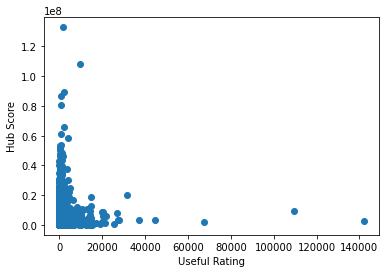

In [68]:
plt.scatter(denv_userrate['useful'], denv_userrate['Hub Score'])
plt.xlabel('Useful Rating')
plt.ylabel('Hub Score')

Text(0, 0.5, 'Hub Score')

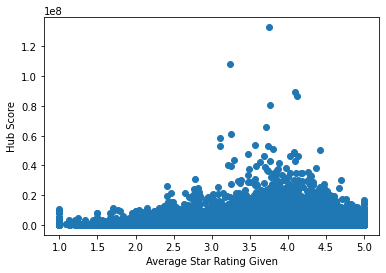

In [69]:
plt.scatter(denv_userrate['average_stars'], denv_userrate['Hub Score'])
plt.xlabel('Average Star Rating Given')
plt.ylabel('Hub Score')

## Authority Distribution

Text(0, 0.5, 'Authority Score')

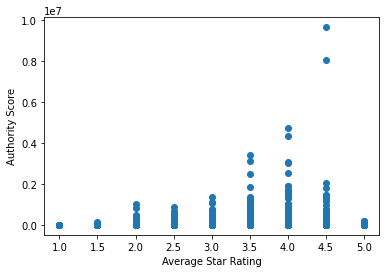

In [65]:
plt.scatter(denv_bizrate['stars'], denv_bizrate['Auth Score'])
plt.xlabel('Average Star Rating')
plt.ylabel('Authority Score')

## Filter by City Function

In [ ]:
denver_bis = df.loc[df['state'] == 'CO']